**<h1>Data Mining & Visualization Workshop Project</h1>**

In [3]:
#Uncomment to install these libraries (if required)
#!pip install pandas numpy matplotlib seaborn plotly scikit-learn imbalanced-learn xgboost networkx openpyxl

In [4]:
# ----------------------------------------
# Data Handling and Manipulation
# ----------------------------------------
import pandas as pd
import numpy as np
import os
import datetime

# ----------------------------------------
# Data Visualization Libraries
# ----------------------------------------
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ----------------------------------------
# Machine Learning and Statistical Modeling
# ----------------------------------------
# Data Preprocessing and Feature Engineering
from sklearn.preprocessing import RobustScaler, label_binarize

# Modeling and Evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE

# Models and Algorithms
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# ----------------------------------------
# Graphs and Network Analysis
# ----------------------------------------
import networkx as nx

# ----------------------------------------
# Miscellaneous
# ----------------------------------------
from collections import Counter
from itertools import combinations

# ----------------------------------------
# 3D Visualization
# ----------------------------------------
from mpl_toolkits.mplot3d import Axes3D


In [5]:
# ----------------------------------------
# Display settings
# ----------------------------------------
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:.2f}")

sns.set(style="whitegrid")

**<h1>CRISP-DM Phase 2: Data Understanding</h1>**

**<h3><u>Part 1:</u> Data Loading and Cleaning</h3>**

In [8]:
# ----------------------------------------
# Loading the Dataset into a DataFrame and utilizing the "CustomerID" column as the index col
# ----------------------------------------

df = pd.read_csv("Online_Retail.csv", encoding="latin1")

#Visualizing the first 5 rows of the dataset
print("First five rows of the dataset:\n")
display(df.head())


First five rows of the dataset:



InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55    17850.00  United Kingdom  
1  12/1/10 8:26       3.39    17850.00  United Kingdom  
2  12/1/10 8:26       2.75    17850.00  United Kingdom  
3  12/1/10 8:26       3.39    17850.00  United Kingdom  
4  12/1/10 8:26       3.39    17850.00  United Kingdom

In [9]:
# ----------------------------------------
# Determining the shape of the dataset
# ----------------------------------------
print("Shape of the dataset:", df.shape)

Shape of the dataset: (541909, 8)


In [10]:
# ----------------------------------------
# Examining the info of the different features present
# ----------------------------------------
print("Info Summary:\n")
print(df.info())

Info Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [11]:
# ----------------------------------------
# Determining description of the numerical features
# ----------------------------------------
print("Description of numerical variables:\n")
print(df.describe())

Description of numerical variables:

       Quantity  UnitPrice  CustomerID
count 541909.00  541909.00   406829.00
mean       9.55       4.61    15287.69
std      218.08      96.76     1713.60
min   -80995.00  -11062.06    12346.00
25%        1.00       1.25    13953.00
50%        3.00       2.08    15152.00
75%       10.00       4.13    16791.00
max    80995.00   38970.00    18287.00


In [12]:
# ----------------------------------------
# Data types for each column
# ----------------------------------------
print("Data Types: \n")
print(df.dtypes)

Data Types: 

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [13]:
# ----------------------------------------
# Determining the number of countries present in the dataset
# ----------------------------------------
print(f"Number of countries contained in the dataset: {df['Country'].nunique()} countries")

Number of countries contained in the dataset: 38 countries


In [14]:
# ----------------------------------------
# Removing Invalid / Non-Product Stock Codes
# ----------------------------------------
print("Shape before removing non-product codes:", df.shape)
# List taken from typical Online Retail dataset anomalies
invalid_codes = ["POST", "D", "BANK CHARGES", "M", "CRUK"]

df = df[~df["StockCode"].isin(invalid_codes)]
print("Shape after removing non-product codes:", df.shape)


Shape before removing non-product codes: (541909, 8)
Shape after removing non-product codes: (539952, 8)


In [15]:
# ----------------------------------------
# Checking if there are duplicated records in the dataset
# ----------------------------------------
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated records (before cleaning): {num_duplicates}")

#Deleting duplicated records
df = df.drop_duplicates(keep="first")

#Confirming that duplicated records have been removed
assert df.duplicated().sum() == 0
print(f"Number of duplicated records (after cleaning): {df.duplicated().sum()}")

Number of duplicated records (before cleaning): 5263
Number of duplicated records (after cleaning): 0


In [16]:
# ----------------------------------------
# Determining the number of missing records per feature
# ----------------------------------------
print("Number of missing values per feature:\n")
print(df.isna().sum())

Number of missing values per feature:

InvoiceNo           0
StockCode           0
Description      1450
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134846
Country             0
dtype: int64


In [17]:
# ----------------------------------------
# Data Cleaning Observations
# ----------------------------------------

# Check for cancelled invoices (InvoiceNo starts with 'C')
cancelled_count = df["InvoiceNo"].astype(str).str.startswith("C").sum()
print("Number of cancelled transactions:", cancelled_count)

# Negative quantities (indicate returns)
negative_qty_count = (df["Quantity"] < 0).sum()
print("Negative quantity count (returns):", negative_qty_count)

# UnitPrice anomalies: <= 0
invalid_price_count = (df["UnitPrice"] <= 0).sum()
print("Invalid price count (<=0):", invalid_price_count)

# Missing CustomerID
missing_customer_id = df["CustomerID"].isnull().sum()
print("Missing CustomerID count:", missing_customer_id)

Number of cancelled transactions: 8763
Negative quantity count (returns): 10099
Invalid price count (<=0): 2502
Missing CustomerID count: 134846


In [18]:
# ----------------------------------------
# Defining a custom function that returns the percentage of missing value for each feature
# ----------------------------------------
len_data = df.shape[0]
def num_nan(data):
    num_missing = data.isna().sum()
    if num_missing == 0:
        return "0 %"
        
    perc_missing = (num_missing/len_data) * 100
    return f"{perc_missing:.4f} %"

In [19]:
# ----------------------------------------
# Determining the percentage of missing data per feature
# ----------------------------------------
print("Percentage of missing data per feature:\n")
for feature in df.columns:
    perc_missing = num_nan(df[feature])
    print(f"{feature}:\t {perc_missing}")

Percentage of missing data per feature:

InvoiceNo:	 0 %
StockCode:	 0 %
Description:	 0.2712 %
Quantity:	 0 %
InvoiceDate:	 0 %
UnitPrice:	 0 %
CustomerID:	 25.2195 %
Country:	 0 %


In [20]:
#From the result above, the CustomerID has about 25% missing value
#By intuition, the best bet is to delete such records as there is no standard way to fill it.

#Deleting the records with empty/null CustomerID
df = df.dropna(axis=0, how="any", subset="CustomerID")

#Confirming that the affected rows have been deleted
assert df["CustomerID"].isna().sum() == 0

In [21]:
# Checking if there are still missing values in the "Description" column
df["Description"].isna().sum()

np.int64(0)

In [22]:
# Confirming that there are no more missing records in the data

print("Total number of missing values by features:")
print(df.isna().sum())

assert df.isna().sum().sum() == 0

Total number of missing values by features:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


**<h4>Summary of Data Understanding Key Findings</h4>**

In [24]:
# ----------------------------------------
# Summary of Data Understanding Key Findings (Print Statements)
# ----------------------------------------

print("========== DATA UNDERSTANDING SUMMARY ==========\n")

print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

print("\nMissing CustomerID:", missing_customer_id)
print("Cancelled invoices:", cancelled_count)
print("Negative quantities (returns):", negative_qty_count)
print("Invalid prices:", invalid_price_count)

print("\nDataset is now ready for Exploratory Analysis.\n")
print("===================================================")


========== DATA UNDERSTANDING SUMMARY ==========

Total rows: 399843
Total columns: 8

Missing CustomerID: 134846
Cancelled invoices: 8763
Negative quantities (returns): 10099
Invalid prices: 2502

Dataset is now ready for Exploratory Analysis.



In [25]:
# ----------------------------------------
# CustomerID should be a string and not a float
# ----------------------------------------

if not pd.api.types.is_string_dtype(df['CustomerID']):
    df['CustomerID'] = df['CustomerID'].astype('int64').astype('string')

#Confirming the operation
print(df["CustomerID"].dtype)

string


**Date Field Conversion**

In [27]:
# ----------------------------------------
# Converting Invoice Date to datetime
# ----------------------------------------
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%y %H:%M", errors="raise")

In [28]:
# ----------------------------------------
# Extracting date, year, month, day, hour, minutes
# ----------------------------------------

df["Date"] = df["InvoiceDate"].dt.date
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Hour"] = df["InvoiceDate"].dt.hour
df["Minutes"] = df["InvoiceDate"].dt.minute
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


#Visualizing the first five rows
display(df.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country        Date  Year  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  2010-12-01  2010   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  2010-12-01  2010   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   

   Month  Day  Hour  Minutes YearMonth  
0     12    1     8       26   2010-12  
1     12    1     8       26   2010-12  
2     12    1     8       26   2010-12  
3     12    1     8       26   2010-12  
4     12    1     8       26   2010-12

**<h3><u>Part 2:</u> Separating the DataFrame into two:</h3>**
> - **Completed transactions**
> - **Cancelled transactions**

In [30]:
#Checking for cancelled invoices (after removing null 'CustomerID' records)
cancelled_count_updated = df["InvoiceNo"].astype(str).str.startswith("C").sum()
print("Number of cancelled transactions (after cleaning):", cancelled_count_updated)


Number of cancelled transactions (after cleaning): 8507


In [31]:
df_cancelled = df[df["InvoiceNo"].astype(str).str.startswith("C")]

#Confirming the operation
assert df_cancelled.shape[0] == cancelled_count_updated

#Visualizing the first few rows of the cancelled transactions
display(df_cancelled.head())

InvoiceNo StockCode                        Description  Quantity  \
154   C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   

            InvoiceDate  UnitPrice CustomerID         Country        Date  \
154 2010-12-01 09:49:00       4.65      15311  United Kingdom  2010-12-01   
235 2010-12-01 10:24:00       1.65      17548  United Kingdom  2010-12-01   
236 2010-12-01 10:24:00       0.29      17548  United Kingdom  2010-12-01   
237 2010-12-01 10:24:00       0.29      17548  United Kingdom  2010-12-01   
238 2010-12-01 10:24:00       0.29      17548  United Kingdom  2010-12-01   

     Year  Month  Day  Hour  Minutes YearMonth  
154  2010     12    1     9       49   2010-12  
235  2010     12    1    10       24   2010-12  
236  2010     12    1    10       24   2010-12  
237  2010     12    1    10       24   2010-12  
238  2010     12    1    10       24   2010-12

In [32]:
df_completed = df.drop(index=df_cancelled.index).copy()

#Confirming the operation
assert df_completed.shape[0] == df.shape[0] - df_cancelled.shape[0]

#Visualizing the first few rows of the completed transactions
display(df_completed.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country        Date  Year  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  2010-12-01  2010   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  2010-12-01  2010   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   

   Month  Day  Hour  Minutes YearMonth  
0     12    1     8       26   2010-12  
1     12    1     8       26   2010-12  
2     12    1     8       26   2010-12  
3     12    1     8       26   2010-12  
4     12    1     8       26   2010-12

In [33]:
print("Number of completed transactions:", df_completed.shape[0])

#Ensuring that no data was lost in the separation process
assert df.shape[0] == df_completed.shape[0] + df_cancelled.shape[0]

Number of completed transactions: 391336


**<h3><u>Part 3:</u> Exploratory Analysis with Visualizations (Completed Transactions) </h3>**

In [35]:
df_completed.describe()

Quantity                    InvoiceDate  UnitPrice      Year     Month  \
count 391336.00                         391336  391336.00 391336.00 391336.00   
mean      13.17  2011-07-10 19:43:45.276437760       2.92   2010.93      7.60   
min        1.00            2010-12-01 08:26:00       0.00   2010.00      1.00   
25%        2.00            2011-04-07 11:16:00       1.25   2011.00      5.00   
50%        6.00            2011-07-31 12:08:00       1.95   2011.00      8.00   
75%       12.00            2011-10-20 12:57:00       3.75   2011.00     11.00   
max    80995.00            2011-12-09 12:50:00    1599.26   2011.00     12.00   
std      181.87                            NaN       7.27      0.25      3.41   

            Day      Hour   Minutes  
count 391336.00 391336.00 391336.00  
mean      15.04     12.72     30.40  
min        1.00      6.00      0.00  
25%        7.00     11.00     16.00  
50%       15.00     13.00     31.00  
75%       22.00     14.00     45.00  
max       31.00     20.00     59.00  
std        8.65      2.28     17.08

**<h4>Country Distribution</h4>**

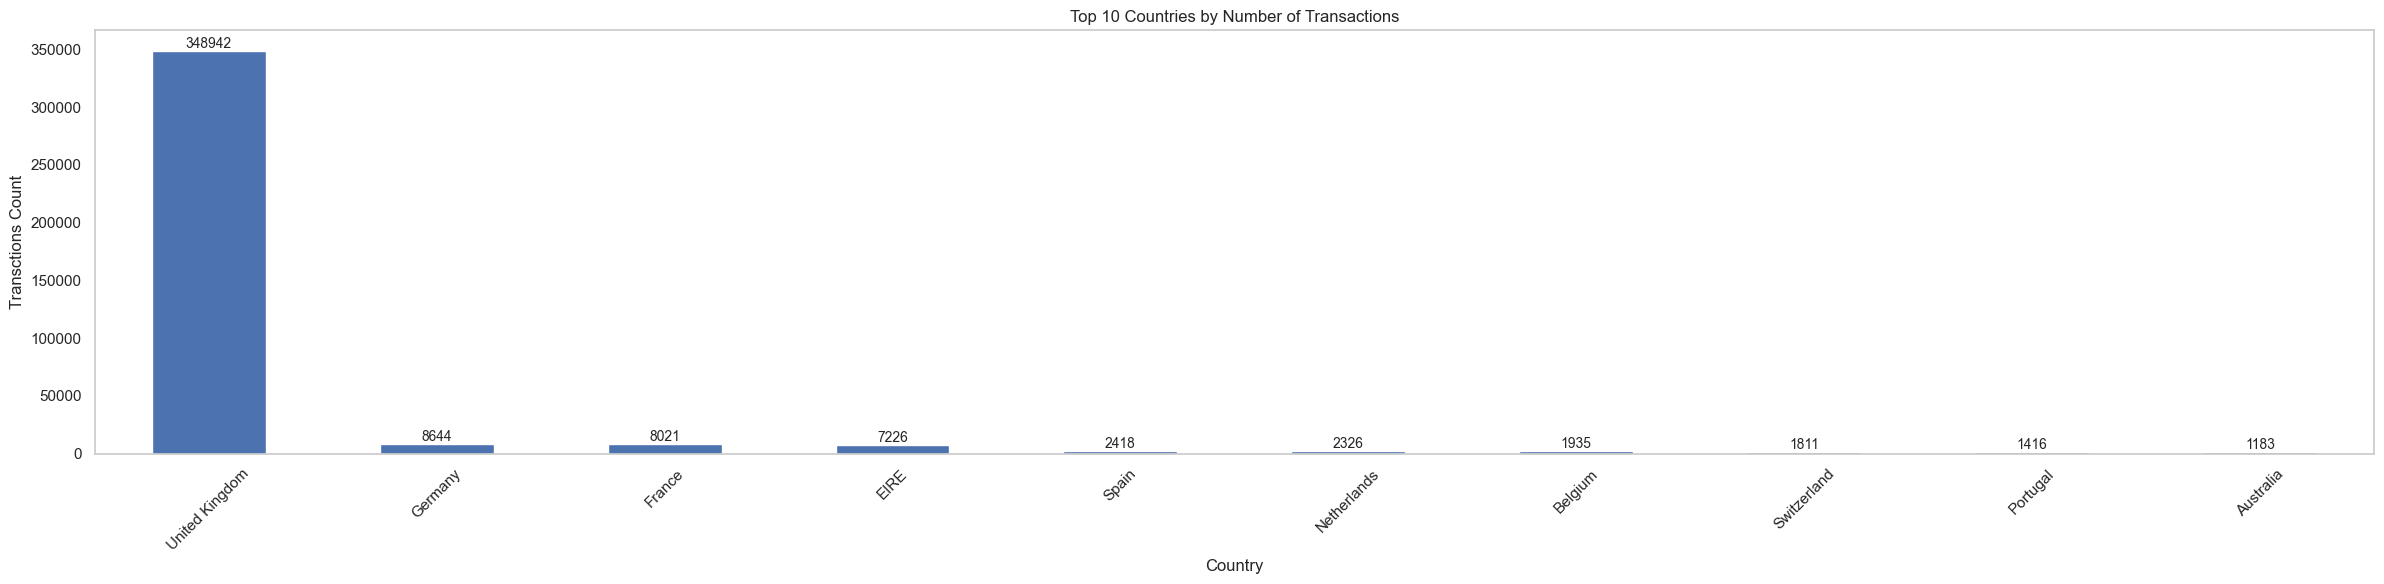

In [37]:
country_counts = df_completed["Country"].value_counts()

plt.figure(figsize=(24, 6))
ax = country_counts.head(10).plot(kind="bar")

plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Country")
plt.ylabel("Transctions Count")
plt.xticks(rotation=45)

#Remove gridlines
ax.grid(False)

#Adding labels on top of bars
for i, value in enumerate(country_counts.head(10)):
    ax.text(i, value, str(value), ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

**<h4>Quantity Distribution</h4>**

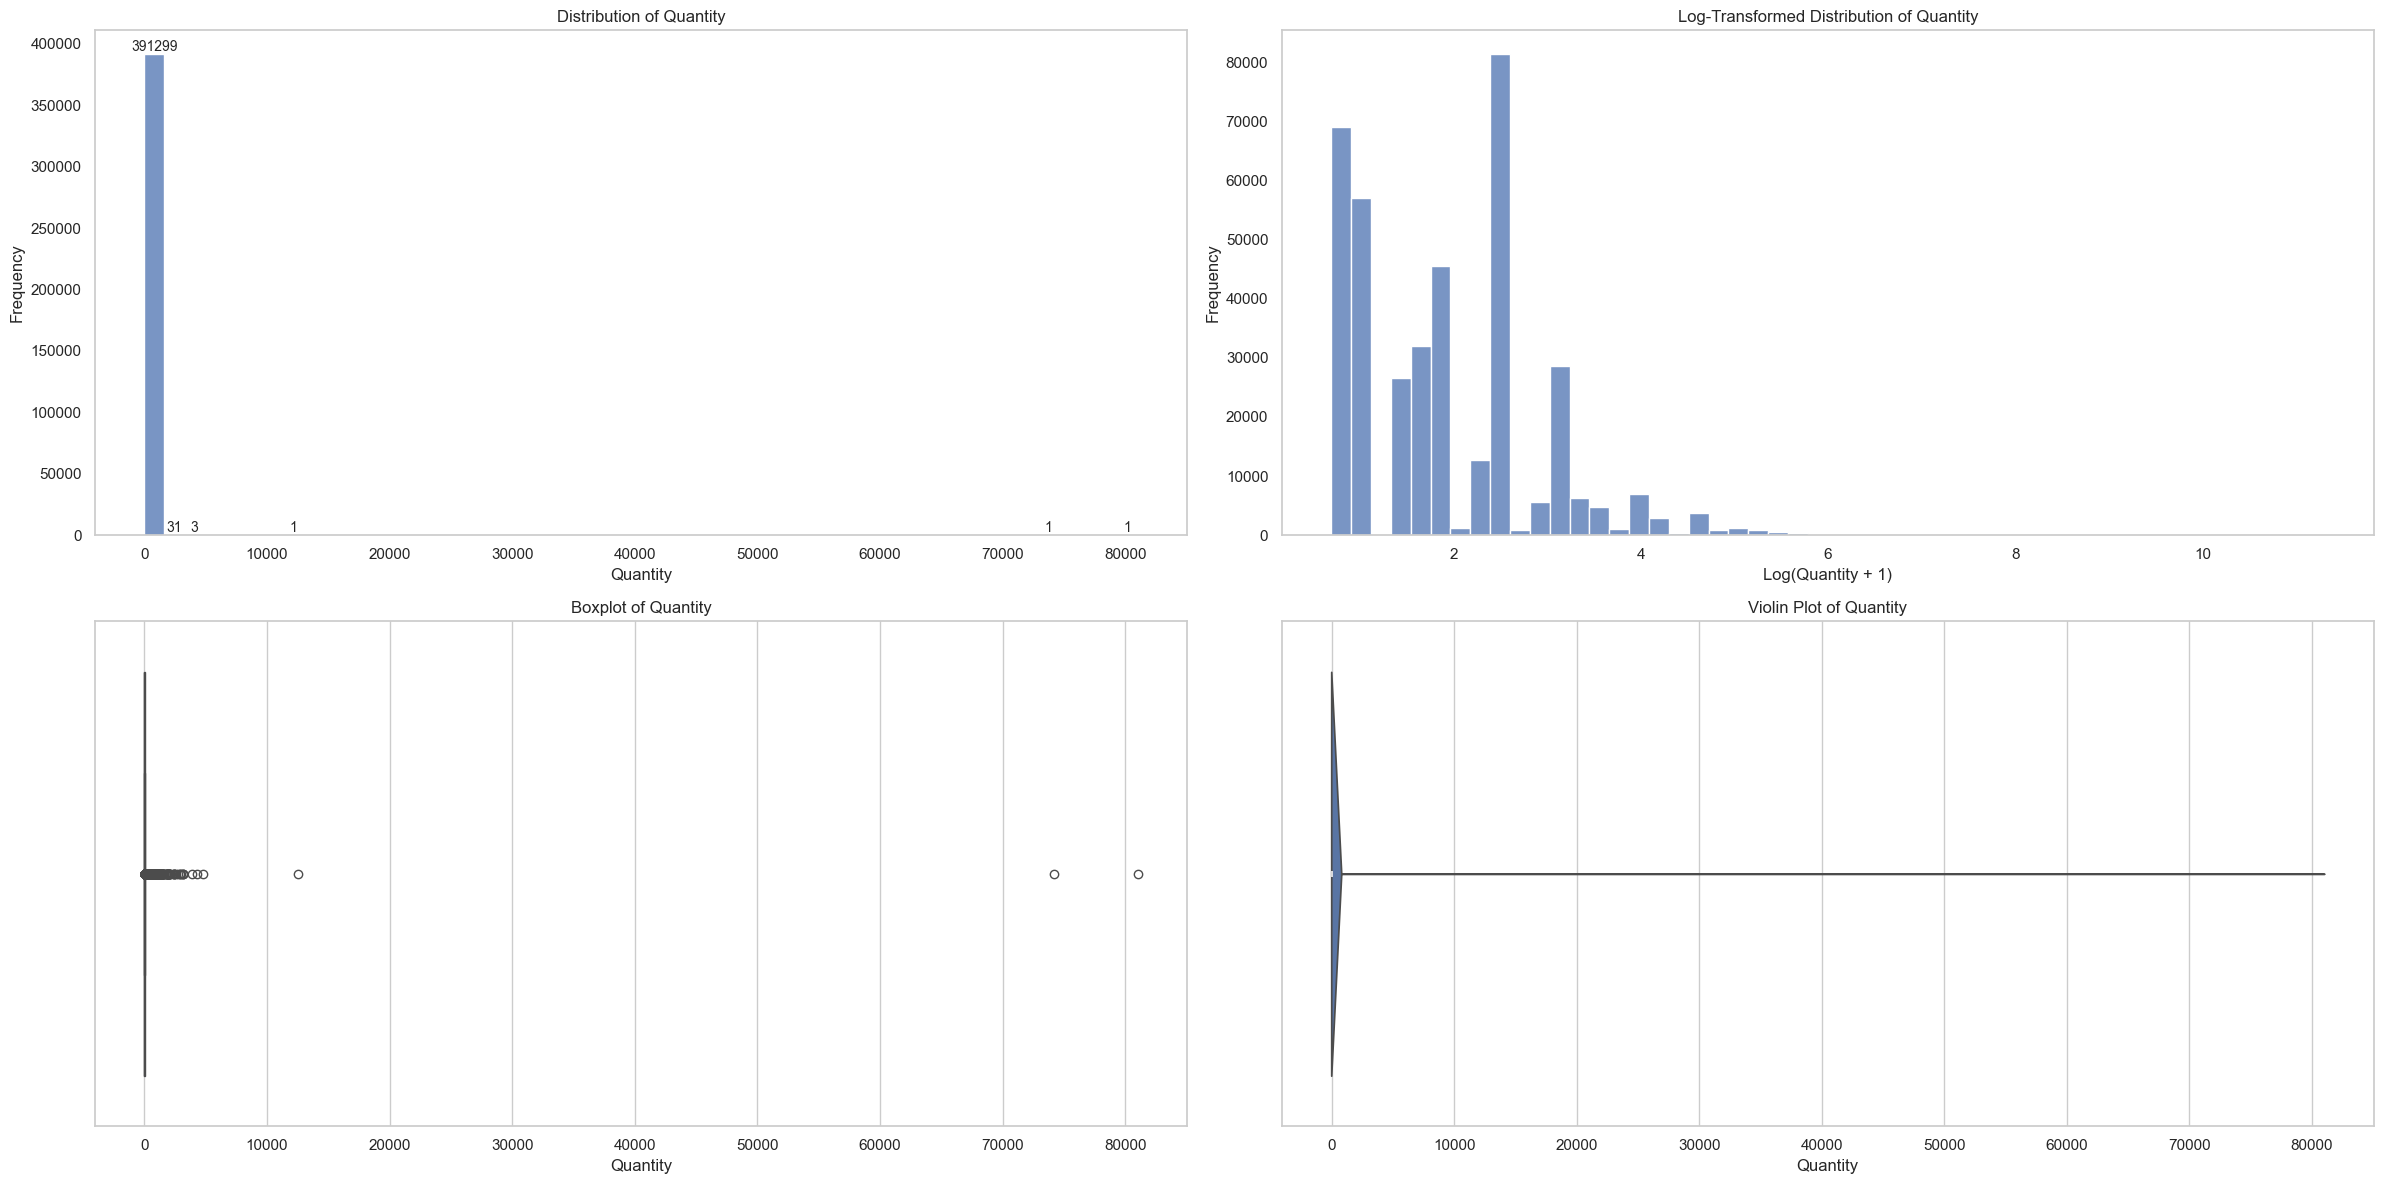

In [39]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))

# 1st subplot - Histogram
sns.histplot(df_completed["Quantity"], kde=False, bins=50, ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Quantity")
axs[0, 0].set_xlabel("Quantity")
axs[0, 0].set_ylabel("Frequency")

# Looping through the bars to place values on top
for patch in axs[0, 0].patches:
    height = patch.get_height()
    #Only add text if height of the bar is > 0
    if height > 0:
        axs[0, 0].text(
            patch.get_x() + patch.get_width() / 2,  # X position: center of the bar
            height + 1,  # Y position: just above the bar
            f'{int(height)}',  # The text: value of the bar
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment (above the bar)
            fontsize=10
        )
# Remove grid for first subplot
axs[0, 0].grid(False)

# 2nd subplot - Histogram with Log Transformation
log_quantity = np.log1p(df_completed["Quantity"])
sns.histplot(log_quantity, kde=False, bins=50, ax=axs[0, 1])
axs[0, 1].set_title("Log-Transformed Distribution of Quantity")
axs[0, 1].set_xlabel("Log(Quantity + 1)")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].grid(False)

# 3rd subplot - BoxPlot
sns.boxplot(x=df_completed["Quantity"], ax=axs[1, 0])
axs[1, 0].set_title("Boxplot of Quantity")
axs[1, 0].set_xlabel("Quantity")

# 4th subplot - Violin Plot
sns.violinplot(x=df_completed["Quantity"], ax=axs[1, 1])
axs[1, 1].set_title("Violin Plot of Quantity")
axs[1, 1].set_xlabel("Quantity")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

**<h4>UnitPrice Distribution</h4>**

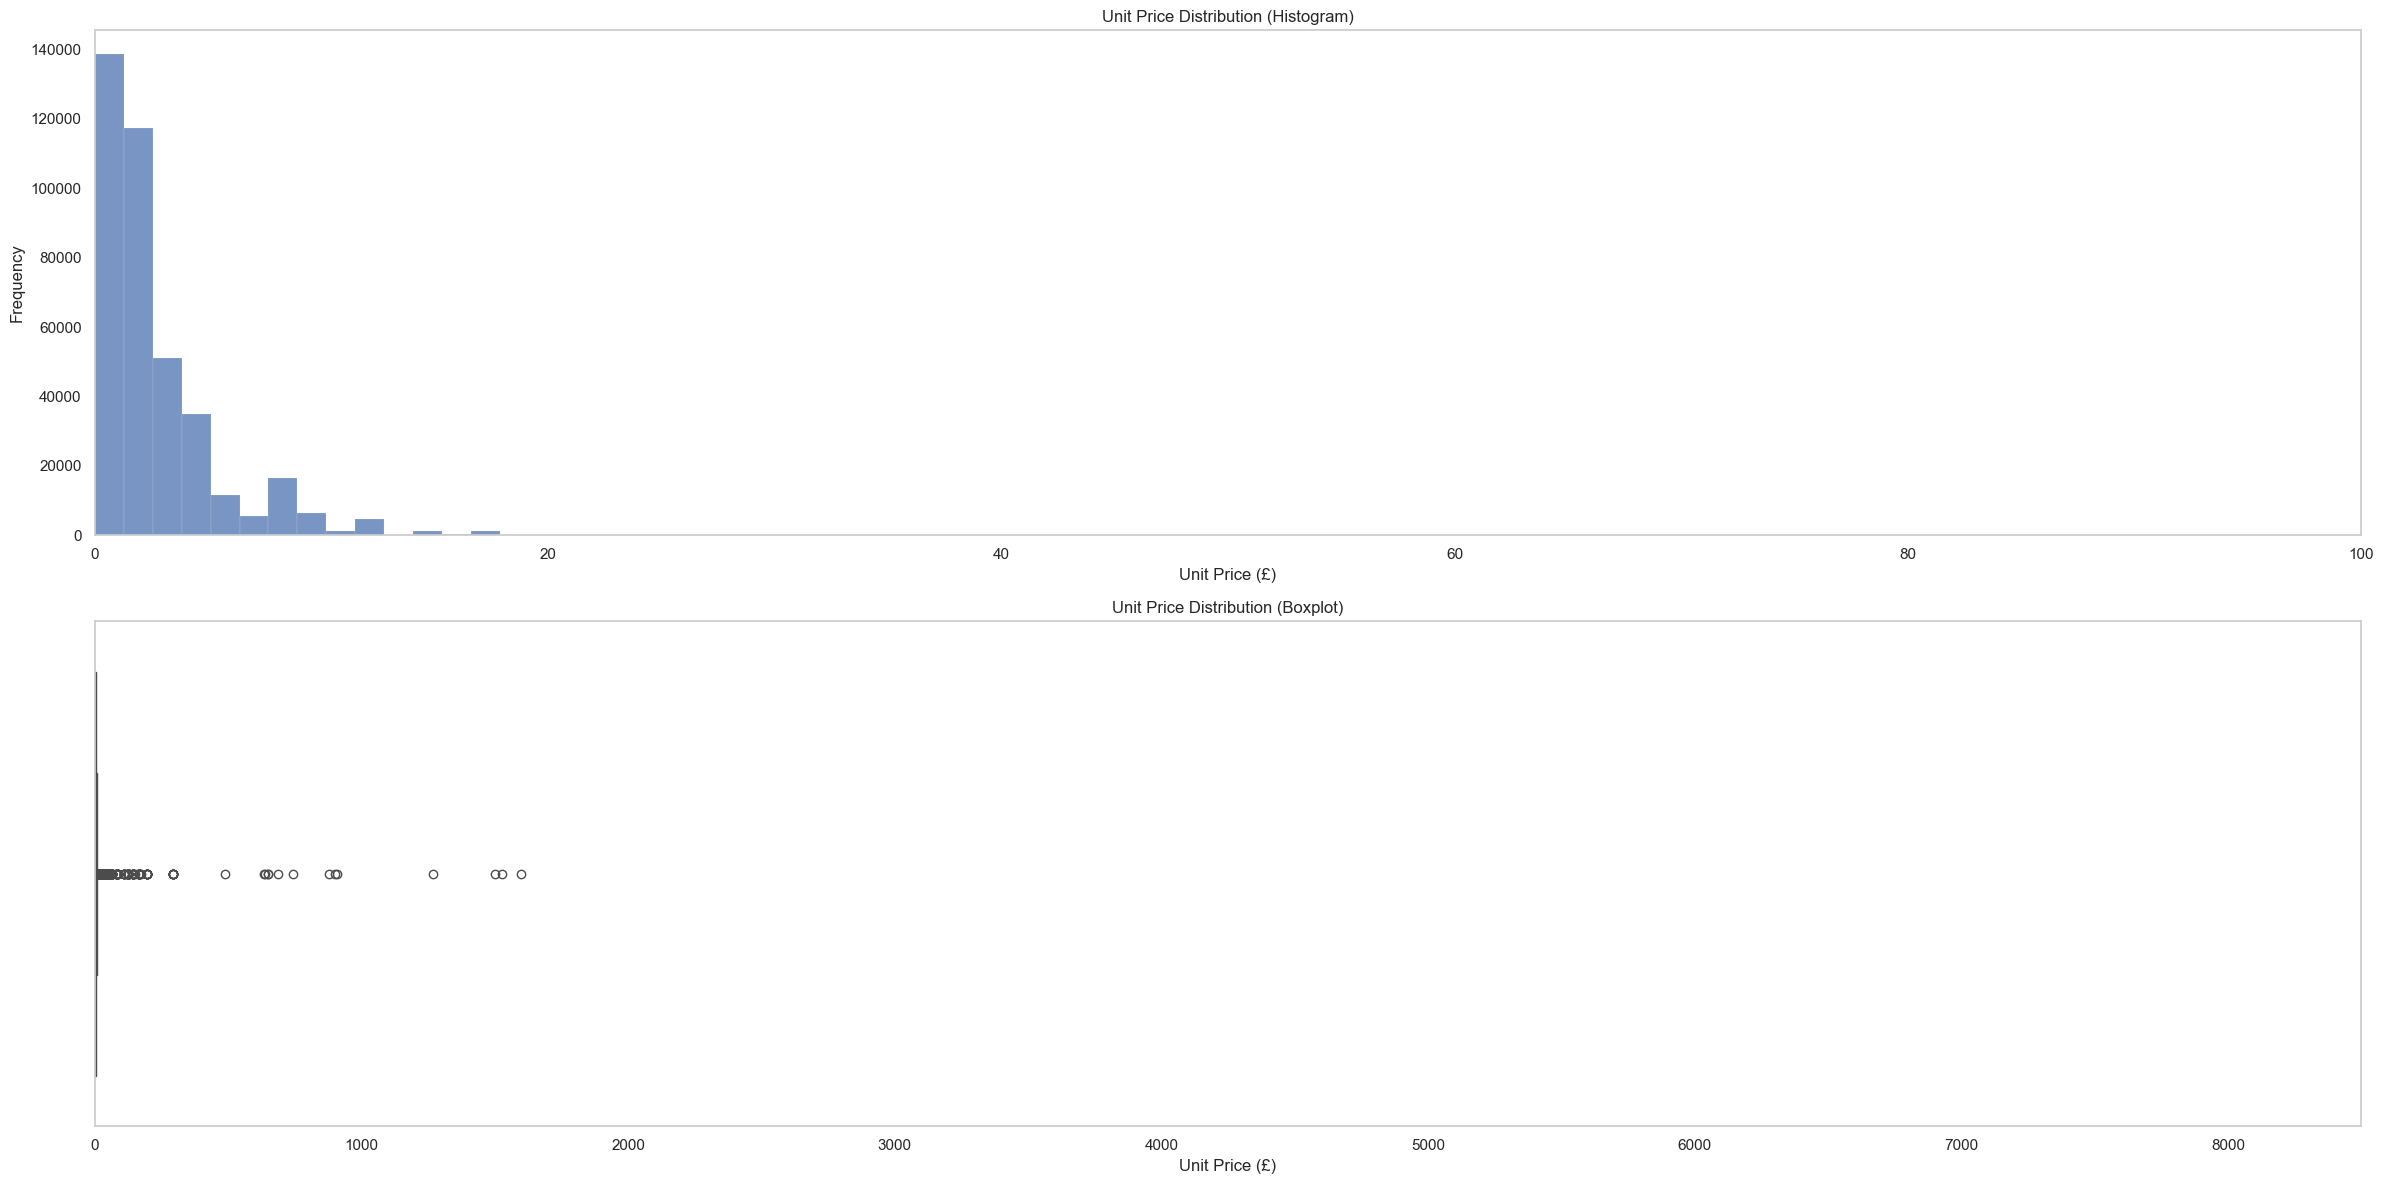

In [41]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 1, 1)
sns.histplot(df_completed["UnitPrice"], kde=False)
plt.title("Unit Price Distribution (Histogram)")
plt.xlabel("Unit Price (£)")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # Limited to reduce skew caused by extremely high prices
plt.grid(False)

plt.subplot(2, 1, 2)
sns.boxplot(x=df_completed["UnitPrice"])
plt.title("Unit Price Distribution (Boxplot)")
plt.xlabel("Unit Price (£)")
plt.xlim(0, 8500)  
plt.grid(False)

# Showing the plots after both subplots are created
plt.tight_layout()  # Automatically adjust spacing to prevent overlap
plt.show()

**<h4>Completed Transactions by Months</h4>**

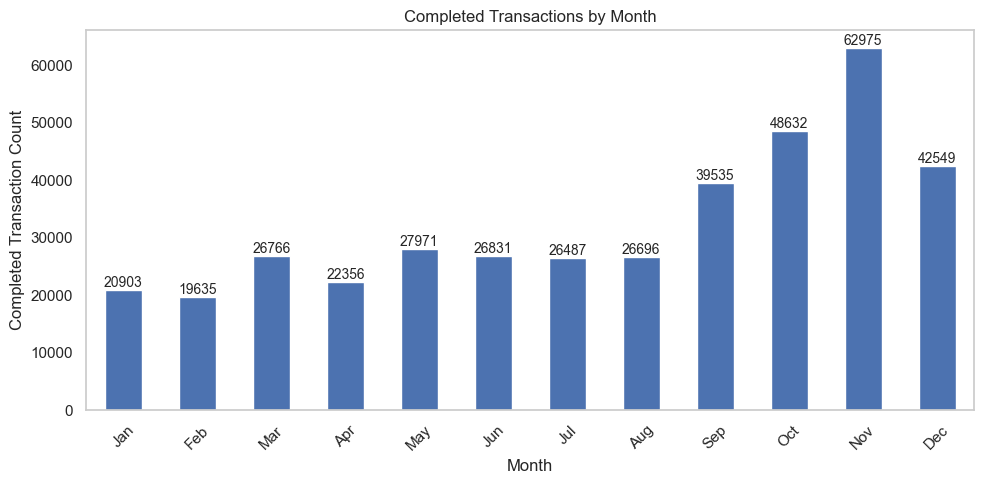

In [43]:
# Plotting transactions by month
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(10, 5))
ax = df_completed["Month"].value_counts().sort_index().plot(kind="bar")

# Customizing the x-ticks to show month names
ax.set_xticklabels(month_names, rotation=45)

plt.title("Completed Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Completed Transaction Count")

# Adding numbers on top of the bars
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        # Adding text on top of each bar
        ax.text(
            patch.get_x() + patch.get_width() / 2,  # X position: center of the bar
            height + 1,  # Y position: just above the bar
            f'{int(height)}',  # The text: value of the bar
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment (above the bar)
            fontsize=10
        )
ax.grid(False)
# Show the plot
plt.tight_layout()
plt.show()


**<h3><u>Part 4:</u> Exploratory Analysis with Visualizations (Cancelled Transactions) </h3>**

In [45]:
df_cancelled.describe()

Quantity                    InvoiceDate  UnitPrice    Year   Month  \
count   8507.00                           8507    8507.00 8507.00 8507.00   
mean     -31.47  2011-06-27 00:27:39.398142976       4.45 2010.92    7.31   
min   -80995.00            2010-12-01 09:49:00       0.03 2010.00    1.00   
25%       -6.00            2011-03-21 16:26:00       1.45 2011.00    4.00   
50%       -2.00            2011-07-11 13:07:00       2.55 2011.00    8.00   
75%       -1.00            2011-10-06 20:38:00       4.95 2011.00   10.00   
max       -1.00            2011-12-09 11:58:00     295.00 2011.00   12.00   
std     1196.98                            NaN       9.21    0.27    3.52   

          Day    Hour  Minutes  
count 8507.00 8507.00  8507.00  
mean    14.74   13.16    29.98  
min      1.00    6.00     0.00  
25%      7.00   11.00    15.00  
50%     14.00   13.00    29.00  
75%     22.00   15.00    45.00  
max     31.00   20.00    59.00  
std      8.65    2.73    17.41

**<h4>Country Distribution</h4>**

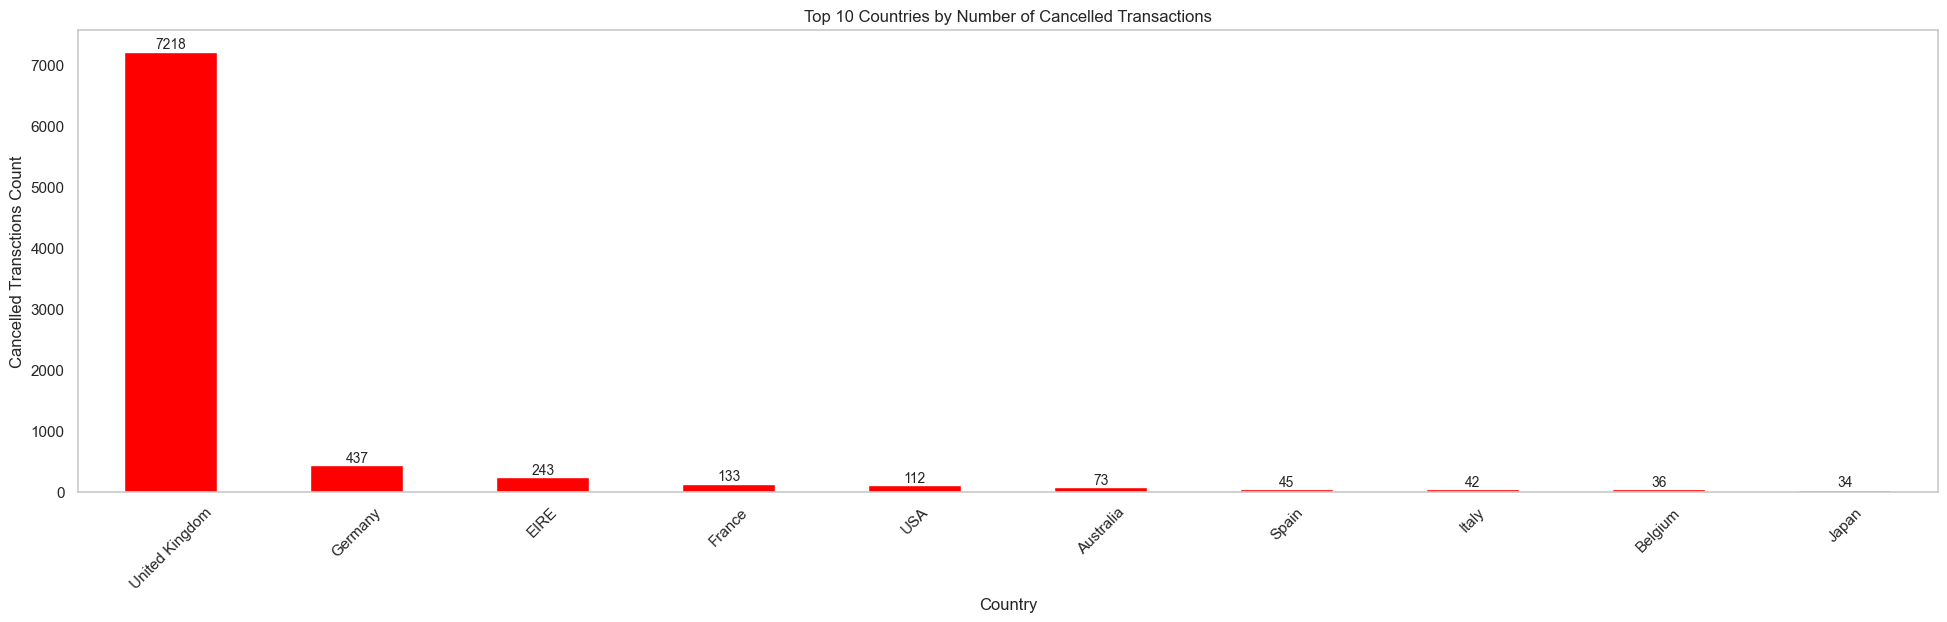

In [47]:
country_counts_cancelled = df_cancelled["Country"].value_counts()

plt.figure(figsize=(24, 6))
ax = country_counts_cancelled.head(10).plot(kind="bar", color="red")

plt.title("Top 10 Countries by Number of Cancelled Transactions")
plt.xlabel("Country")
plt.ylabel("Cancelled Transctions Count")
plt.xticks(rotation=45)

#Remove gridlines
ax.grid(False)

#Adding labels on top of bars
for i, value in enumerate(country_counts_cancelled.head(10)):
    ax.text(i, value, str(value), ha="center", va="bottom", fontsize=10)

#plt.tight_layout()
plt.show()

**<h4>Top 10 Countries by Percentage of Cancelled Transactions</h4>**

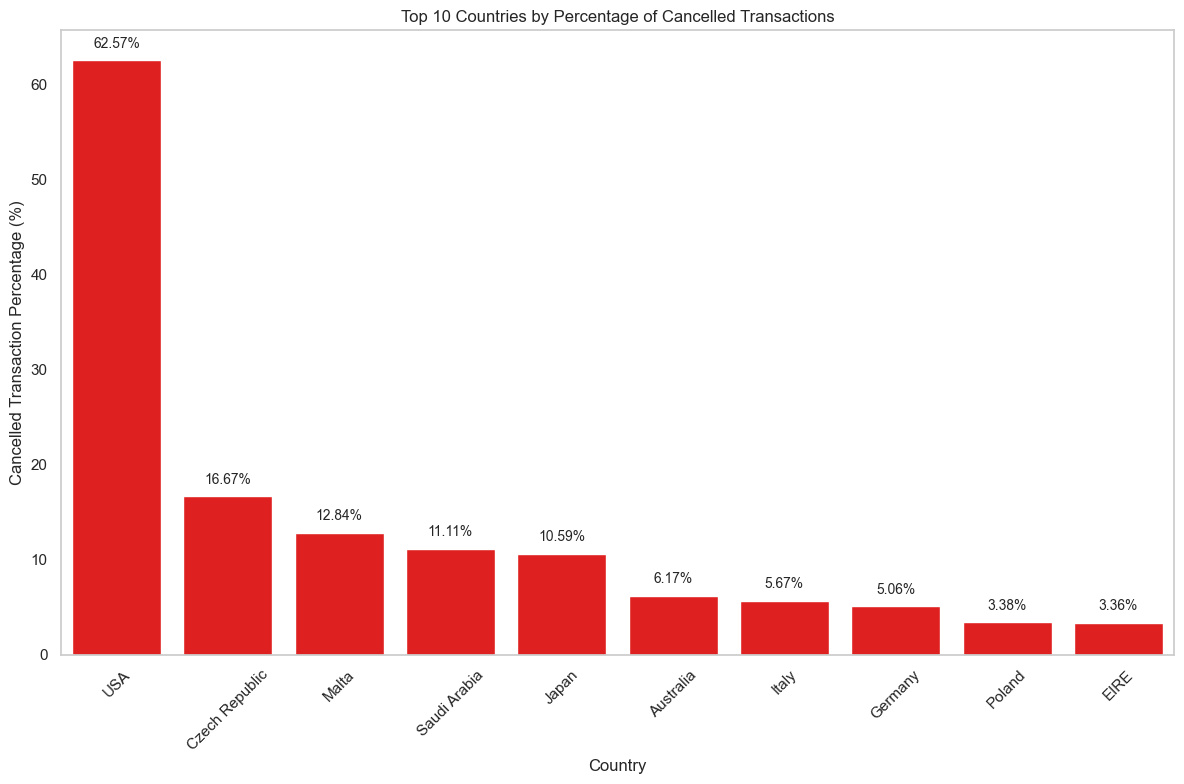

In [49]:
# Step 1: Count the number of transactions per country in each DataFrame
completed_counts = df_completed['Country'].value_counts()
cancelled_counts = df_cancelled['Country'].value_counts()

# Step 2: Merge the counts into a single DataFrame to calculate the percentage of cancellations
country_stats = pd.DataFrame({
    'Completed': completed_counts,
    'Cancelled': cancelled_counts
}).fillna(0)  # Fill NaN values with 0 for countries with no cancelled transactions

# Step 3: Calculate the percentage of cancelled transactions
country_stats['Cancelled_Percentage'] = (country_stats['Cancelled'] / country_stats['Completed']) * 100

# Step 4: Sort the countries by the percentage of cancelled transactions in descending order
country_stats = country_stats.sort_values('Cancelled_Percentage', ascending=False)

# Step 5: Select the top 10 countries
top_10_countries = country_stats.head(10)

# Step 6: Plot the results
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries['Cancelled_Percentage'], color='red')
plt.title("Top 10 Countries by Percentage of Cancelled Transactions")
plt.xlabel("Country")
plt.ylabel("Cancelled Transaction Percentage (%)")
plt.xticks(rotation=45)

#Adding labels on top of bars
for i, value in enumerate(top_10_countries['Cancelled_Percentage']):
    ax.text(i, value + 1, f'{value:.2f}%', ha="center", va="bottom", fontsize=10)  # Place text above the bars

plt.grid(False)
plt.tight_layout()
plt.show()


**<h4>Quantity Distribution</h4>**

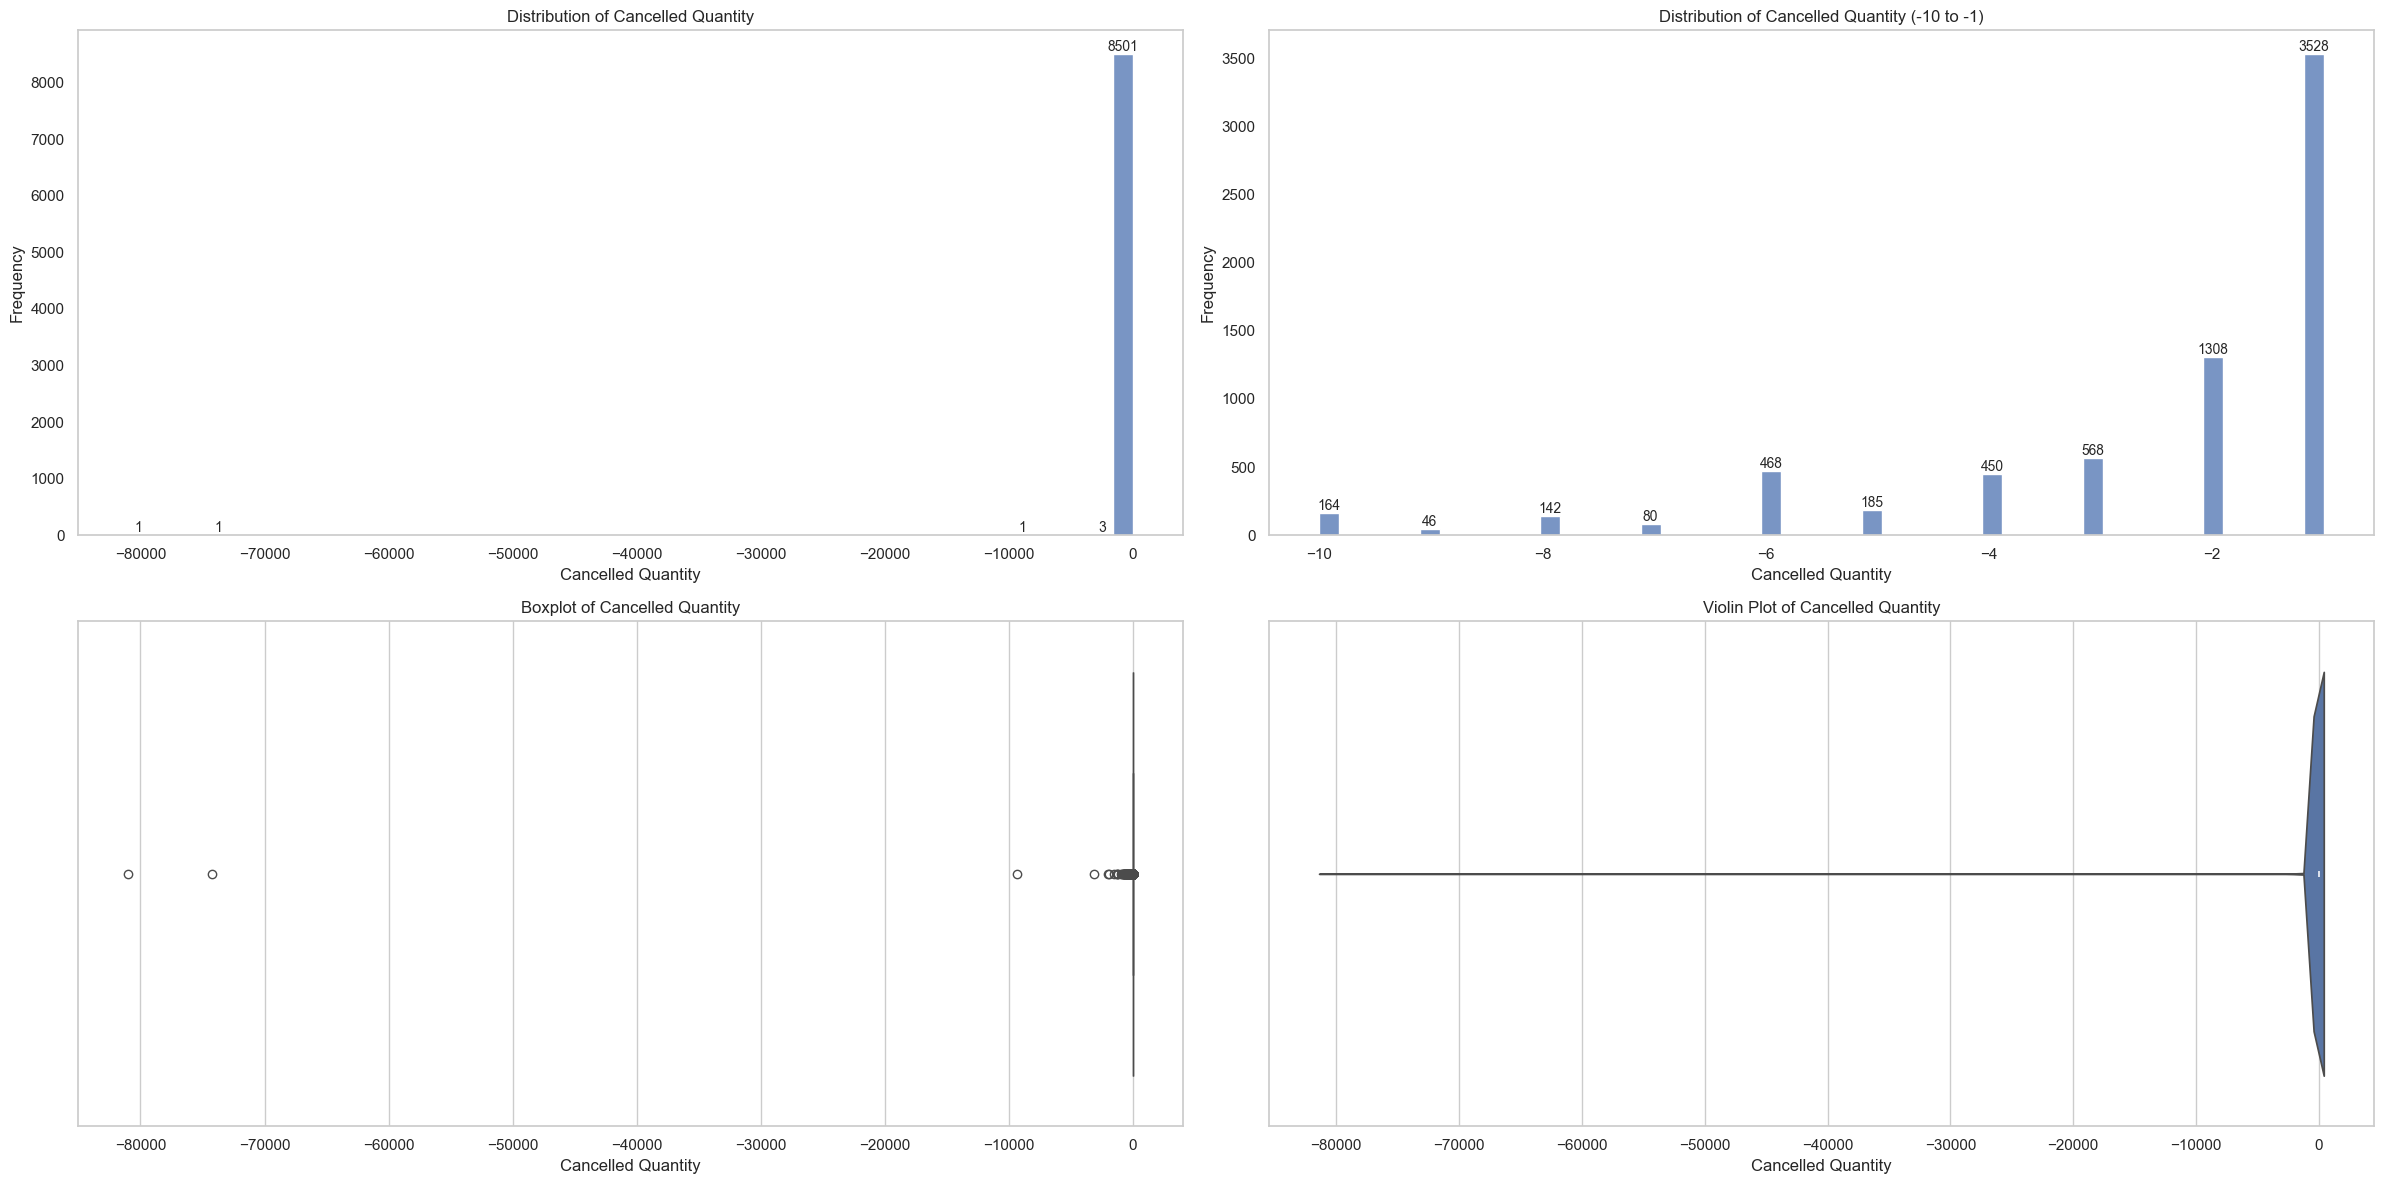

In [51]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))

# 1st subplot - Histogram
sns.histplot(df_cancelled["Quantity"], kde=False, bins=50, ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Cancelled Quantity")
axs[0, 0].set_xlabel("Cancelled Quantity")
axs[0, 0].set_ylabel("Frequency")

# Looping through the bars to place values on top
for patch in axs[0, 0].patches:
    height = patch.get_height()
    #Only add text if height of the bar is > 0
    if height > 0:
        axs[0, 0].text(
            patch.get_x() + patch.get_width() / 2,  # X position: center of the bar
            height + 1,  # Y position: just above the bar
            f'{int(height)}',  # The text: value of the bar
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment (above the bar)
            fontsize=10
        )
# Remove grid for first subplot
axs[0, 0].grid(False)

# 2nd subplot - Histogram (Quantity: -10 to -1)
sns.histplot(df_cancelled["Quantity"][df_cancelled["Quantity"]>=-10], kde=False, bins=50, ax=axs[0, 1])
axs[0, 1].set_title("Distribution of Cancelled Quantity (-10 to -1)")
axs[0, 1].set_xlabel("Cancelled Quantity")
axs[0, 1].set_ylabel("Frequency")

# Looping through the bars to place values on top
for patch in axs[0, 1].patches:
    height = patch.get_height()

    #Only add text if height of the bar is > 0
    if height > 0:
        axs[0, 1].text(
            patch.get_x() + patch.get_width() / 2,  # X position: center of the bar
            height + 1,  # Y position: just above the bar
            f'{int(height)}',  # The text: value of the bar
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment (above the bar)
            fontsize=10
        )
# Remove grid for first subplot
axs[0, 1].grid(False)


# 3rd subplot - BoxPlot
sns.boxplot(x=df_cancelled["Quantity"], ax=axs[1, 0])
axs[1, 0].set_title("Boxplot of Cancelled Quantity")
axs[1, 0].set_xlabel("Cancelled Quantity")

# 4th subplot - Violin Plot
sns.violinplot(x=df_cancelled["Quantity"], ax=axs[1, 1])
axs[1, 1].set_title("Violin Plot of Cancelled Quantity")
axs[1, 1].set_xlabel("Cancelled Quantity")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

**<h4>UnitPrice Distribution</h4>**

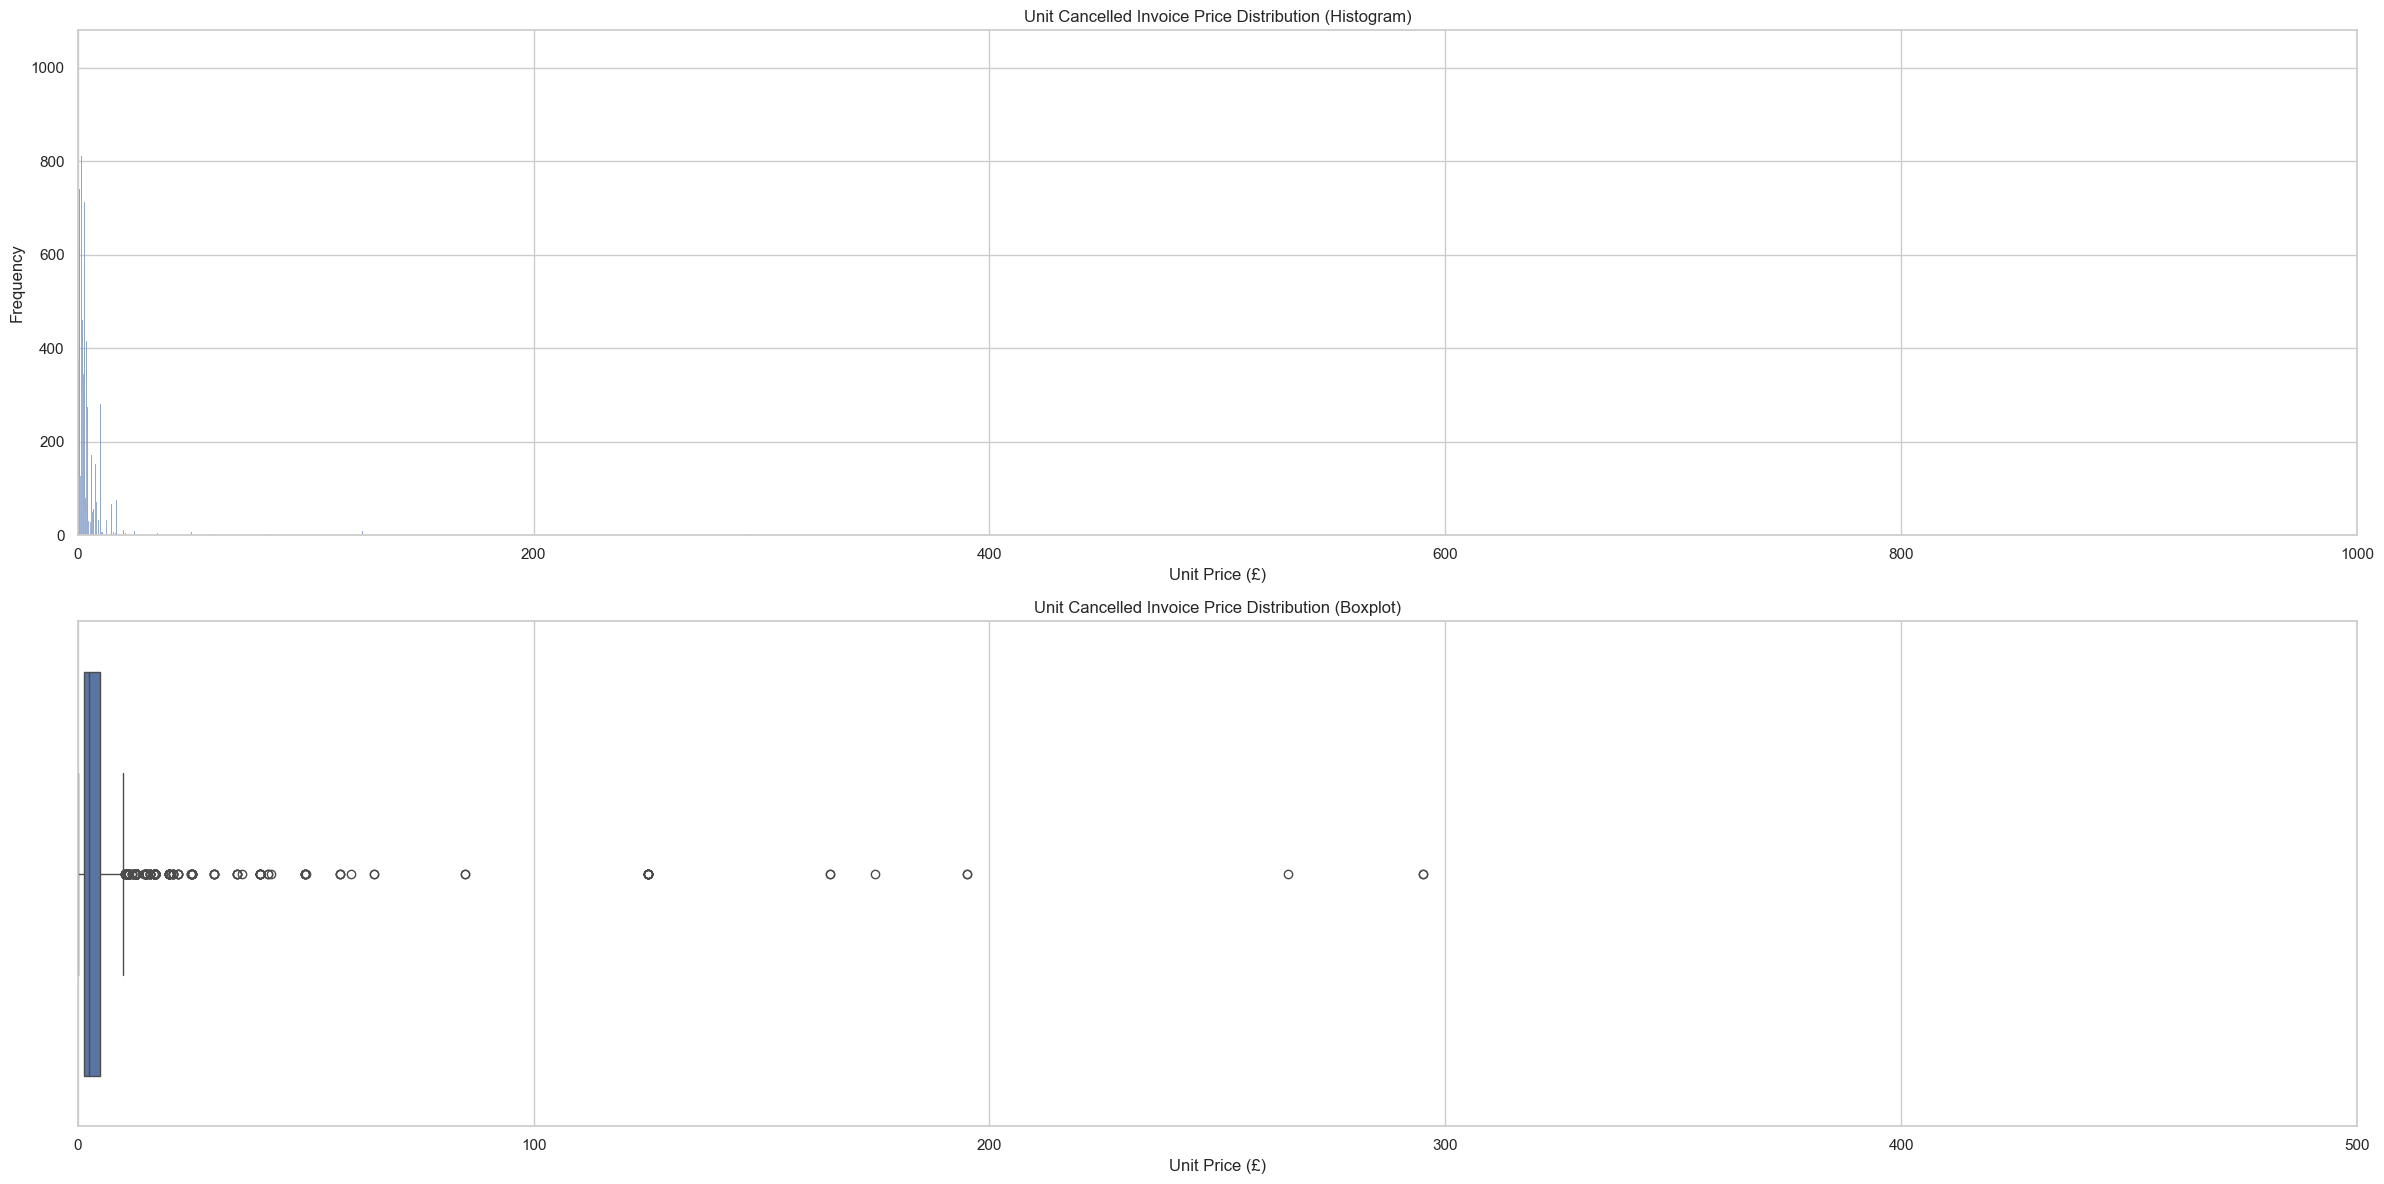

In [53]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 1, 1)
sns.histplot(df_cancelled["UnitPrice"], kde=False, bins=1000)
plt.title("Unit Cancelled Invoice Price Distribution (Histogram)")
plt.xlabel("Unit Price (£)")
plt.ylabel("Frequency")
plt.xlim(0, 1000)  # Limited to reduce skew caused by extremely high prices

plt.subplot(2, 1, 2)
sns.boxplot(x=df_cancelled["UnitPrice"])
plt.title("Unit Cancelled Invoice Price Distribution (Boxplot)")
plt.xlabel("Unit Price (£)")
plt.xlim(0, 500)    

# Showing the plots after both subplots are created
plt.tight_layout()  # Automatically adjust spacing to prevent overlap
plt.show()

**<h4>Cancelled Transactions by Month</h4>**

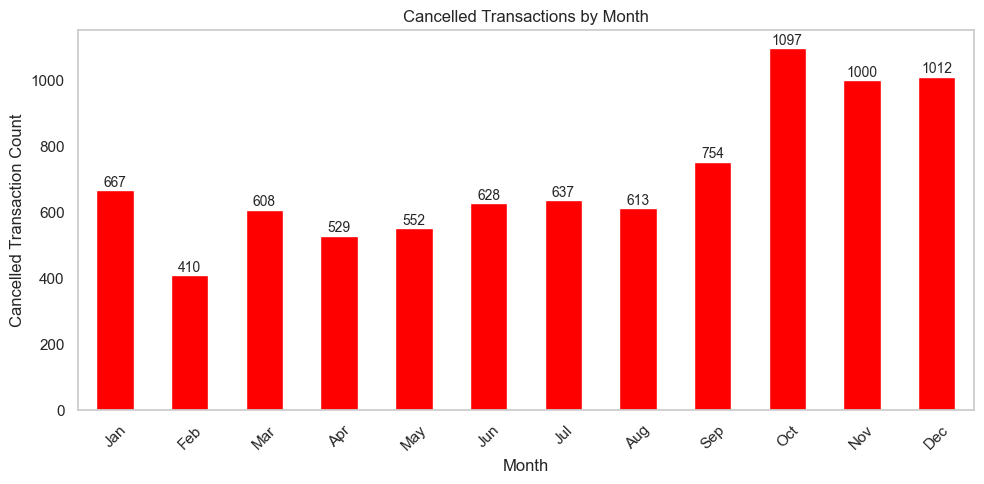

In [55]:
# Plotting cancelled transactions by month
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(10, 5))
ax = df_cancelled["Month"].value_counts().sort_index().plot(kind="bar", color="red")
plt.title("Cancelled Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Cancelled Transaction Count")

# Customizing the x-ticks to show month names
ax.set_xticklabels(month_names, rotation=45)

# Adding numbers on top of the bars
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        # Adding text on top of each bar
        ax.text(
            patch.get_x() + patch.get_width() / 2,  # X position: center of the bar
            height + 1,  # Y position: just above the bar
            f'{int(height)}',  # The text: value of the bar
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment (above the bar)
            fontsize=10
        )
ax.grid(False)
# Show the plot
plt.tight_layout()
plt.show()

**<h4>Percentage Cancellation Rate by Month</h4>**

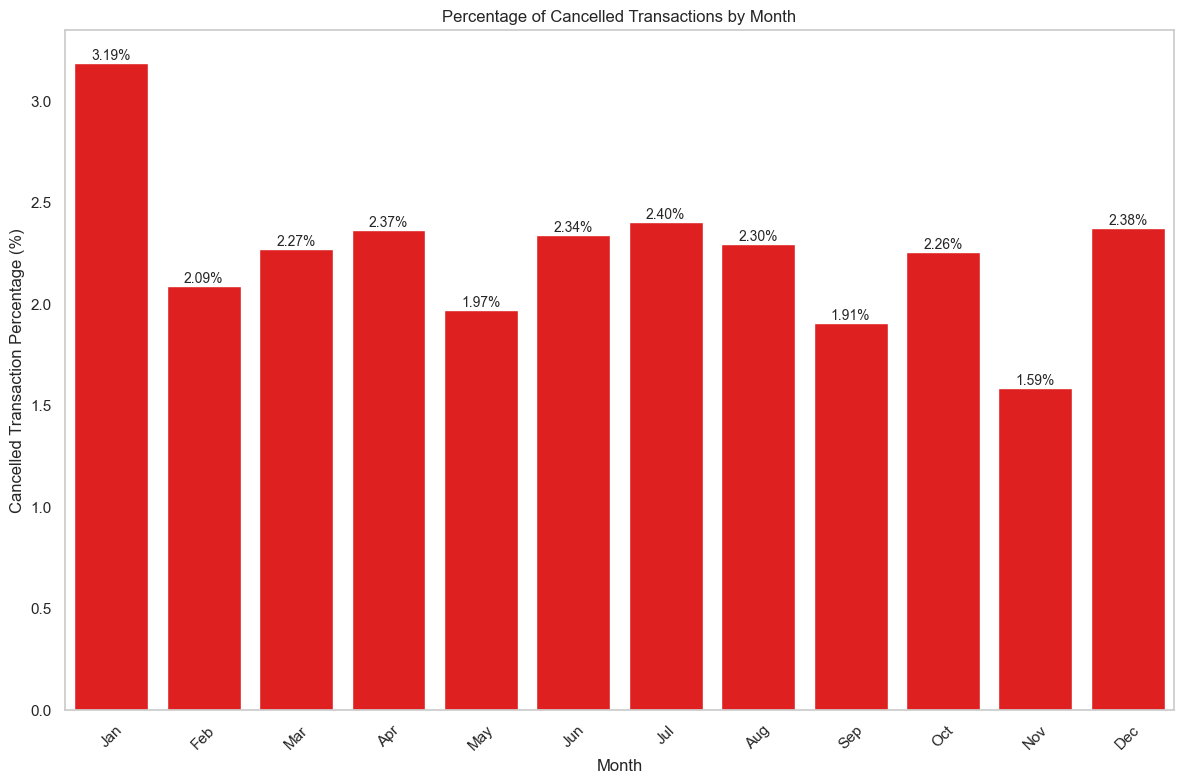

In [57]:
# Step 1: Count the number of transactions per country in each DataFrame
month_completed_counts = df_completed['Month'].value_counts()
month_cancelled_counts = df_cancelled['Month'].value_counts()

# Step 2: Merge the counts into a single DataFrame to calculate the percentage of cancellations
month_stats = pd.DataFrame({
    'Completed': month_completed_counts,
    'Cancelled': month_cancelled_counts
}).fillna(0)  # Fill NaN values with 0 for months (if any) with no cancelled transactions

# Step 3: Calculate the percentage of cancelled transactions
month_stats['Cancelled_Percentage'] = (month_stats['Cancelled'] / month_stats['Completed']) * 100

# Step 6: Plot the results
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=month_stats.index, y=month_stats['Cancelled_Percentage'], color='red')
plt.title("Percentage of Cancelled Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Cancelled Transaction Percentage (%)")

# Customizing the x-ticks to show month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax.set_xticks(range(12))  # Set tick position
ax.set_xticklabels(month_names, rotation=45)

#Adding labels on top of bars
for i, value in enumerate(month_stats['Cancelled_Percentage']):
    ax.text(i, value, f'{value:.2f}%', ha="center", va="bottom", fontsize=10)  # Place text above the bars

plt.grid(False)
plt.tight_layout()
plt.show()


In [58]:
# We can see that the month of November has the lowest percentage of cancelled transactions
# This can be attributed to the 'Black Friday' sales where customers are offered various levels of discount
# Owing to that, they won't be in a hurry to cancel their invoices

# Also, it is understandable why January, being the beginning of a new year has the highest cancellation rate.

**<h2>CRISP DM Phase 3: Data Preparation </h2>**

In [60]:
# Confirming Dataset Split

# ----------------------------------------
# Validate Split
# ----------------------------------------

# Confirm df_cancelled contains ONLY cancelled invoices
assert df_cancelled["InvoiceNo"].astype(str).str.startswith("C").all()

# Confirm df_completed contains NO cancelled invoices
assert ~(df_completed["InvoiceNo"].astype(str).str.startswith("C")).any()

print("Split validation successful.\n")

print("Completed transactions:", df_completed.shape)
print("Cancelled transactions:", df_cancelled.shape)

Split validation successful.

Completed transactions: (391336, 15)
Cancelled transactions: (8507, 15)


**<h4>Feature Engineering</h4>**

In [62]:
# ----------------------------------------
# Feature 1: Order Value (product of UnitPrice and Quantity)
# ----------------------------------------
df_completed["OrderValue"] = df_completed["Quantity"] * df_completed["UnitPrice"]

#Displaying first five rows for confirmation
display(df_completed.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country        Date  Year  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  2010-12-01  2010   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  2010-12-01  2010   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   

   Month  Day  Hour  Minutes YearMonth  OrderValue  
0     12    1     8       26   2010-12       15.30  
1     12    1     8       26   2010-12       20.34  
2     12    1     8       26   2010-12       22.00  
3     12    1     8       26   2010-12       20.34  
4     12    1     8       26   2010-12       20.34

In [63]:
# ----------------------------------------
# Feature 2: Order Size Category ({0-4: Small, 5-14: Medium, 14+:Large})
# ----------------------------------------
def categorize_order(q):
    if q < 5:
        return "Small"
    elif q < 15:
        return "Medium"
    else:
        return "Large"

df_completed["OrderSizeCategory"] = df["Quantity"].apply(categorize_order)

#Confirming implementation
print(df_completed["OrderSizeCategory"].value_counts(normalize=True))

OrderSizeCategory
Small    0.47
Medium   0.36
Large    0.17
Name: proportion, dtype: float64


In [64]:
# ----------------------------------------
# Feature 3: Customer Lifetime Value (CLV) --> sum of OrderValue of each unique CustomerID
# ----------------------------------------

customer_clv = df_completed.groupby("CustomerID")["OrderValue"].sum().reset_index()
customer_clv.rename(columns={"OrderValue": "CLV"}, inplace=True)

#Updating df_completed with the CLV feature
df_completed = df_completed.merge(customer_clv, how="left", on="CustomerID")

#Confirming the implementation by visualizing the first five rows
display(df_completed.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country        Date  Year  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  2010-12-01  2010   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  2010-12-01  2010   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   

   Month  Day  Hour  Minutes YearMonth  OrderValue OrderSizeCategory     CLV  
0     12    1     8       26   2010-12       15.30            Medium 5391.21  
1     12    1     8       26   2010-12       20.34            Medium 5391.21  
2     12    1     8       26   2010-12       22.00            Medium 5391.21  
3     12    1     8       26   2010-12       20.34            Medium 5391.21  
4     12    1     8       26   2010-12       20.34            Medium 5391.21

In [65]:
# ----------------------------------------
# Feature 4: Month Name
# ----------------------------------------
df_completed["MonthName"] = df_completed["InvoiceDate"].dt.strftime("%B")

#Confirming implementation
print(df_completed["MonthName"].value_counts(normalize=True))

MonthName
November    0.16
October     0.12
December    0.11
September   0.10
May         0.07
June        0.07
March       0.07
August      0.07
July        0.07
April       0.06
January     0.05
February    0.05
Name: proportion, dtype: float64


In [66]:
# ----------------------------------------
# Feature 5: Weekend Purchase
# ----------------------------------------
df_completed["IsWeekend"] = df_completed["InvoiceDate"].dt.weekday >= 5

# Confirming the implementation
print(df_completed["IsWeekend"].value_counts(normalize=True))

IsWeekend
False   0.84
True    0.16
Name: proportion, dtype: float64


In [67]:
# ----------------------------------------
# Feature 6: Region Grouping
# ----------------------------------------

# First, let's see the respective counts of the countries that make up the dataset
#Displaying the Country categories
df_completed["Country"].value_counts(normalize=False)

Country
United Kingdom          348942
Germany                   8644
France                    8021
EIRE                      7226
Spain                     2418
Netherlands               2326
Belgium                   1935
Switzerland               1811
Portugal                  1416
Australia                 1183
Norway                    1049
Channel Islands            746
Italy                      741
Finland                    647
Cyprus                     601
Sweden                     427
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     245
Unspecified                241
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon                     45


In [68]:
# Grouping the countries into six regions as follows:
# 1. Western Europe
# 2. Norther Europe
# 3. Middle East
# 4. Asia Pacific
# 5. North & South America
# 6. Africa

# ----------------------------------------
# Accurate, business-valid region mapping for Online Retail
# ----------------------------------------

def region_map(country):
    western_europe = [
        "United Kingdom", "Germany", "France", "Netherlands", "Belgium",
        "Switzerland", "Austria", "Portugal", "Spain", "Italy",
        "EIRE", "Channel Islands", "European Community", "Malta", "Cyprus", "Greece", "Czech Republic" 
    ]
    
    northern_europe = [
        "Finland", "Norway", "Sweden", "Denmark", "Iceland",
        "Poland", "Lithuania"
    ]
    
    middle_east = [
        "Saudi Arabia", "United Arab Emirates", "Israel",
        "Lebanon", "Bahrain"
    ]
    
    asia_pacific = [
        "Japan", "Singapore", "Australia"
    ]
    
    americas = [
        "USA", "Canada", "Brazil"
    ]
    
    africa_other = [
        "RSA"
    ]
    
    if country in western_europe:
        return "Western Europe"
    elif country in northern_europe:
        return "Northern Europe"
    elif country in middle_east:
        return "Middle East"
    elif country in asia_pacific:
        return "Asia-Pacific"
    elif country in americas:
        return "Americas"
    elif country in africa_other:
        return "Africa"
    else:
        return "Unknown"

df_completed["Region"] = df_completed["Country"].apply(region_map)

# COnfirming the succesful implementation
print(df_completed["Region"].value_counts())

Region
Western Europe     385543
Northern Europe      3032
Asia-Pacific         1719
Middle East           383
Americas              361
Unknown               241
Africa                 57
Name: count, dtype: int64


**<h4>Outlier Detection and Handling</h4>**

From the **Data Understanding** phase, we identified extreme outliers in the following features: <br>
> - Quantity
> - UnitPrice

In [71]:
# First, lets identify how many records has a '0' UnitPrice in the completed transaction
# Such records would be treated as an entry anomaly
unit_price_zero = df_completed["UnitPrice"][df_completed["UnitPrice"] == 0.0].count()
print("Initial Number of records with zero UnitPrice:", "'",unit_price_zero, "records.'")

#Removing records with zero UnitPrice
df_completed = df_completed[df_completed["UnitPrice"]>0]

unit_price_zero_after = df_completed["UnitPrice"][df_completed["UnitPrice"] == 0.0].count()
print("Number of records with zero UnitPrice (after cleaning):", "'",unit_price_zero_after, "record.'")


Initial Number of records with zero UnitPrice: ' 34 records.'
Number of records with zero UnitPrice (after cleaning): ' 0 record.'


count   358372.00
mean         2.14
std          1.54
min          0.00
25%          0.85
50%          1.65
75%          2.95
max          7.50
Name: UnitPrice, dtype: float64 



<Axes: ylabel='UnitPrice'>

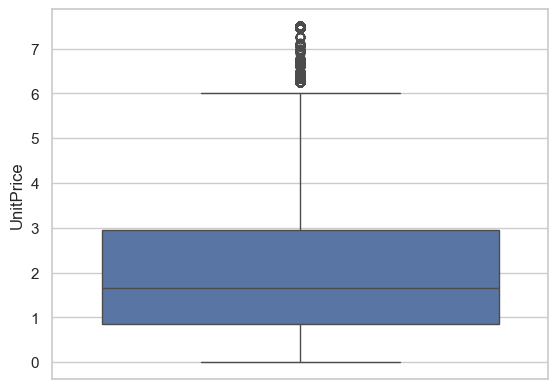

In [72]:
# ----------------------------------------
# Removing extreme UnitPrice outliers (using the IQR method)
# ----------------------------------------
Q1 = df_completed["UnitPrice"].quantile(0.25)
Q3 = df_completed["UnitPrice"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_completed = df_completed[(df_completed["UnitPrice"] >= lower) &
                (df_completed["UnitPrice"] <= upper)]


# Confirming the treatment
print(df_completed["UnitPrice"].describe(), "\n")

sns.boxplot(df_completed['UnitPrice'])

count   333048.00
mean         7.55
std          6.78
min          1.00
25%          2.00
50%          6.00
75%         12.00
max         27.00
Name: Quantity, dtype: float64 

Axes(0.125,0.11;0.775x0.77)


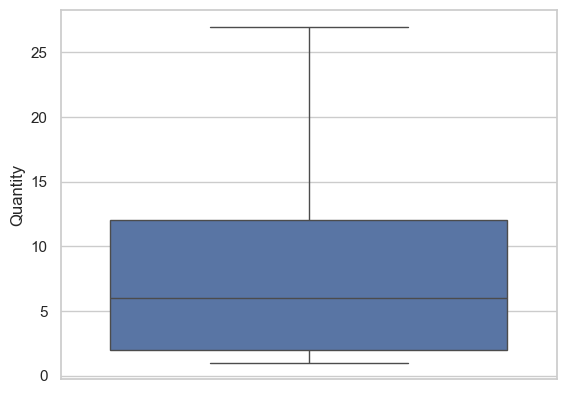

In [73]:
# ----------------------------------------
# Removing extreme quantity outliers (using IQR)
# ----------------------------------------
Q1 = df_completed["Quantity"].quantile(0.25)
Q3 = df_completed["Quantity"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_completed = df_completed[(df_completed["Quantity"] >= lower) &
                (df_completed["Quantity"] <= upper)]

#Confirming the treatment
print(df_completed["Quantity"].describe(), "\n")
print(sns.boxplot(df_completed['Quantity']))

In [74]:
df_completed.describe()

Quantity                    InvoiceDate  UnitPrice      Year     Month  \
count 333048.00                         333048  333048.00 333048.00 333048.00   
mean       7.55  2011-07-12 13:55:28.605066240       2.19   2010.93      7.66   
min        1.00            2010-12-01 08:26:00       0.00   2010.00      1.00   
25%        2.00            2011-04-08 09:54:00       1.25   2011.00      5.00   
50%        6.00            2011-08-03 12:06:00       1.65   2011.00      9.00   
75%       12.00            2011-10-23 12:08:00       2.95   2011.00     11.00   
max       27.00            2011-12-09 12:50:00       7.50   2011.00     12.00   
std        6.78                            NaN       1.55      0.25      3.41   

            Day      Hour   Minutes  OrderValue       CLV  
count 333048.00 333048.00 333048.00   333048.00 333048.00  
mean      15.05     12.77     30.40       12.91   8940.31  
min        1.00      6.00      0.00        0.00      3.75  
25%        7.00     11.00     16.00        3.95   1049.70  
50%       15.00     13.00     31.00       10.15   2527.92  
75%       22.00     14.00     45.00       17.40   5589.44  
max       31.00     20.00     59.00      178.80 279138.02  
std        8.66      2.26     17.10       13.22  22996.81

**<h4>Customer Metrics (RFM):</h4>**

> - Recency: Days since last purchase
> - Frequency: Number of purchases
> - Monetary: Total money spent

In [76]:
#First, we find the last purchase date in the dataset
max_date = df_completed["InvoiceDate"].max()

#Determine the RFM
rfm = df_completed.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (max_date - x.max()).days,
    "InvoiceNo": "nunique",
    "OrderValue": "sum"
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

#Attaching RFM back to df_completed
df_completed = df_completed.merge(rfm, how="left", on="CustomerID")

#Displaying the First few records
display(df_completed.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country        Date  Year  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  2010-12-01  2010   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  2010-12-01  2010   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01  2010   

   Month  Day  Hour  Minutes YearMonth  OrderValue OrderSizeCategory     CLV  \
0     12    1     8       26   2010-12       15.30            Medium 5391.21   
1     12    1     8       26   2010-12       20.34            Medium 5391.21   
2     12    1     8       26   2010-12       22.00            Medium 5391.21   
3     12    1     8       26   2010-12       20.34            Medium 5391.21   
4     12    1     8       26   2010-12       20.34            Medium 5391.21   

  MonthName  IsWeekend          Region  Recency  Frequency  Monetary  
0  December      False  Western Europe      371         34   4462.16  
1  December      False  Western Europe      371         34   4462.16  
2  December      False  Western Europe      371         34   4462.16  
3  December      False  Western Europe      371         34   4462.16  
4  December      False  Western Europe      371         34   4462.16

**<h4>Key Metrics for Analysis</h4>**

In [78]:
# ----------------------------------------
# Transaction Metrics
# ----------------------------------------
total_revenue = df_completed["OrderValue"].sum()
average_order_value = df_completed.groupby("InvoiceNo")["OrderValue"].sum().mean()
items_per_order = df_completed.groupby("InvoiceNo")["Quantity"].sum().mean()
num_transactions = df_completed["InvoiceNo"].nunique()

In [79]:
# ----------------------------------------
# Product Metrics
# ----------------------------------------
top_products_by_qty = df_completed.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products_by_revenue = df_completed.groupby("Description")["OrderValue"].sum().sort_values(ascending=False).head(10)

In [80]:
# ----------------------------------------
# Cancelled Invoice Rate
# ----------------------------------------
invoice_cancel_rate = df_cancelled["InvoiceNo"].nunique() / (
    df_cancelled["InvoiceNo"].nunique() + df_completed["InvoiceNo"].nunique()
)

**<h3>Visualizations</h3>**

**<h4>Objective 2: Product Bundling</h4>**
>- **Business Objective:** Identify top 10 most frequently co-purchased product pairs within 1 week (to support upsell & promotional strategies).
>- **Data Mining Goal:** Identify frequently co-purchased products and product bundles.

In [83]:
# -----------------------------
# Objective 2: Product Bundling
# -----------------------------

# 1) Top-N co-purchased pairs (fast co-occurrence method)
invoice_products = df_completed.groupby('InvoiceNo')['StockCode'].apply(lambda items: list(items)).reset_index()

pair_counter = Counter()
for prods in invoice_products['StockCode']:
    unique_prods = sorted(set(prods))
    if len(unique_prods) > 1:
        for pair in combinations(unique_prods, 2):         # unordered pair
            pair_counter[pair] += 1

# Top 10 pairs by frequency
top_10_pairs = pair_counter.most_common(10)
top10_pairs_df = pd.DataFrame(top_10_pairs, columns=['ProductPair','Frequency'])
top10_pairs_df['ProductA'] = top10_pairs_df['ProductPair'].apply(lambda x: x[0])
top10_pairs_df['ProductB'] = top10_pairs_df['ProductPair'].apply(lambda x: x[1])
top10_pairs_df = top10_pairs_df[['ProductA','ProductB','Frequency']]
print("Top 10 co-purchased pairs (stock codes):")
display(top10_pairs_df)

# Showing descriptions for human readability
# create mapping stockcode -> description (first non-null encountered)
stock_desc = df_completed.drop_duplicates(subset=['StockCode'])[['StockCode','Description']].set_index('StockCode')['Description'].to_dict()
top10_pairs_df['ProductA_desc'] = top10_pairs_df['ProductA'].map(stock_desc)
top10_pairs_df['ProductB_desc'] = top10_pairs_df['ProductB'].map(stock_desc)
display(top10_pairs_df)


Top 10 co-purchased pairs (stock codes):


ProductA ProductB  Frequency
0    22697    22699        517
1    22726    22727        515
2    20725    22384        482
3    20725    20727        476
4    20725    22383        475
5    22386   85099B        452
6    22697    22698        442
7    20727    22384        439
8    82482   82494L        437
9    20727    22383        436

ProductA ProductB  Frequency                      ProductA_desc  \
0    22697    22699        517    GREEN REGENCY TEACUP AND SAUCER   
1    22726    22727        515         ALARM CLOCK BAKELIKE GREEN   
2    20725    22384        482            LUNCH BAG RED RETROSPOT   
3    20725    20727        476            LUNCH BAG RED RETROSPOT   
4    20725    22383        475            LUNCH BAG RED RETROSPOT   
5    22386   85099B        452            JUMBO BAG PINK POLKADOT   
6    22697    22698        442    GREEN REGENCY TEACUP AND SAUCER   
7    20727    22384        439            LUNCH BAG  BLACK SKULL.   
8    82482   82494L        437  WOODEN PICTURE FRAME WHITE FINISH   
9    20727    22383        436            LUNCH BAG  BLACK SKULL.   

                      ProductB_desc  
0  ROSES REGENCY TEACUP AND SAUCER   
1         ALARM CLOCK BAKELIKE RED   
2           LUNCH BAG PINK POLKADOT  
3           LUNCH BAG  BLACK SKULL.  
4           LUNCH BAG SUKI  DESIGN   
5           JUMBO BAG RED RETROSPOT  
6    PINK REGENCY TEACUP AND SAUCER  
7           LUNCH BAG PINK POLKADOT  
8       WOODEN FRAME ANTIQUE WHITE   
9           LUNCH BAG SUKI  DESIGN

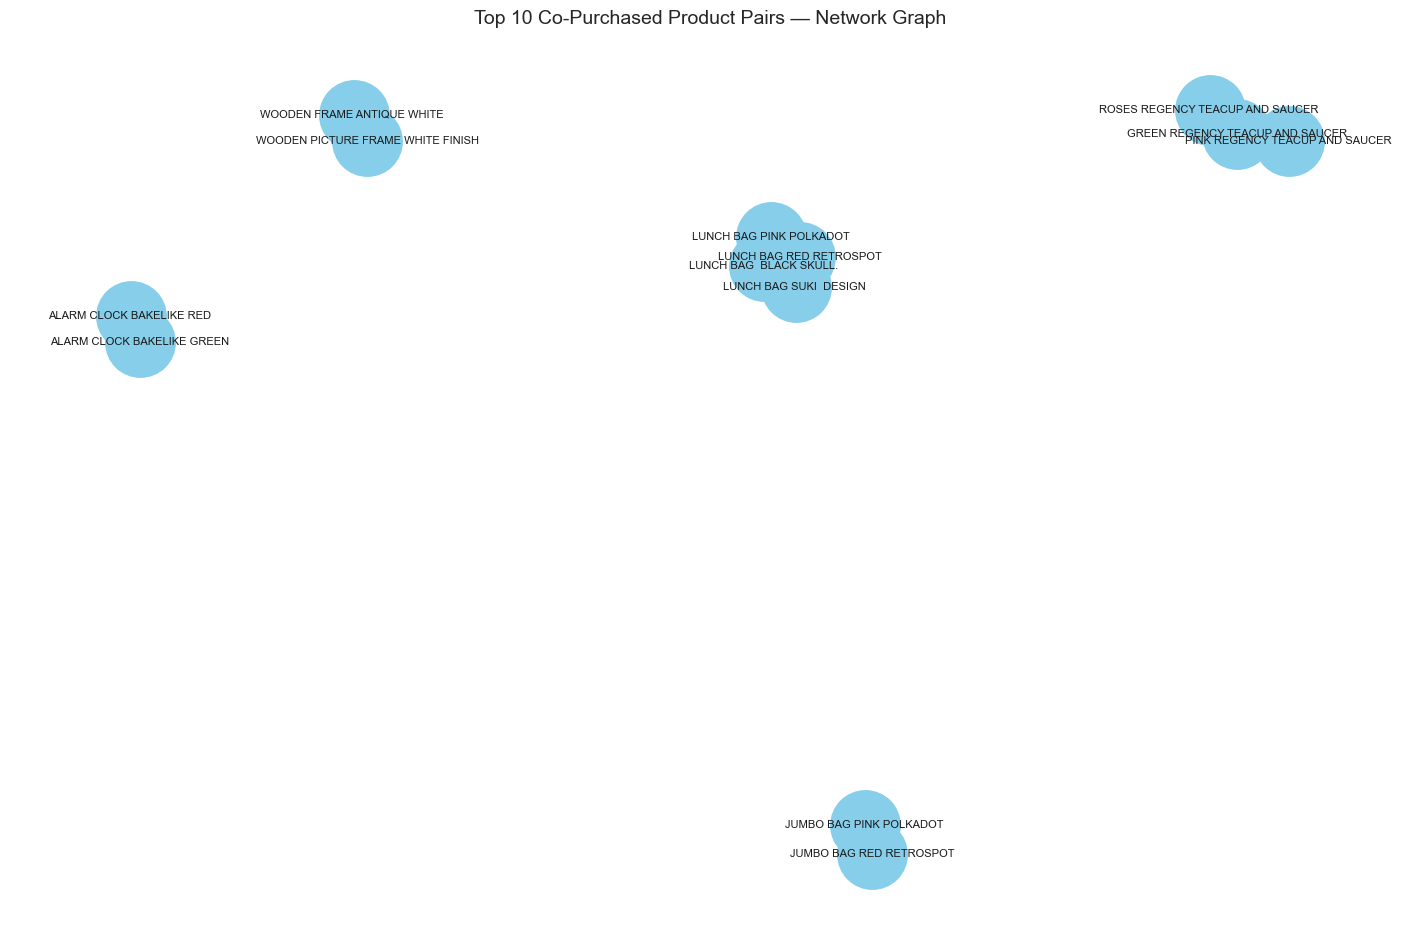

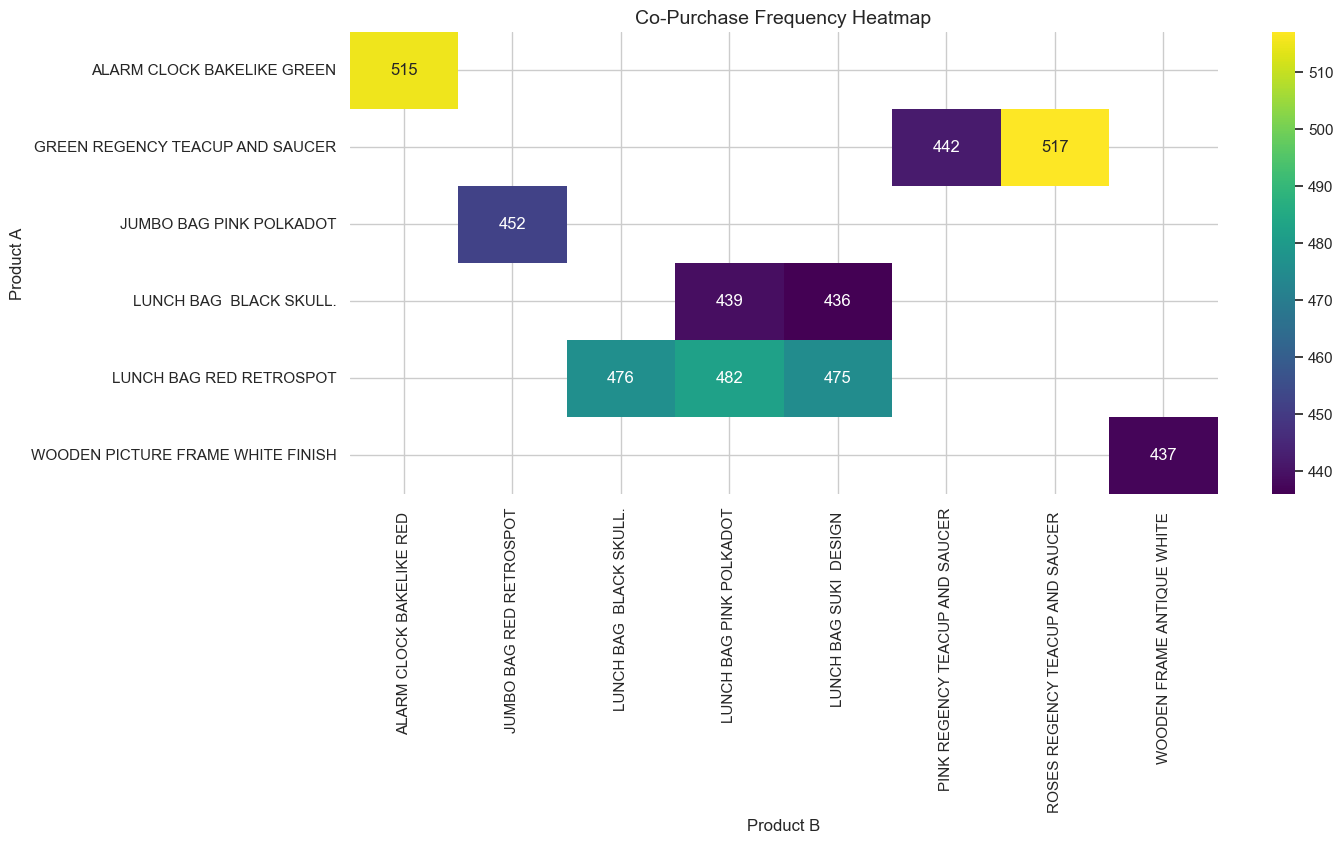

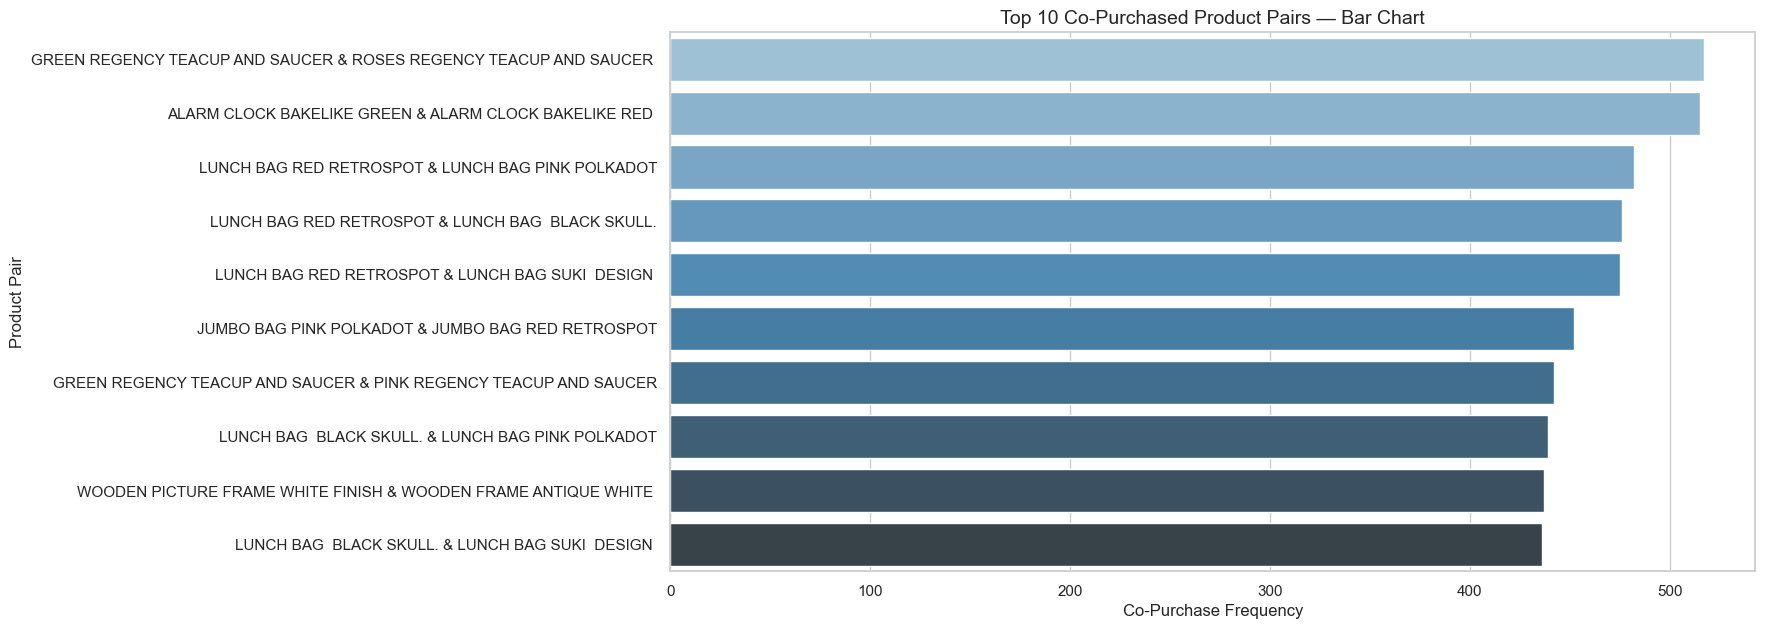

In [84]:
# ============================================================
# PRODUCT BUNDLING VISUALIZATION DASHBOARD
# ============================================================

# ------------------------------------------------------------
# 1. NETWORK GRAPH
# ------------------------------------------------------------

def plot_network_graph(df):
    G = nx.Graph()

    for _, row in df.iterrows():
        G.add_edge(
            row['ProductA_desc'],
            row['ProductB_desc'],
            weight=row['Frequency']
        )

    pos = nx.spring_layout(G, k=0.7, seed=42)

    plt.figure(figsize=(14, 9))

    edges = G.edges()
    weights = [G[u][v]['weight'] / 40 for u, v in edges]  # thickness scaling

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=2500,
        node_color="skyblue",
        font_size=8,
        width=weights,
        edge_color="gray"
    )

    plt.title("Top 10 Co-Purchased Product Pairs — Network Graph", fontsize=14)
    plt.show()


# ------------------------------------------------------------
# 2. SANKEY DIAGRAM
# ------------------------------------------------------------

def plot_sankey(df):
    labels = list(set(df['ProductA_desc']).union(set(df['ProductB_desc'])))
    label_to_idx = {label: i for i, label in enumerate(labels)}

    source = df['ProductA_desc'].map(label_to_idx)
    target = df['ProductB_desc'].map(label_to_idx)
    values = df['Frequency']
    
    
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            label=labels,
            pad=20,
            thickness=15
        ),
        link=dict(
            source=source,
            target=target,
            value=values
        )
    )])

    fig.update_layout(
        title="Top 10 Co-Purchased Product Pairs — Sankey Diagram",
        font_size=10,
        width=1200,
        height=400
    )
    fig.show()


# ------------------------------------------------------------
# 3. HEATMAP MATRIX
# ------------------------------------------------------------

def plot_heatmap(df):
    matrix = df.pivot_table(
        index="ProductA_desc",
        columns="ProductB_desc",
        values="Frequency"
    )

    plt.figure(figsize=(14, 6))
    sns.heatmap(matrix, annot=True, cmap="viridis", fmt="g")
    plt.title("Co-Purchase Frequency Heatmap", fontsize=14)
    plt.xlabel("Product B")
    plt.ylabel("Product A")
    plt.show()


# ------------------------------------------------------------
# 4. BAR CHART
# ------------------------------------------------------------

def plot_bar_chart(df):
    df_copy = df.copy()
    df_copy["Pair"] = df_copy["ProductA_desc"] + " & " + df_copy["ProductB_desc"]

    plt.figure(figsize=(14, 7))
    sns.barplot(
        data=df_copy.sort_values("Frequency", ascending=False),
        x="Frequency",
        y="Pair",
        palette="Blues_d",
        hue="Pair"
    )
    plt.title("Top 10 Co-Purchased Product Pairs — Bar Chart", fontsize=14)
    plt.xlabel("Co-Purchase Frequency")
    plt.ylabel("Product Pair")
    plt.show()


# ============================================================
# RUN ALL VISUALIZATIONS
# ============================================================

plot_network_graph(top10_pairs_df)
plot_sankey(top10_pairs_df)
plot_heatmap(top10_pairs_df)
plot_bar_chart(top10_pairs_df)


In [85]:
#Saving the top_10 pairs for visualization
top10_pairs_df.to_csv('Results/Objective_2/top10_product_pairs.csv', index=False)
print("✅ Top-10 product pairs frequently purchased together have been successfully saved to 'Results/Objective_2/top10_product_pairs.csv' file")

✅ Top-10 product pairs frequently purchased together have been successfully saved to 'Results/Objective_2/top10_product_pairs.csv' file


**<h4>Objective 3 - Sales Trend Analysis</h4>**
>- **Business Objective:** Analyze seasonal trends and revenue patterns for all major product categories and deliver visual dashboards within 10 days to support inventory planning for the next sales cycle.
>- **Data Mining Goal:** Determine best-selling items, slow-moving items, and seasonal trends.

**<h4>1. Daily Sales Trend</h4>**

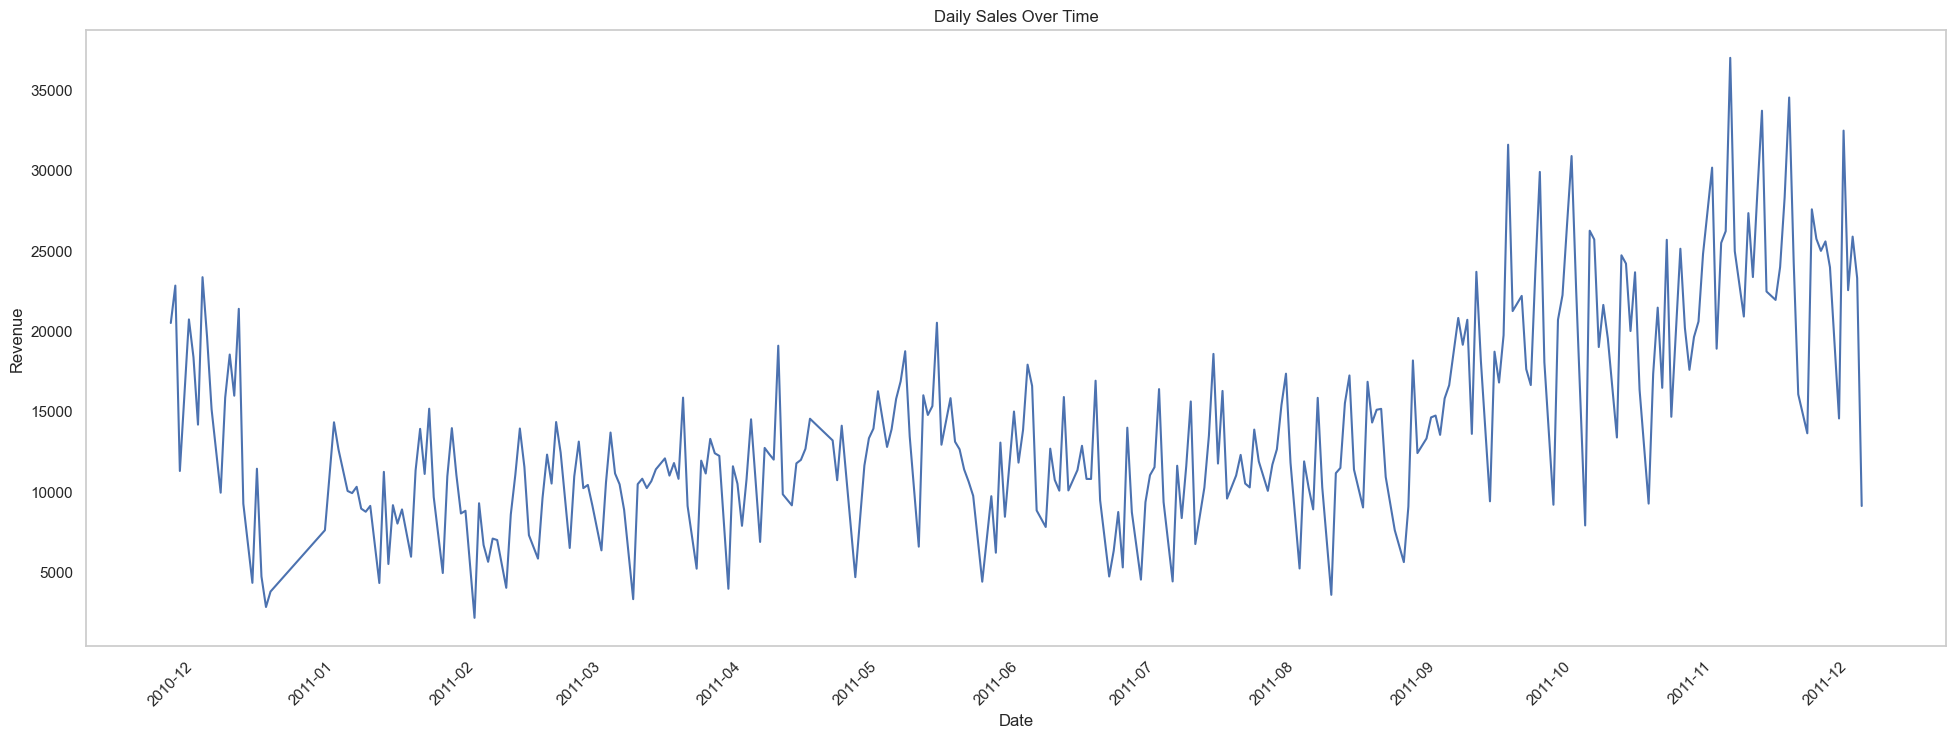

In [88]:
#Aggregate Revenue by day
daily_sales = df_completed.groupby(df_completed["InvoiceDate"].dt.date)["OrderValue"].sum()

# Ensure index is datetime
daily_sales.index = pd.to_datetime(daily_sales.index)

plt.figure(figsize=(24, 8))
plt.plot(daily_sales.index, daily_sales.values)

plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(False)

# Set monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate labels
plt.xticks(rotation=45)

plt.show()

**<h4>2a. Monthly Sales Trend</h4>**

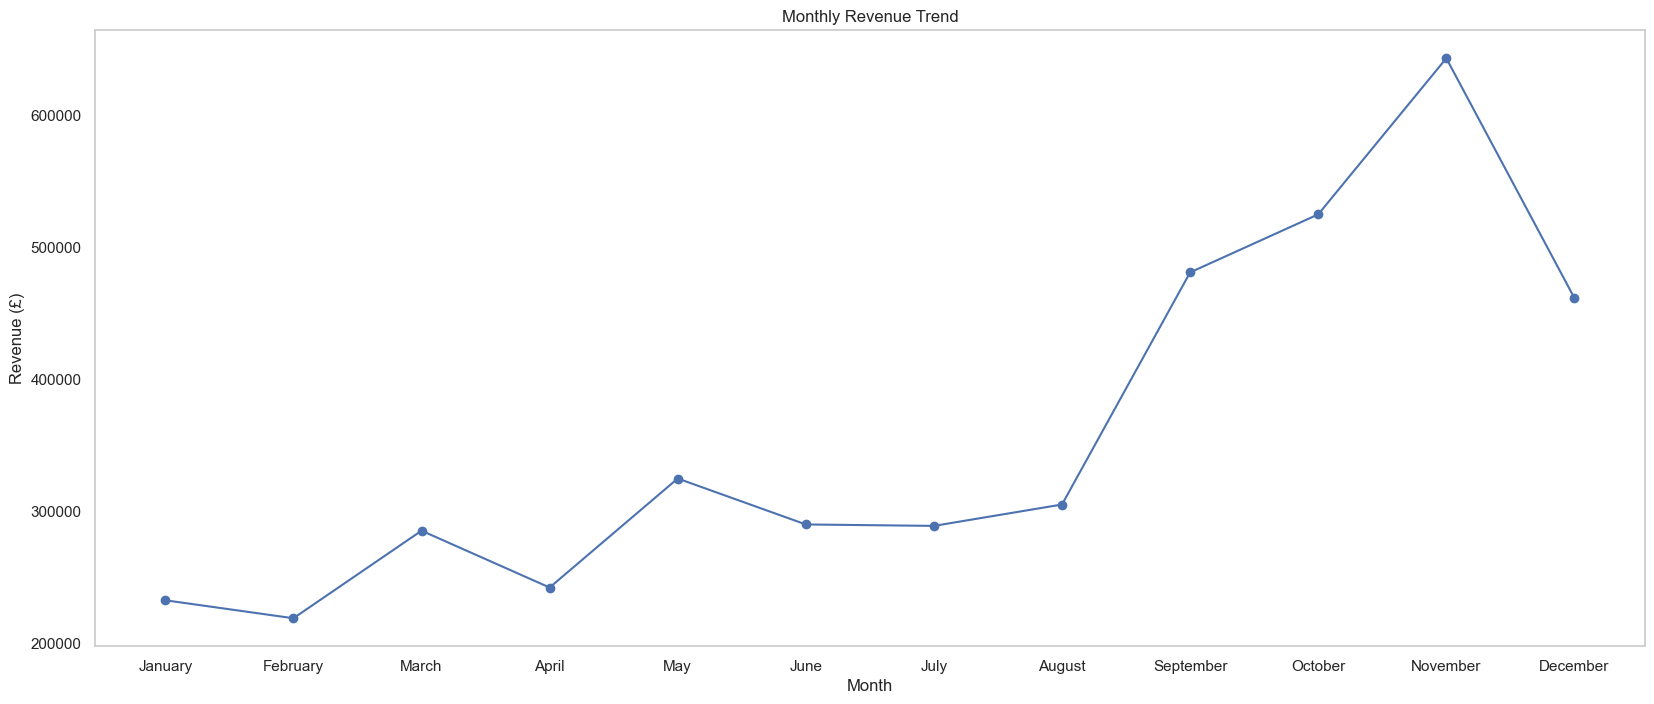

In [90]:
#This is important for seasonal forecasting & inventory planning

#First, define the month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

#Convert MonthName to a categorical with ordered months
df_completed["MonthName"] = pd.Categorical(df_completed["MonthName"], categories=month_order, ordered=True)

#Groupby MonthName
monthly_revenue = df_completed.groupby("MonthName", observed=False)["OrderValue"].sum()

plt.figure(figsize=(20, 8))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (£)", fontsize=12)
plt.grid(False)

# Showing all months on the x-axis
plt.xticks(ticks=range(len(month_order)), labels=month_order)
plt.show()

In [91]:
#Once again, the high sales value of November can be attributed to the black Friday promotions that typically takes place in November

**<h4>2b. Monthly Quantity Trend</h4>**

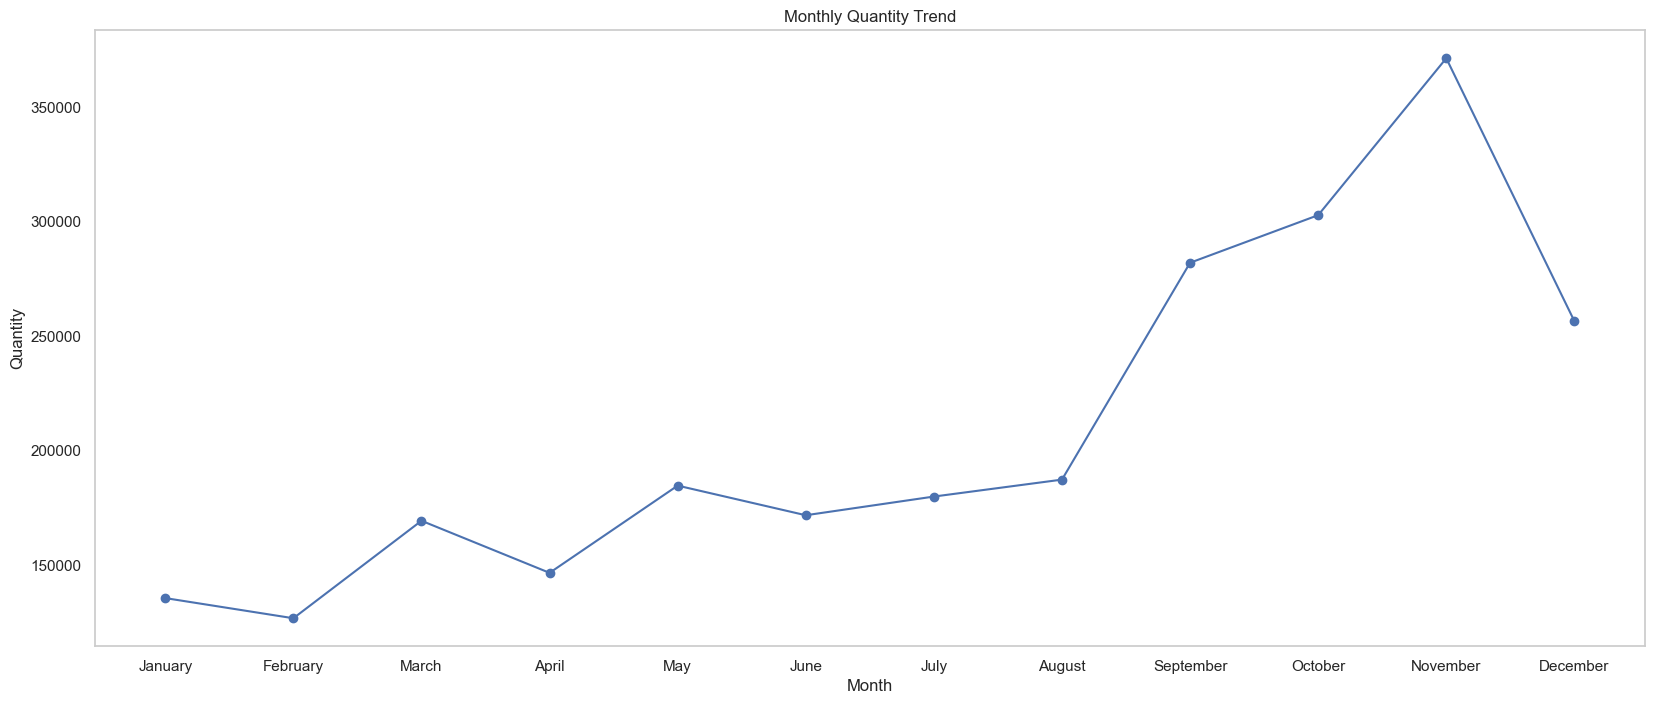

In [93]:
#This is important for seasonal forecasting & inventory planning

#First, define the month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

#Convert MonthName to a categorical with ordered months
df_completed["MonthName"] = pd.Categorical(df_completed["MonthName"], categories=month_order, ordered=True)

#Groupby MonthName
monthly_quantity = df_completed.groupby("MonthName", observed=False)["Quantity"].sum()

plt.figure(figsize=(20, 8))
monthly_quantity.plot(kind='line', marker='o')
plt.title("Monthly Quantity Trend")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.grid(False)

# Showing all months on the x-axis
plt.xticks(ticks=range(len(month_order)), labels=month_order)
plt.show()

**<h4>2c. Monthly Revenue by Top 3 Categories</h4>**

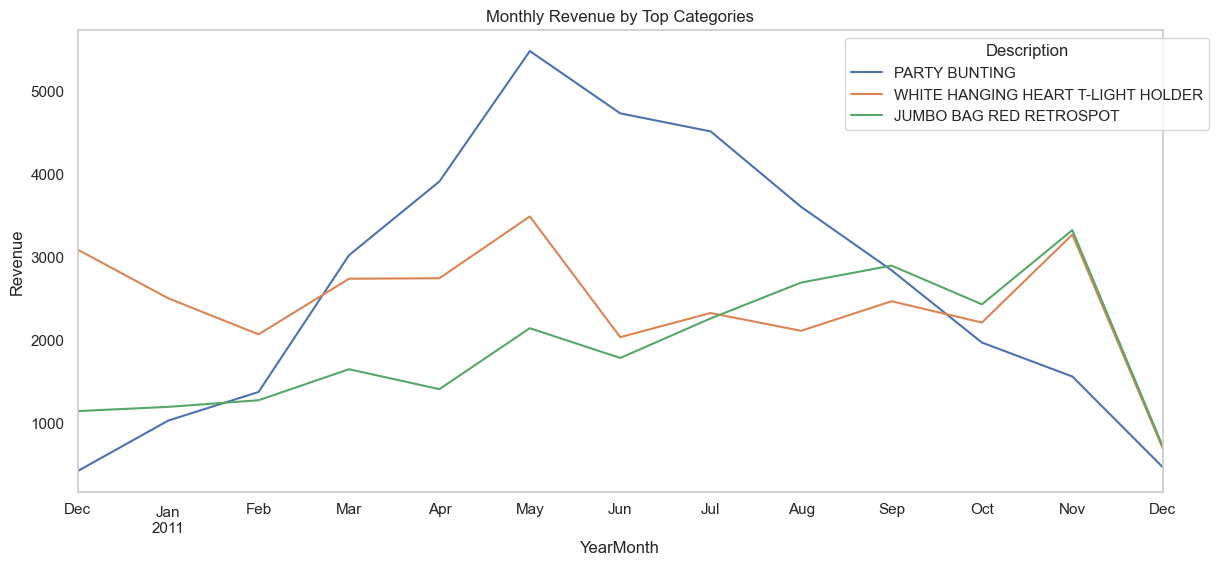

In [95]:
# Category-level monthly sales (pivot table)
cat_month = df_completed.groupby(['Description','YearMonth'])['OrderValue'].sum().unstack(fill_value=0)

# Plot top N categories by total revenue
top_categories = df_completed.groupby('Description')['OrderValue'].sum().sort_values(ascending=False).head(3).index.tolist()   #Plotting top 3
cat_month.loc[top_categories].T.plot(figsize=(14,6))
plt.title('Monthly Revenue by Top Categories'); plt.xlabel('YearMonth'); plt.ylabel('Revenue'); plt.legend(title='Description', bbox_to_anchor=(1.05,1)); plt.grid(False); plt.show()

**<h4>3. Weekday Sales Pattern</h4>**

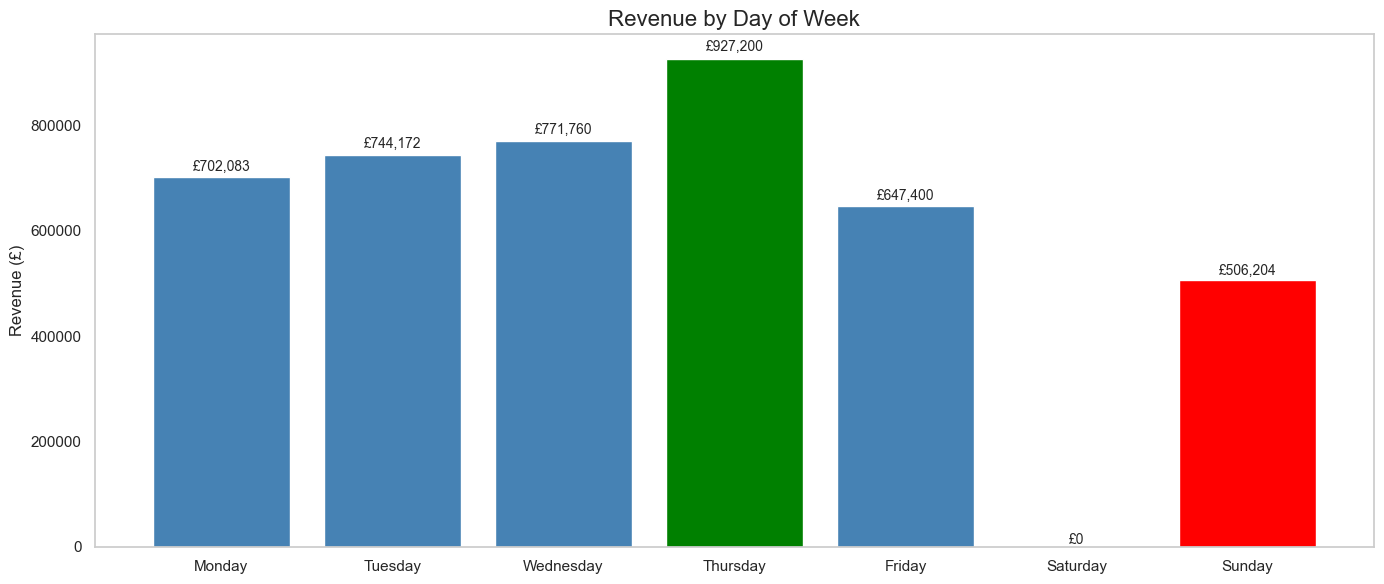

In [97]:
df_completed["Weekday"] = df_completed["InvoiceDate"].dt.day_name()

weekday_sales = df_completed.groupby("Weekday")["OrderValue"].sum().reindex([
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
]).fillna(0)

# Excluding zero revenue days from min/max comparison
non_zero_values = weekday_sales[weekday_sales > 0]

min_value = non_zero_values.min()
max_value = non_zero_values.max()

colors = ["green" if v == max_value else 
          "red" if v == min_value else 
          "steelblue" for v in weekday_sales.values]

plt.figure(figsize=(14, 6))
bars = plt.bar(weekday_sales.index, weekday_sales.values, color=colors)
plt.title("Revenue by Day of Week", fontsize=16)
plt.ylabel("Revenue (£)", fontsize=12)
plt.grid(False)

# Add values on top of bars
ax = plt.gca()
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + (height * 0.01),   # small offset
        f"£{height:,.0f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()

plt.show()


**<h4>4. Hourly Sales Heatmap</h4>**

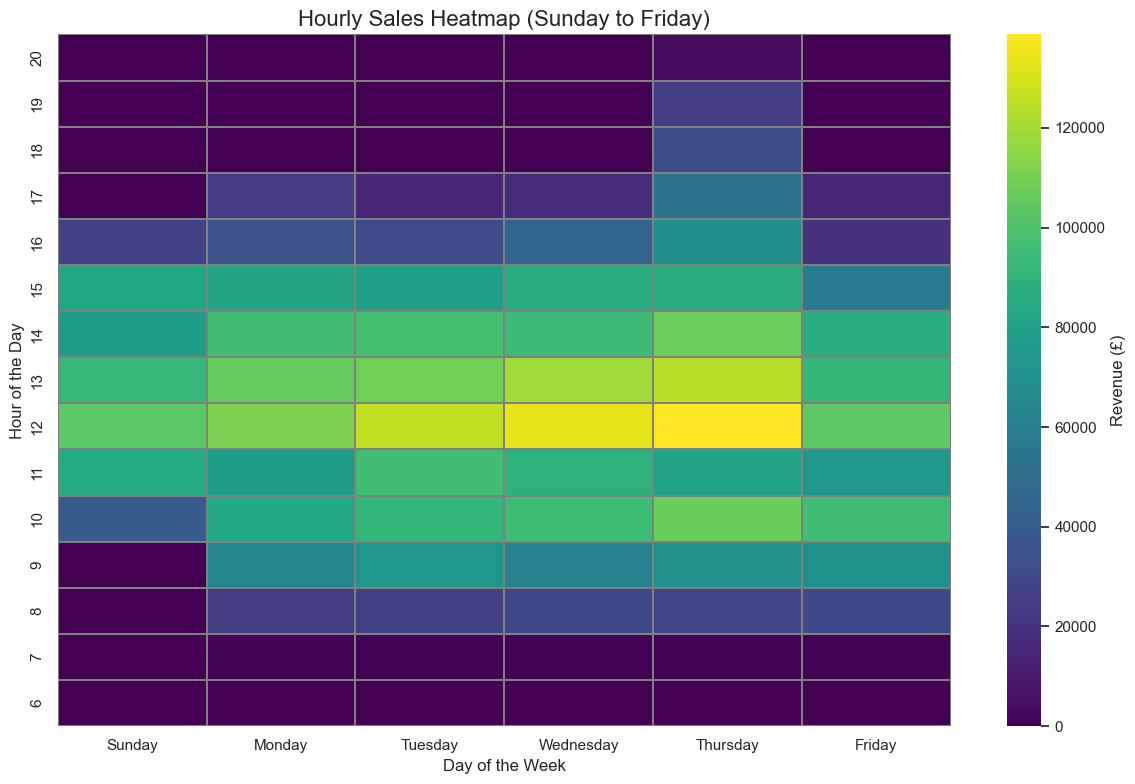

In [99]:
#Defining the desired weekday order
weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

#Ensuring the Weekday is ordered
df_completed["Weekday"] = pd.Categorical(
    df_completed["Weekday"],
    categories=weekday_order,
    ordered=True
)

#Creating a pivot table  --> we'll use a fill_value=0 to avoid NaNs in the heatmap
pivot = pd.pivot_table(
    df_completed,
    values="OrderValue",
    index="Hour",
    columns="Weekday",
    aggfunc="sum",
    fill_value=0,
    observed=False
).sort_index(ascending=False)

#Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot,
    cmap="viridis",
    linewidths=.3,
    linecolor="gray",
    cbar_kws={'label': 'Revenue (£)'},
)

plt.title("Hourly Sales Heatmap (Sunday to Friday)", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Hour of the Day", fontsize=12)
plt.tight_layout()
plt.show()


**<h4>5. Identifying Slow-Moving Items</h4>**

- Items that generated very low revenue and have not been sold for more than 90 days

In [101]:
# Identify slow-moving items (low sales, long time since last sale)
prod_stats = df_completed.groupby(['StockCode','Description']).agg(
    TotalQty=('Quantity','sum'),
    TotalRevenue=('OrderValue','sum'),
    LastSold=('InvoiceDate','max'),
    FirstSold=('InvoiceDate','min'),
    NumOrders=('InvoiceNo','nunique')
).reset_index()

prod_stats['DaysSinceLastSale'] = (pd.to_datetime(df_completed['InvoiceDate'].max()) - pd.to_datetime(prod_stats['LastSold'])).dt.days
slow_movers = prod_stats[(prod_stats['TotalRevenue'] < prod_stats['TotalRevenue'].quantile(0.25)) & (prod_stats['DaysSinceLastSale'] > 90)]
display(slow_movers.sort_values(['DaysSinceLastSale','TotalRevenue'], ascending=[False,True]).head(10))

StockCode                          Description  TotalQty  TotalRevenue  \
831      21895        POTTING SHED SOW 'N' GROW SET         1          4.25   
3032     84854                  GIRLY PINK TOOL SET         5         24.75   
588      21488    RED WHITE SCARF  HOT WATER BOTTLE         3         11.85   
1577     22778                 GLASS BELL JAR SMALL         4         15.80   
455      21268             VINTAGE BLUE TINSEL REEL         2          0.84   
2422    35271S                 GOLD PRINT PAPER BAG        19          3.61   
3239     85144      JARDIN ETCHED GLASS BUTTER DISH         1          7.25   
43      16161M                     WRAP  PINK FLOCK        25         10.50   
3441    90128B    BLUE LEAVES AND BEADS PHONE CHARM         1          1.25   
3466    90152B  BLUE/GREEN SHELL NECKLACE W PENDANT         1          5.95   

                LastSold           FirstSold  NumOrders  DaysSinceLastSale  
831  2010-12-01 12:31:00 2010-12-01 12:31:00          1                373  
3032 2010-12-01 09:41:00 2010-12-01 09:41:00          1                373  
588  2010-12-01 16:58:00 2010-12-01 12:35:00          2                372  
1577 2010-12-02 10:53:00 2010-12-02 10:53:00          1                372  
455  2010-12-02 15:46:00 2010-12-02 15:46:00          1                371  
2422 2010-12-02 13:49:00 2010-12-01 17:35:00          2                371  
3239 2010-12-02 15:46:00 2010-12-02 15:46:00          1                371  
43   2010-12-02 18:15:00 2010-12-02 18:15:00          1                371  
3441 2010-12-03 14:54:00 2010-12-03 14:54:00          1                370  
3466 2010-12-03 14:54:00 2010-12-03 14:54:00          1                370

In [102]:
# Total number of slow-moving products
total_slow_movers = len(slow_movers)

# Total number of unique products
total_products = df_completed["StockCode"].nunique()

# Percentage of slow movers
perc_slow_movers = (total_slow_movers / total_products) * 100

print(f"Total Number of Slow-Moving Products: {total_slow_movers}")
print(f"Percentage of Slow-Moving Products: {perc_slow_movers:.2f}%")

Total Number of Slow-Moving Products: 450
Percentage of Slow-Moving Products: 13.28%


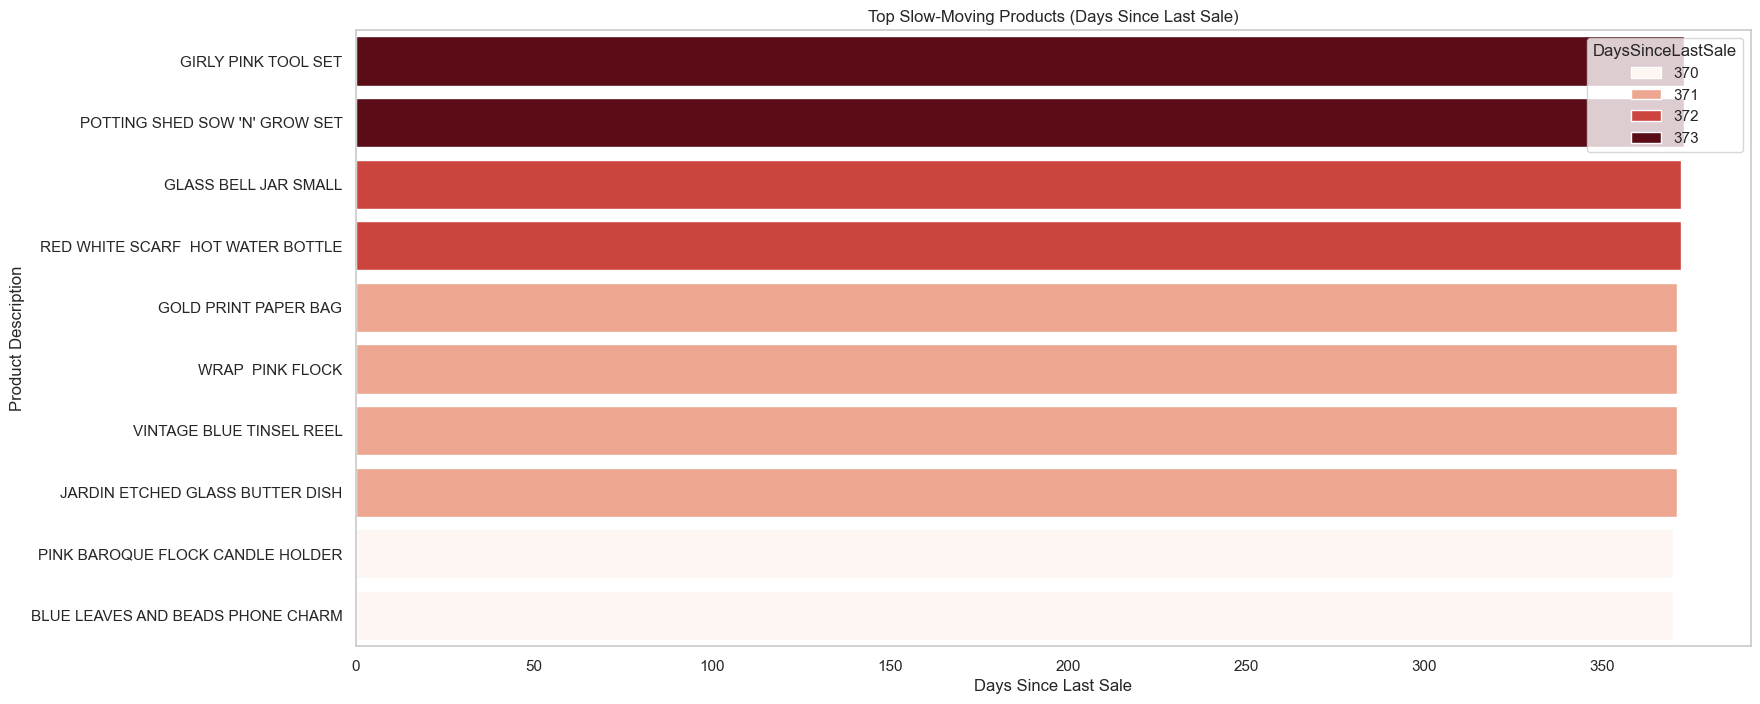

In [103]:
top_slow_movers = slow_movers.sort_values('DaysSinceLastSale', ascending=False).head(10)

plt.figure(figsize=(18, 8))
sns.barplot(
    data=top_slow_movers,
    x="DaysSinceLastSale",
    y="Description",
    palette="Reds",
    hue="DaysSinceLastSale"
)
plt.title("Top Slow-Moving Products (Days Since Last Sale)")
plt.xlabel("Days Since Last Sale")
plt.ylabel("Product Description")
plt.grid(False)
plt.show()

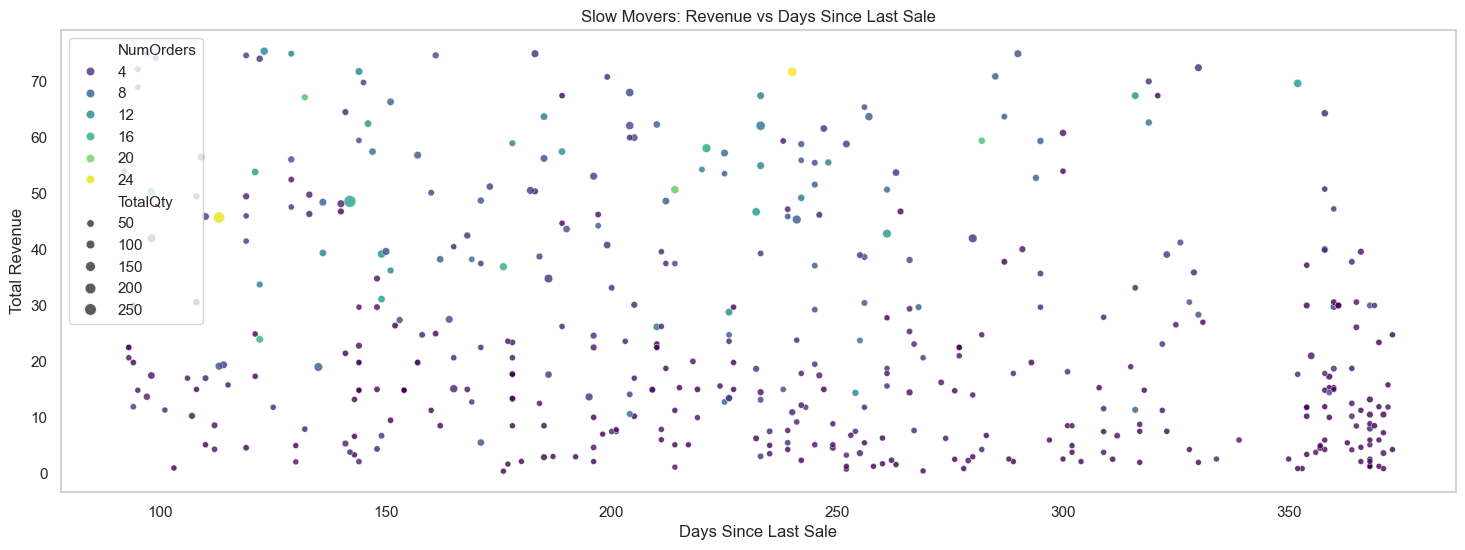

In [104]:
plt.figure(figsize=(18, 6))
sns.scatterplot(
    data=slow_movers,
    x="DaysSinceLastSale",
    y="TotalRevenue",
    size="TotalQty",
    hue="NumOrders",
    palette="viridis",
    alpha=0.8
)
plt.title("Slow Movers: Revenue vs Days Since Last Sale")
plt.xlabel("Days Since Last Sale")
plt.ylabel("Total Revenue")
plt.grid(False)
plt.show()


In [105]:
#Visualizing all the slow-movers

fig = px.scatter(
    slow_movers,
    x="DaysSinceLastSale",
    y="TotalRevenue",
    color="NumOrders",
    size="TotalQty",
    hover_data=["StockCode", "Description"],
    title="Slow Movers Interactive Visualization"
)

# Increase the size of the plot
fig.update_layout(
    width=1200,  # Increasing the width (default is 600)
    height=800,  # Increasing the height (default is 400)
)
fig.show()

In [106]:
# Save outputs for dashboards
daily_sales.to_csv('Results/Objective_3/daily_sales.csv', index=False)
print("✅ Daily Sales have been successfully saved to 'Results/Objective_3/daily_sales.csv' file")

monthly_revenue.to_csv('Results/Objective_3/monthly_sales.csv', index=False)
print("✅ Monthly Sales have been successfully saved to 'Results/Objective_3/monthly_sales.csv' file")

cat_month.to_csv('Results/Objective_3/category_monthly_sales.csv')
print("✅ Monthly Revenues by categories have been successfully saved to 'Results/Objective_3/category_monthly_sales.csv' file")

pivot.to_csv('Results/Objective_3/weekday_sales_pattern.csv')
print("✅ Weekday Sales Pattern have been successfully saved to 'Results/Objective_3/weekday_sales_pattern.csv' file")

prod_stats.to_csv('Results/Objective_3/product_stats.csv', index=False)
print("✅ Slow moving items have been successfully saved to 'Results/Objective_3/product_stats.csv' file")

✅ Daily Sales have been successfully saved to 'Results/Objective_3/daily_sales.csv' file
✅ Monthly Sales have been successfully saved to 'Results/Objective_3/monthly_sales.csv' file
✅ Monthly Revenues by categories have been successfully saved to 'Results/Objective_3/category_monthly_sales.csv' file
✅ Weekday Sales Pattern have been successfully saved to 'Results/Objective_3/weekday_sales_pattern.csv' file
✅ Slow moving items have been successfully saved to 'Results/Objective_3/product_stats.csv' file


**<h4>Objective 4: Revenue Optimization Insights</h4>**
> - **Business Objective:** Analyze revenue performance across customers, countries, and product categories, and deliver a ranked list of top revenue drivers within 10 days, to support strategic pricing and market expansion decisions in the next quarter.
> - **Data Mining Goals:** Compute revenue metrics by customer, country, and product to highlight high-growth opportunities.

**<h4>1. Distribution of Customers by MonetaryValue</h4>**

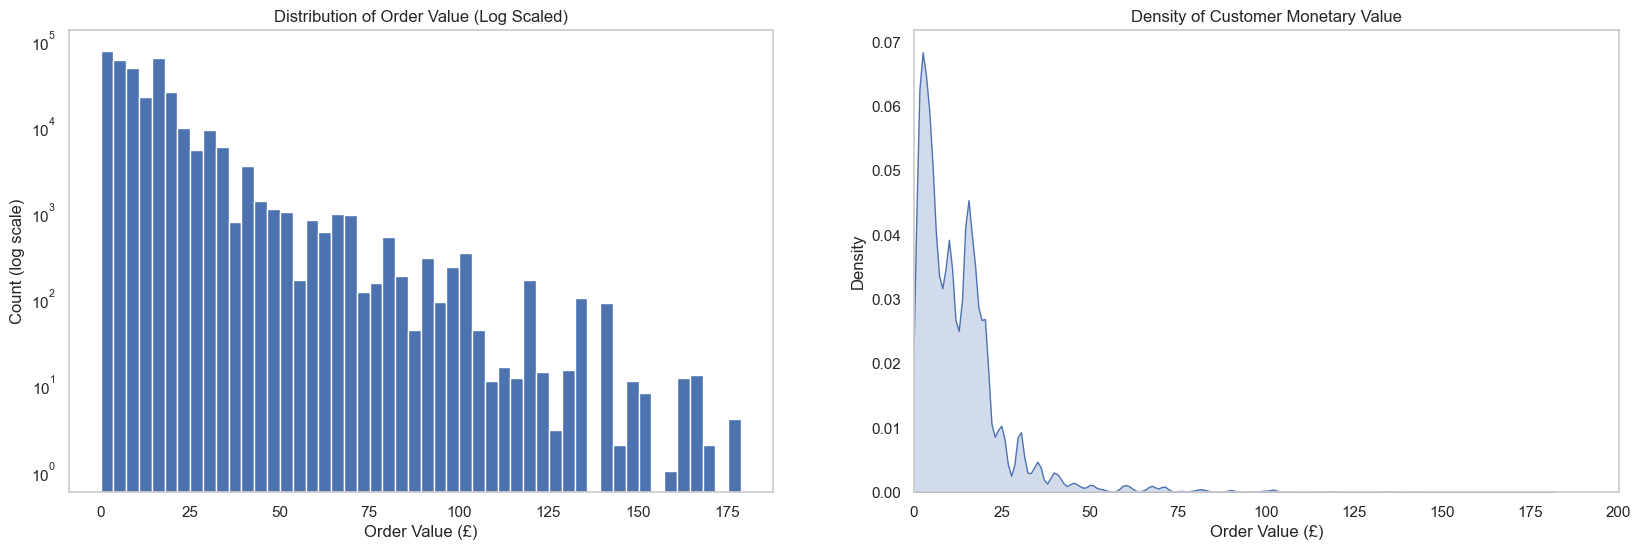

In [109]:
plt.figure(figsize=(20,6))

#First Plot - Log-Scaled histogram
plt.subplot(1, 2, 1)
plt.hist(df_completed["OrderValue"], bins=50)
plt.yscale("log")
plt.title("Distribution of Order Value (Log Scaled)")
plt.xlabel("Order Value (£)")
plt.ylabel("Count (log scale)")
plt.grid(False)

#Second Plot - KDE Density
plt.subplot(1, 2, 2)
sns.kdeplot(df_completed["OrderValue"], fill=True)
plt.title("Density of Customer Monetary Value")
plt.xlabel("Order Value (£)")
plt.ylabel("Density")
plt.xlim(0, 200)   # Focusing on most common range
plt.grid(False)
plt.show()

**<h4>2. Revenue by Customers</h4>**

In [111]:
# Revenue by customer (CLV)
customer_revenue = df_completed.groupby('CustomerID')['OrderValue'].sum().sort_values(ascending=False).rename('TotalRevenue').reset_index()
display(customer_revenue.head(20))

#Saving file for visualization
customer_revenue.to_csv('Results/Objective_4/customer_revenue_clv.csv', index=False)
print("✅ Revenue by customer (CLV) saved to 'Results/Objective_4/customer_revenue_clv.csv' file")


CustomerID  TotalRevenue
0       14911      84980.89
1       13089      36347.88
2       14096      36019.84
3       17841      32200.74
4       14298      24387.53
5       12748      20441.10
6       14156      18276.11
7       13081      17925.53
8       15311      17712.96
9       14088      15700.62
10      15159      14334.96
11      17675      14162.95
12      15039      13964.12
13      12921      13030.37
14      17511      12117.42
15      17735      12077.38
16      14646      11901.92
17      15498      11199.47
18      14051      10378.01
19      13098       9869.38

✅ Revenue by customer (CLV) saved to 'Results/Objective_4/customer_revenue_clv.csv' file


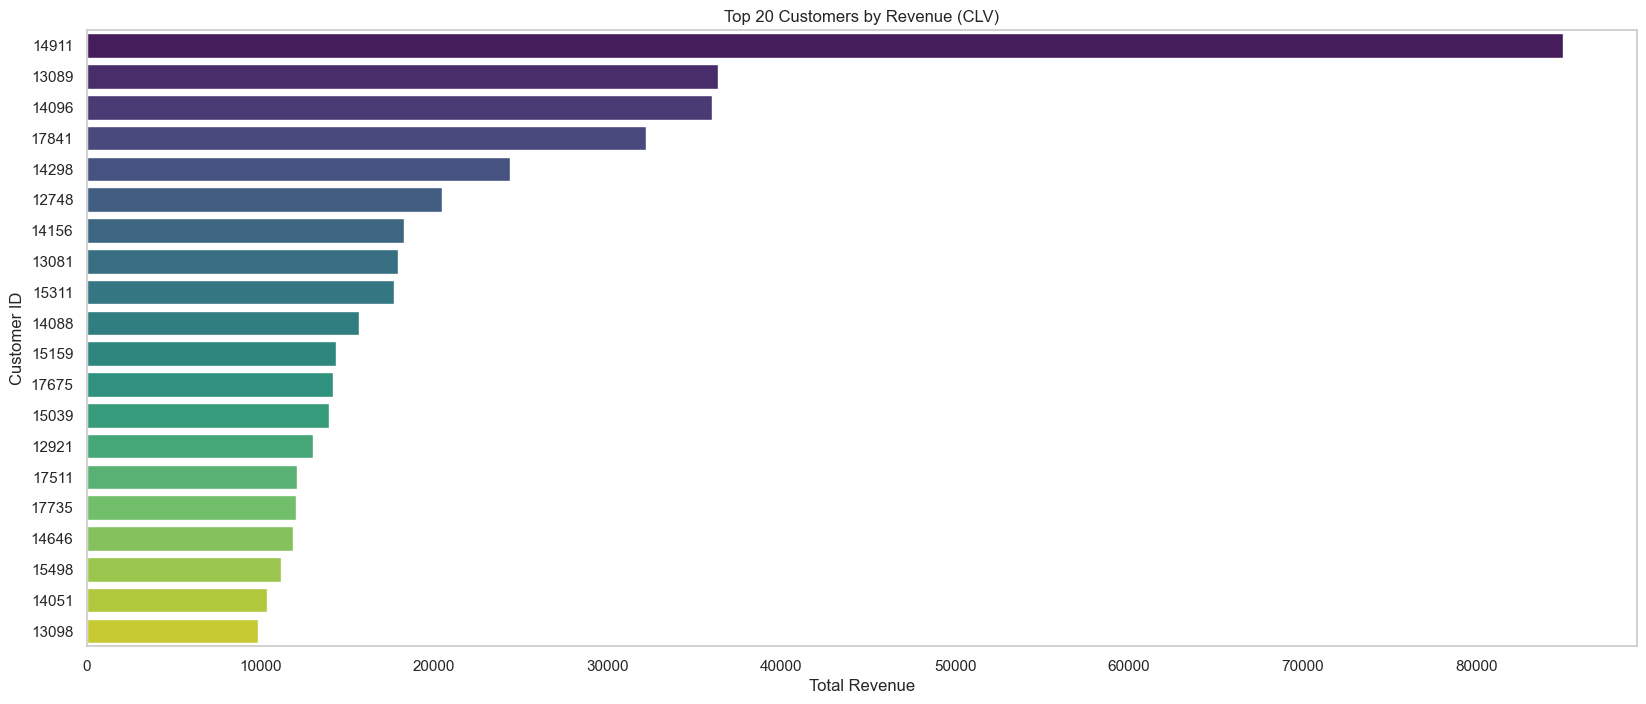

In [112]:
# ---------------------------------
# Horizontal Bar Chart of top 20 customers by CLV
# ---------------------------------

# Select top 20 customers by total revenue
top_20_customers = customer_revenue.head(20)

# Create horizontal bar chart
plt.figure(figsize=(20, 8))
sns.barplot(
    data=top_20_customers,
    x="TotalRevenue",
    y="CustomerID",
    palette="viridis",
    hue="CustomerID"
)
plt.title("Top 20 Customers by Revenue (CLV)")
plt.xlabel("Total Revenue")
plt.ylabel("Customer ID")
plt.grid(False)
plt.show()


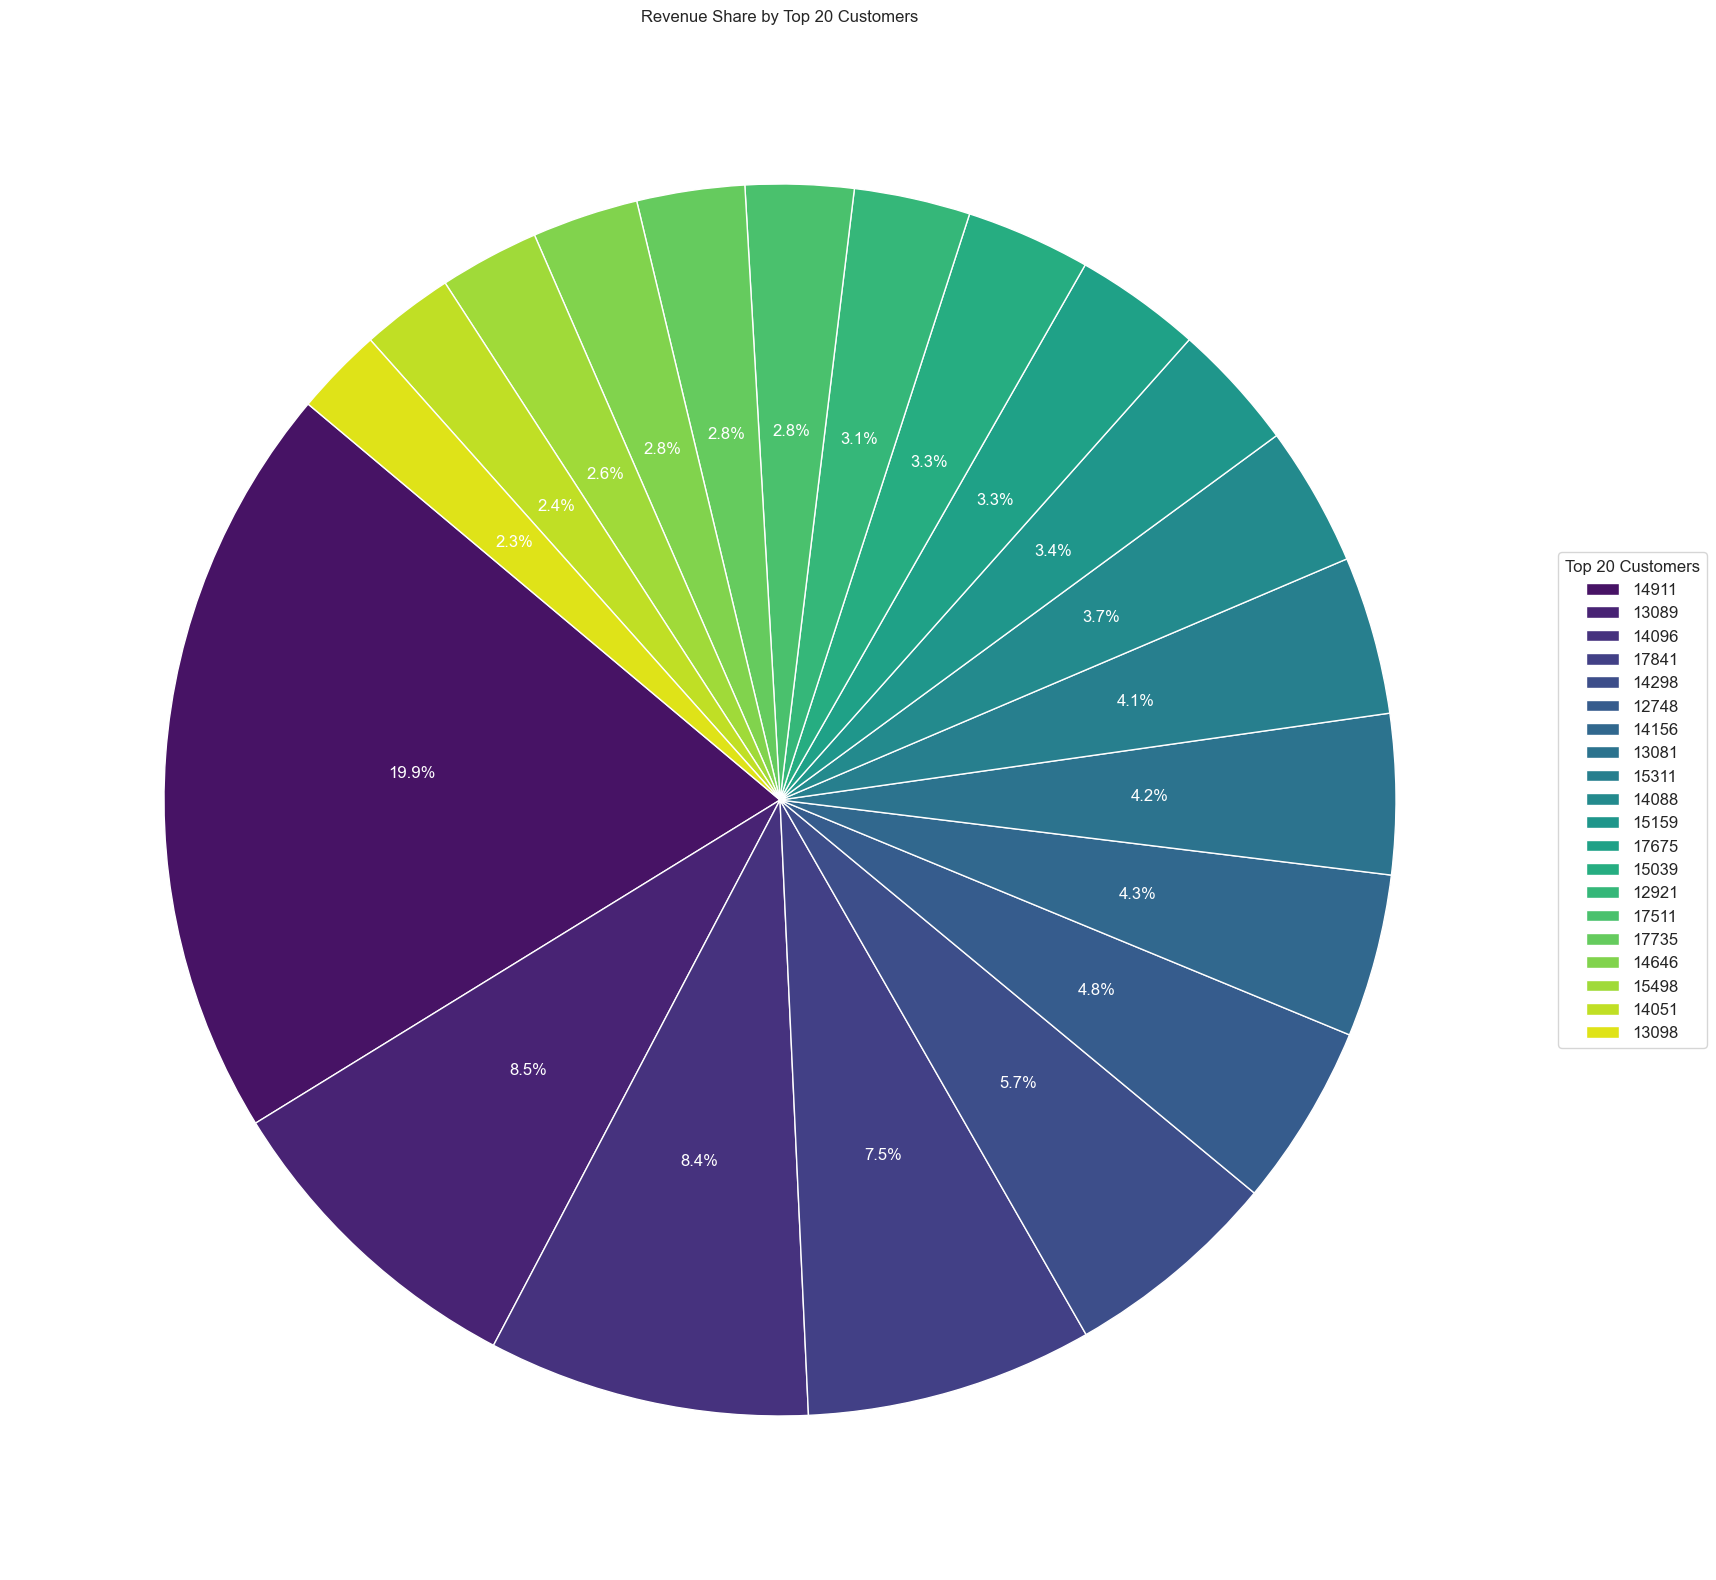

In [113]:
# ---------------------------------
# Pie chart to visualize revenue distribution of top 20 customers
# ---------------------------------
plt.figure(figsize=(20, 20))
wedges, texts, autotexts = plt.pie(
    top_20_customers['TotalRevenue'],
    labels=top_20_customers['CustomerID'],
    autopct='%1.1f%%',
    colors=sns.color_palette("viridis", len(top_20_customers)),
    startangle=140,
    textprops={'color': 'white'}
)

plt.title("Revenue Share by Top 20 Customers")

# Add the legend
plt.legend(
    wedges, 
    top_20_customers['CustomerID'],  # Labels for the legend
    title="Top 20 Customers",  # Legend title
    loc="center left",  # Location of the legend
    bbox_to_anchor=(1, 0, 0.5, 1),  # Place the legend outside the plot
    fontsize=12
)

plt.show()


**<h4>3. Revenue by Country and Region</h4>**

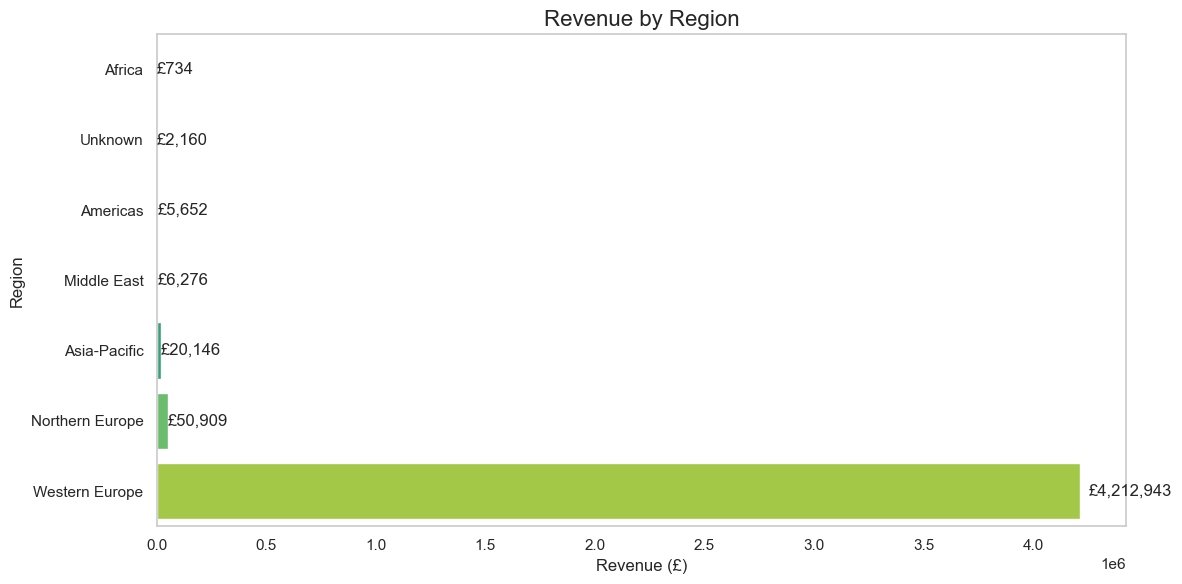

In [115]:
# ------------------------------
# Revenue by Region
# ------------------------------
region_revenue = df_completed.groupby("Region")["OrderValue"].sum().sort_values()

# Convert series to DataFrame for Seaborn
df_region = region_revenue.reset_index()
df_region.columns = ["Region", "Revenue"]

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Revenue",
    y="Region",
    data=df_region,
    hue="Region",
    dodge=False,
    palette="viridis"   
)

plt.title("Revenue by Region", fontsize=16)
plt.xlabel("Revenue (£)")
plt.ylabel("Region")
plt.grid(False)

# Add labels
for i, row in df_region.iterrows():
    ax.text(row["Revenue"] + row["Revenue"]*0.01, i, f"£{row['Revenue']:,.0f}", va='center')

plt.tight_layout()
plt.show()

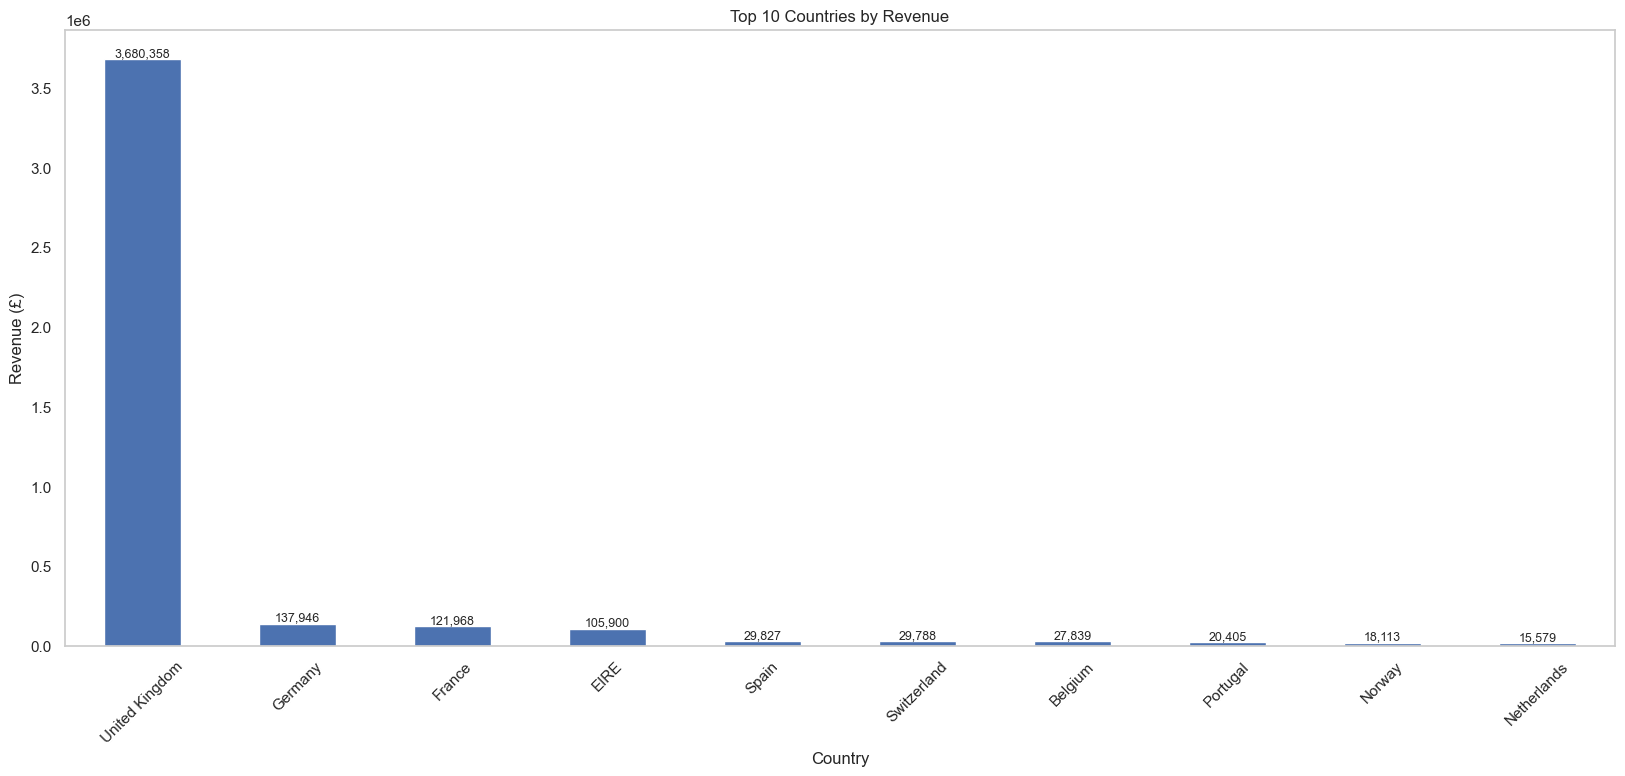

In [116]:
# ------------------------------
# Revenue by Country
# ------------------------------

country_revenue = (
    df_completed.groupby("Country")["OrderValue"].sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(20,8))
ax = country_revenue.head(10).plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue (£)")
plt.xticks(rotation=45)
plt.grid(False)

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # x-position (center of the bar)
        height,                        # y-position (top of bar)
        f"{height:,.0f}",              # formatted label
        ha="center", va="bottom", fontsize=9
    )

plt.show()

In [117]:
print("Revenue by region:")
print(region_revenue.sort_values(ascending=False))
print()

print("Top 10 countries by revenue:")
print(country_revenue.head(10))

Revenue by region:
Region
Western Europe    4212942.69
Northern Europe     50908.56
Asia-Pacific        20145.76
Middle East          6275.52
Americas             5651.79
Unknown              2159.50
Africa                734.36
Name: OrderValue, dtype: float64

Top 10 countries by revenue:
Country
United Kingdom   3680358.41
Germany           137946.33
France            121967.99
EIRE              105899.62
Spain              29826.96
Switzerland        29788.46
Belgium            27839.11
Portugal           20405.27
Norway             18112.76
Netherlands        15578.90
Name: OrderValue, dtype: float64


In [118]:
#Saving the files
region_revenue.to_csv("Results/Objective_4/region_revenue.csv")
print("✅ Revenue by Region successfully saved to 'Results/Objective_4/region_revenue.csv' file")

country_revenue.to_csv("Results/Objective_4/country_revenue.csv")
print("✅ Revenue by Country successfully saved to 'Results/Objective_4/country_revenue.csv' file")

✅ Revenue by Region successfully saved to 'Results/Objective_4/region_revenue.csv' file
✅ Revenue by Country successfully saved to 'Results/Objective_4/country_revenue.csv' file


**<h4>4. Revenue by Product (Description)</h4>**

In [120]:
product_revenue = df_completed.groupby(['StockCode','Description'])['OrderValue'].sum().sort_values(ascending=False).reset_index().rename(columns={'OrderValue':'TotalRevenue'})
product_revenue.head(20).to_csv('Results/Objective_4/top_products_by_revenue.csv', index=False)  #Saving the top 20 products by revenue

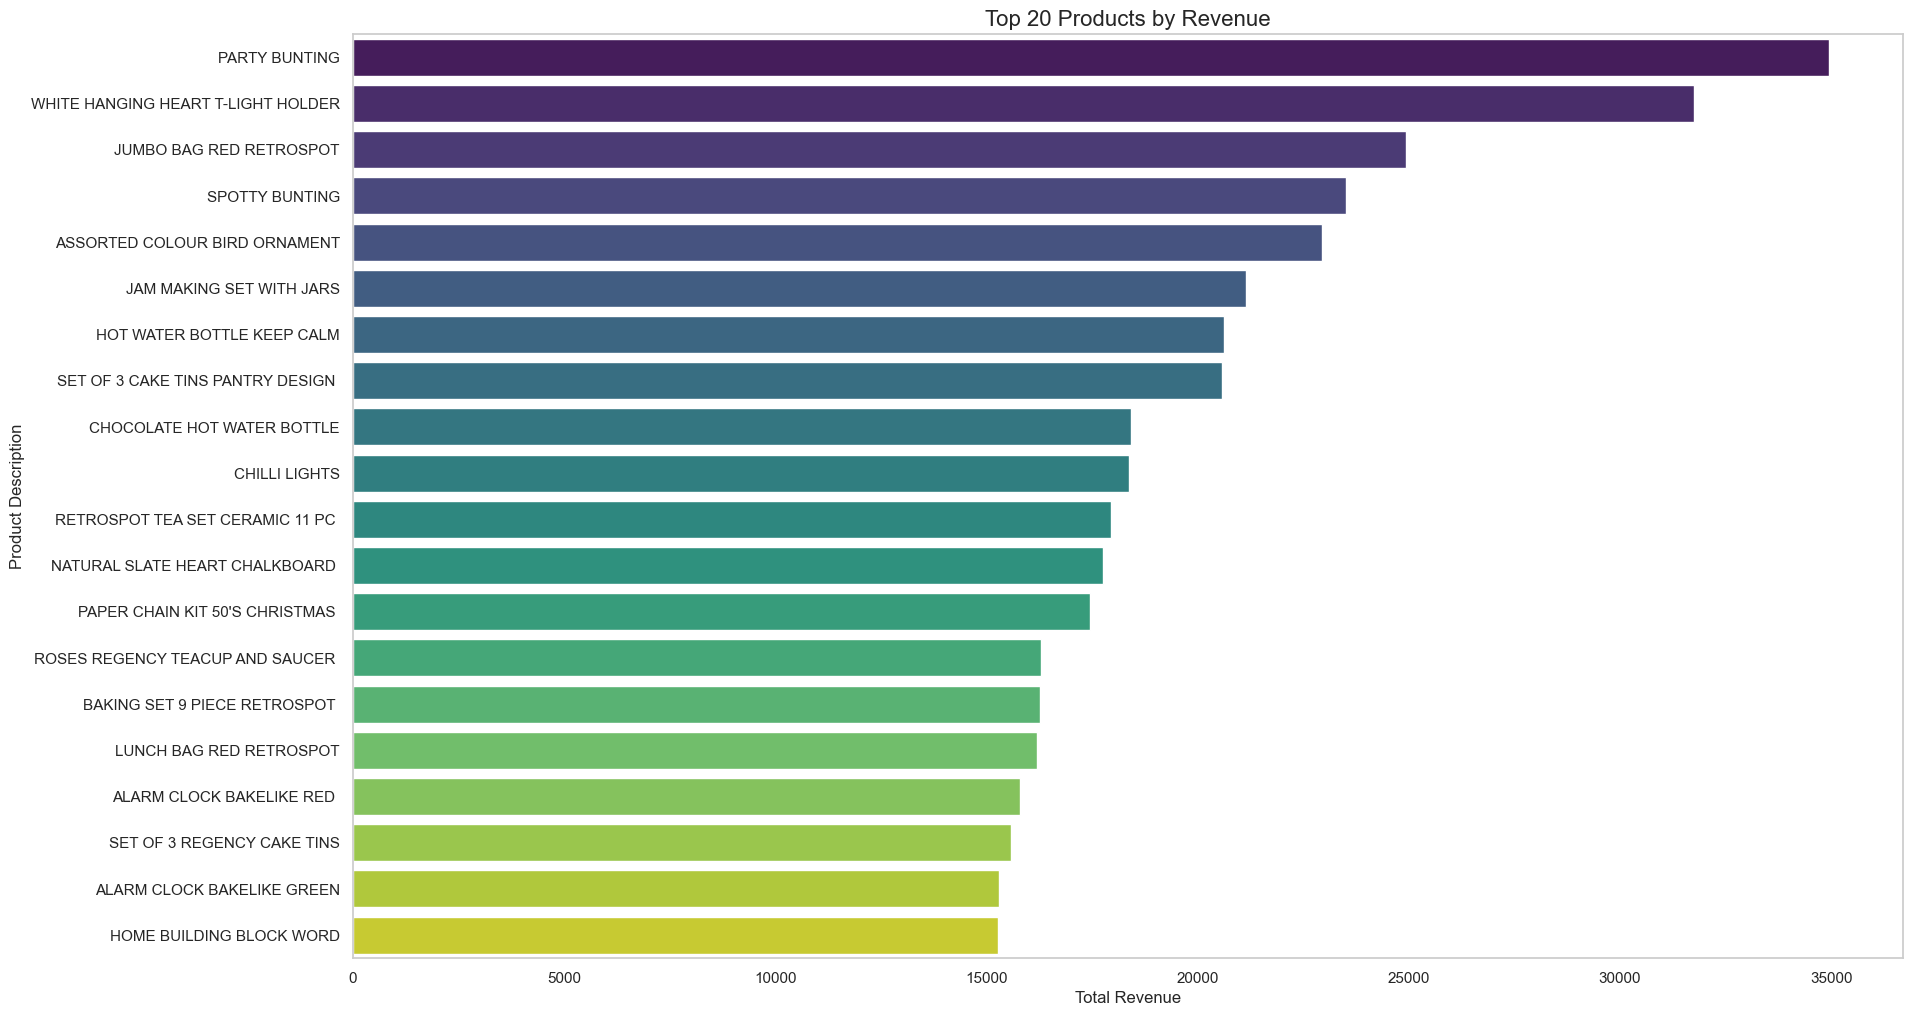

In [121]:
# Top 20 products by revenue
top_20_products = product_revenue.head(20)

# Horizontal bar chart for the top 20 products
plt.figure(figsize=(20, 12))
sns.barplot(
    data=top_20_products,
    x="TotalRevenue",
    y="Description",  # Use description for labels
    palette="viridis",
    hue="Description"
)
plt.title("Top 20 Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product Description", fontsize=12)
plt.grid(False)
plt.show()


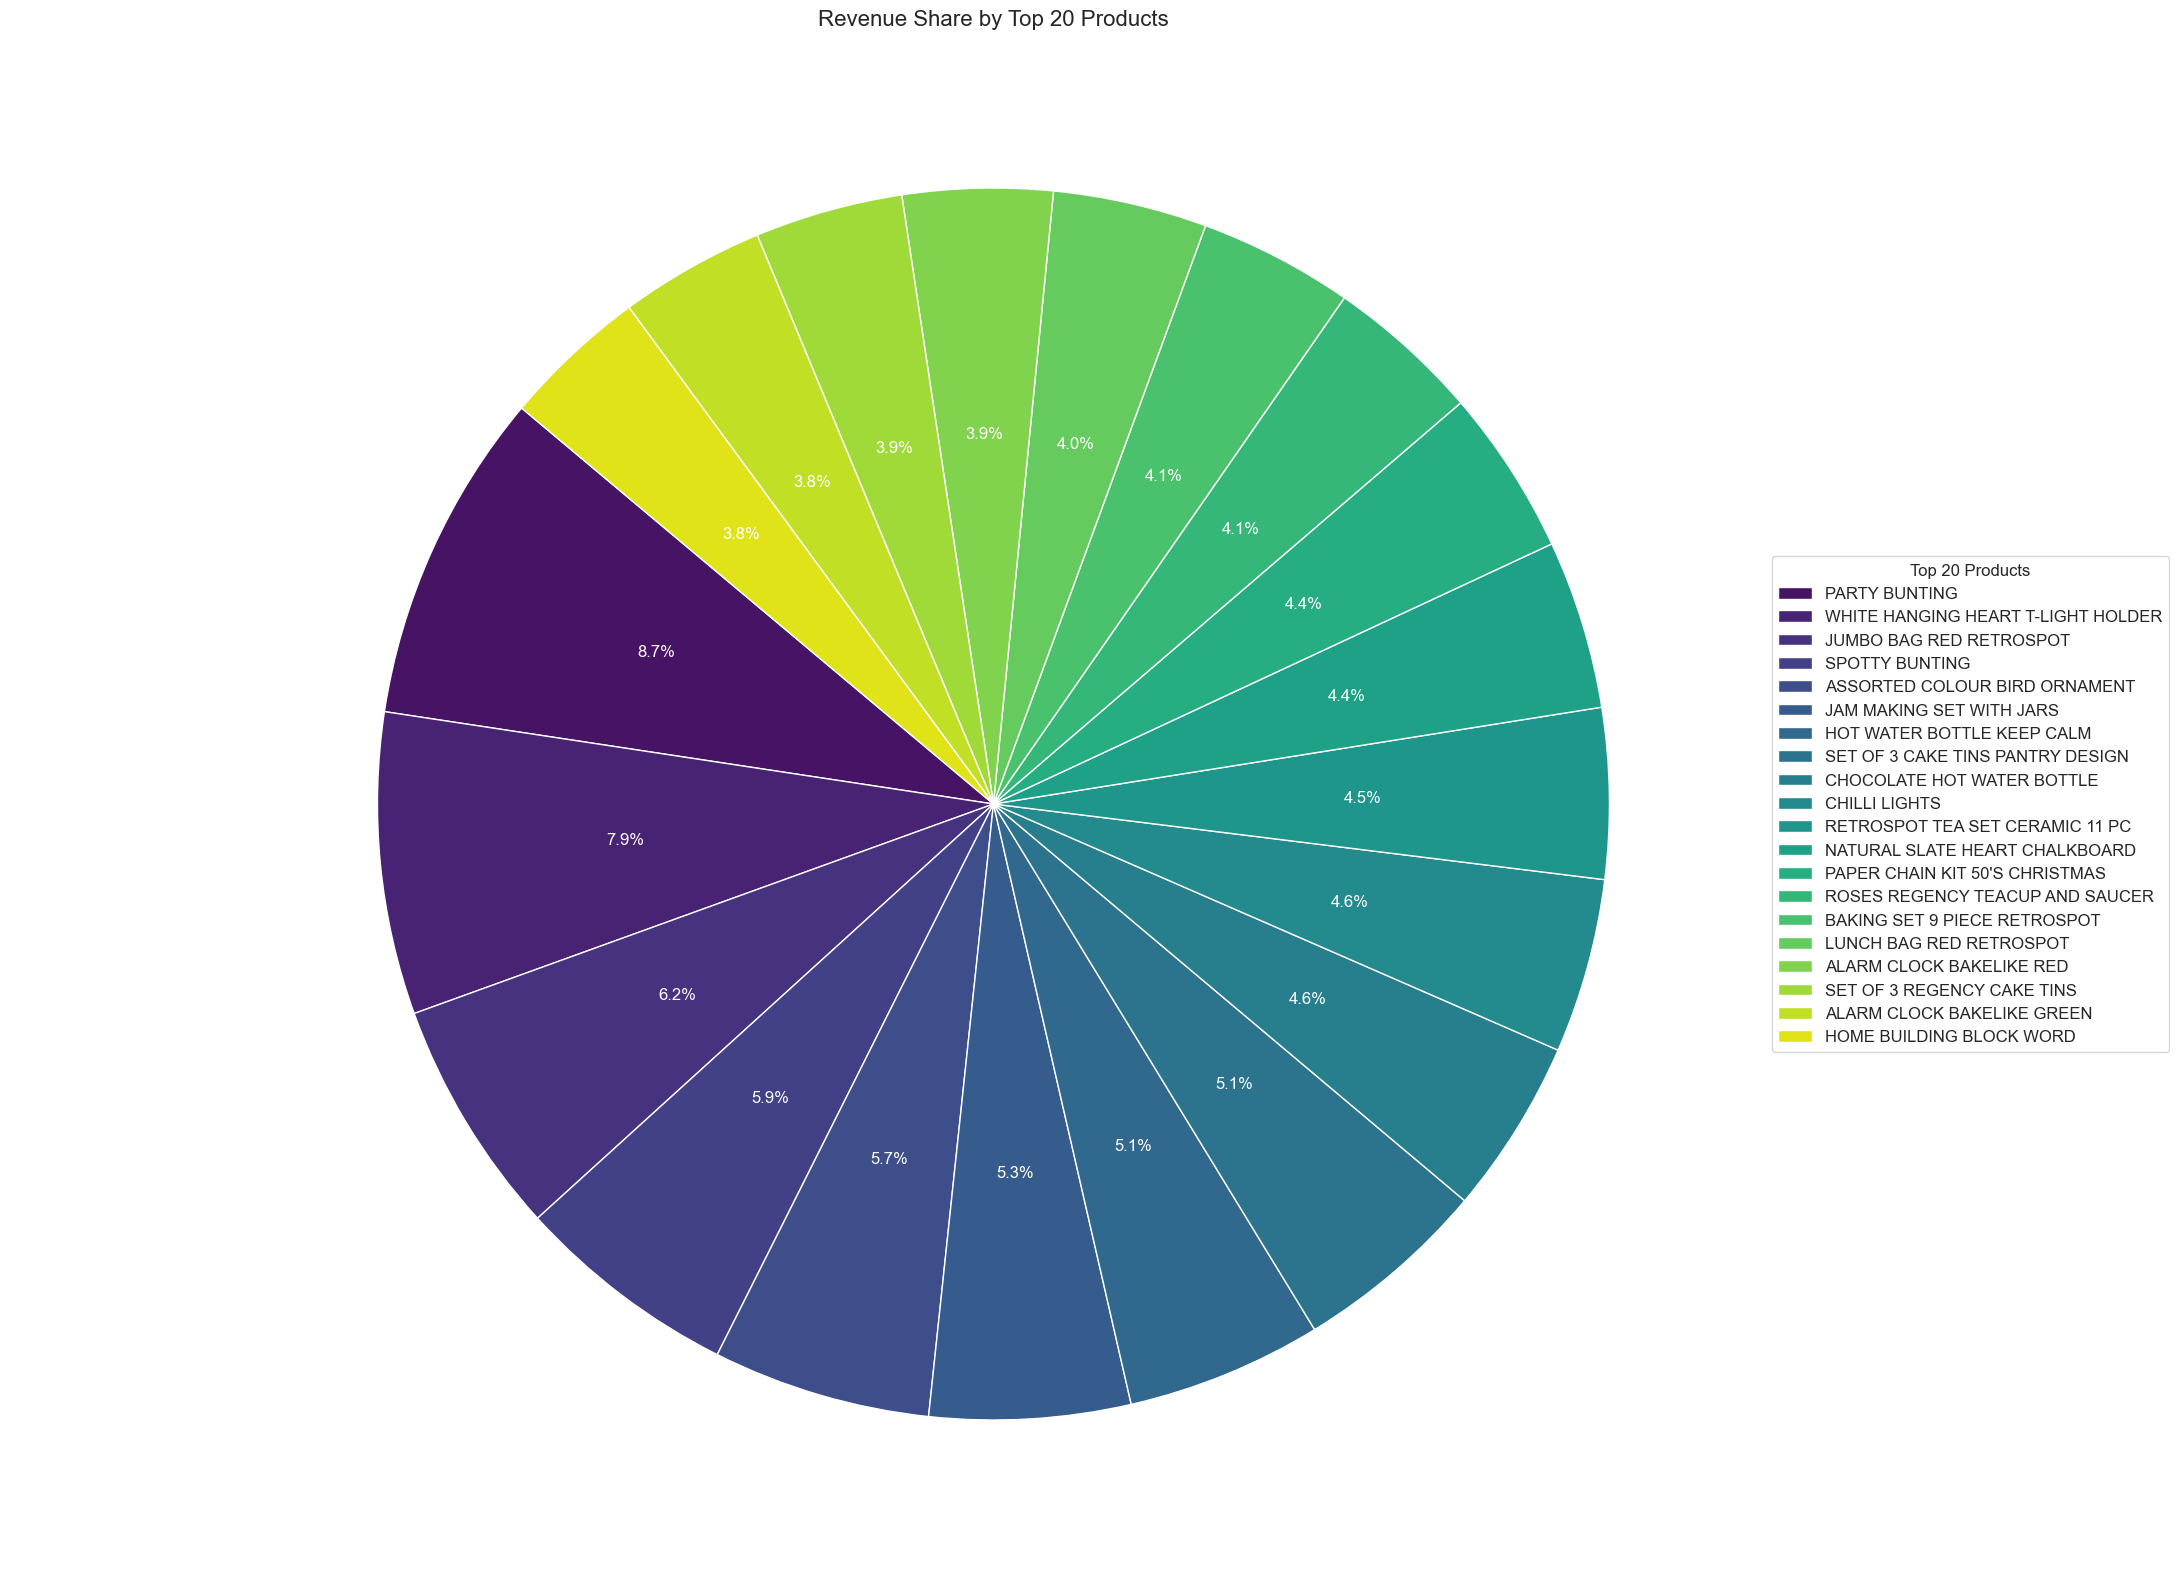

In [122]:
# Pie chart to visualize the revenue distribution of top 20 products
plt.figure(figsize=(20, 20))

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    top_20_products['TotalRevenue'],
    labels=top_20_products['Description'],
    autopct='%1.1f%%',
    colors=sns.color_palette("viridis", len(top_20_products)),
    startangle=140,
    textprops={'color': 'white'}  # Set percentage text color to white
)

plt.title("Revenue Share by Top 20 Products", fontsize=16)

# Add the legend
plt.legend(
    wedges, 
    top_20_products['Description'],  # Labels for the legend
    title="Top 20 Products",  # Legend title
    loc="center left",  # Location of the legend
    bbox_to_anchor=(1, 0, 0.5, 1),  # Place the legend outside the plot
    fontsize=12
)
plt.show()


In [123]:
# Treemap visualization for the top 20 products
fig = px.treemap(
    top_20_products,
    path=["Description"],
    values="TotalRevenue",
    color="TotalRevenue",
    color_continuous_scale="Blues",
    title="Revenue Share by Top 20 Products"
)

# Increasing the size of the treemap
fig.update_layout(
    width=1200,  # Increase the width (default is 600)
    height=800,  # Increase the height (default is 400)
)

fig.show()

**<h4>5. Pareto Analysis</h4>**

In [125]:
# ------------------------------------------------
# Pareto analysis: what % revenue from top X% customers / products
# ------------------------------------------------
# The key idea of this analysis is to show how revenue accumulates as we move through the top customers or products,
# highlighting the 80/20 rule (i.e., a small percentage of customers/products contribute to the majority of the revenue).

# Top customers cumulative
customer_revenue['cum_revenue'] = customer_revenue['TotalRevenue'].cumsum()
total_rev = customer_revenue['TotalRevenue'].sum()
customer_revenue['cum_pct'] = customer_revenue['cum_revenue'] / total_rev * 100

# find top 20% customers count
n_customers = customer_revenue.shape[0]
top20_n = max(1,int(np.ceil(0.2 * n_customers)))
top20_pct = customer_revenue.head(top20_n)['TotalRevenue'].sum() / total_rev * 100
print(f"Top 20% customers contribute {top20_pct:.2f}% of revenue")

Top 20% customers contribute 65.32% of revenue


C:\Users\Admin\python314_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



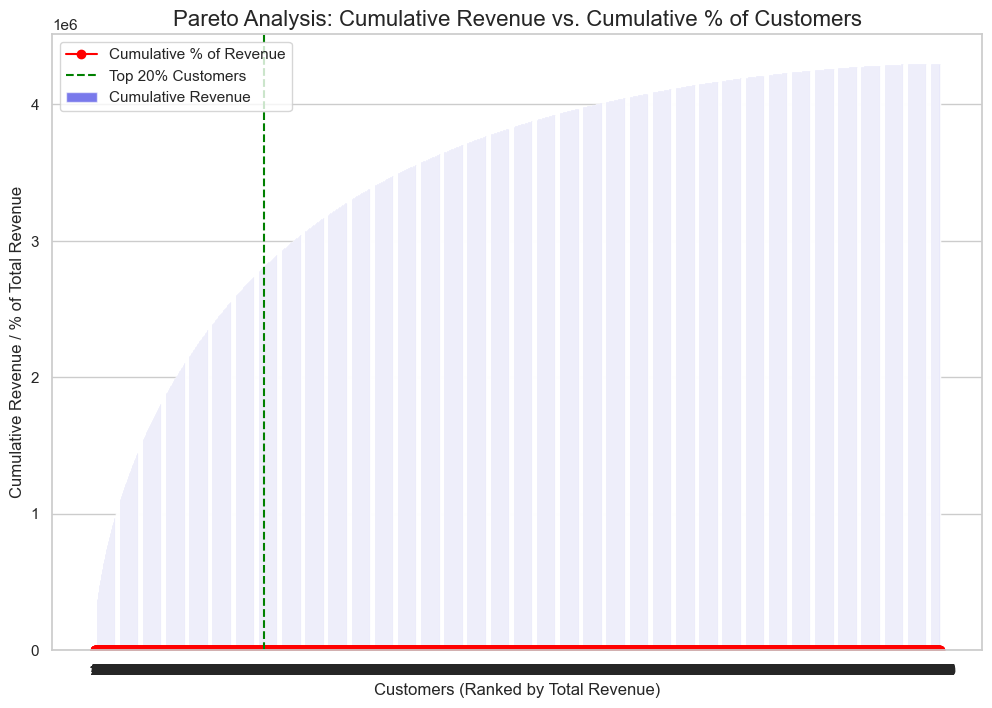

In [126]:
# Create the Pareto chart
plt.figure(figsize=(12, 8))

# Bar plot for cumulative revenue
sns.barplot(
    x=customer_revenue.index,
    y=customer_revenue['cum_revenue'],
    color='blue', alpha=0.6, label='Cumulative Revenue'
)

# Line plot for cumulative percentage
plt.plot(customer_revenue.index, customer_revenue['cum_pct'], color='red', marker='o', label='Cumulative % of Revenue')

# Add a vertical line at the top 20% customers
plt.axvline(x=top20_n, color='green', linestyle='--', label=f'Top 20% Customers')

# Title and labels
plt.title('Pareto Analysis: Cumulative Revenue vs. Cumulative % of Customers', fontsize=16)
plt.xlabel('Customers (Ranked by Total Revenue)', fontsize=12)
plt.ylabel('Cumulative Revenue / % of Total Revenue', fontsize=12)
plt.legend()

# Show the plot
plt.show()


**Explanation of the Pareto Chart above:**

> - The bar chart shows the cumulative revenue from the customers, which increases as we move to the right.
> - The line plot shows the cumulative percentage of total revenue.
> - The vertical dashed (green) line marks where the top 20% of customers fall.<br>

This visualizes how quickly the revenue accumulates from the top customers.

**<h4>6. RFM Heatmap (Correlation Matrix)</h4>**

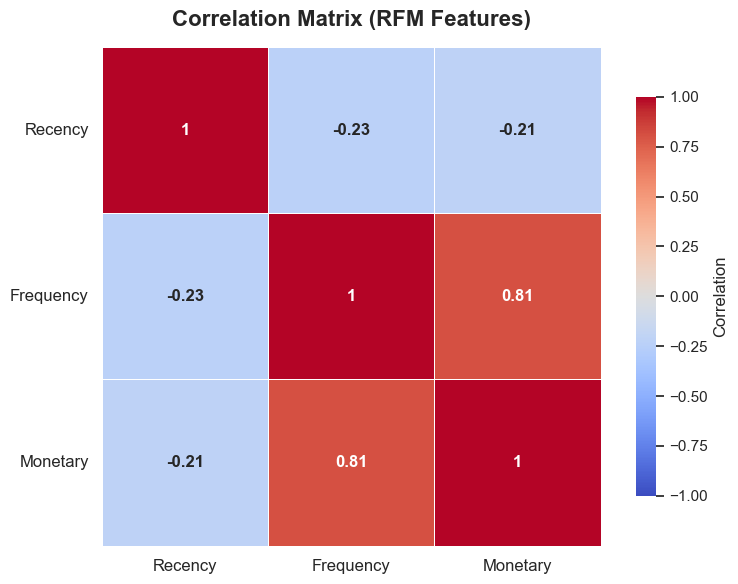

In [129]:
#This shows Recency, Frequency, Monetary Value

rfm = df_completed[["Recency", "Frequency", "Monetary"]]

plt.figure(figsize=(8, 6))

corr = rfm.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",          # diverging palette for correlations
    linewidths=0.5,
    linecolor="white",
    square=True,
    annot_kws={"size": 12, "weight": "bold"},
    vmin=-1, vmax=1,          # ensuring consistent correlation scale
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
)

plt.title("Correlation Matrix (RFM Features)", fontsize=16, weight="bold", pad=15)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

**<h3>Other Visualizations</h3>**

**<h4>1. Top 10 Products by Quantity Sold</h4>**

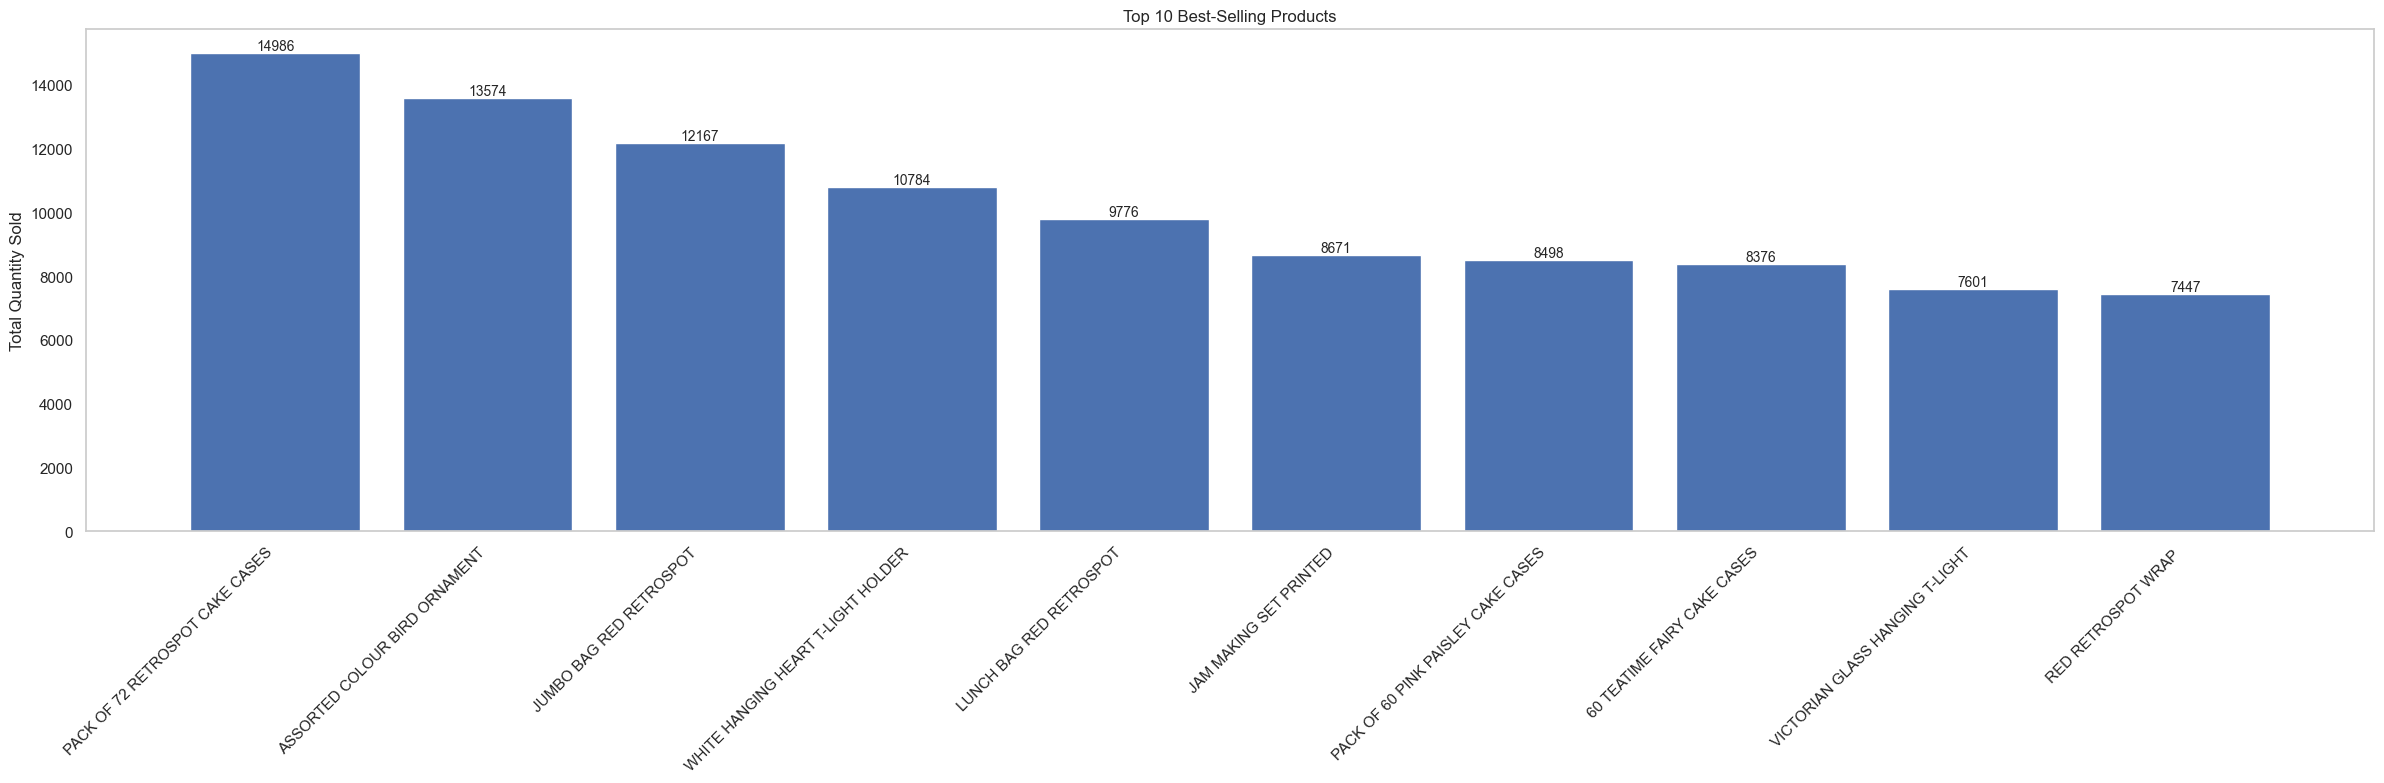

In [132]:
#Compute product-level sales
top_products = (
    df_completed.groupby("Description")["Quantity"].sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(24, 8))
bars = plt.bar(top_products.index, top_products.values)
ax = plt.gca()  # Get current axis

plt.title("Top 10 Best-Selling Products")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.grid(False)

# Adding labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # X position
        height + 1,                          # Y position just above the bar
        f'{int(height)}',                    # Show integer quantity
        ha="center", va="bottom", fontsize=10
    )

plt.tight_layout()
plt.show()

**<h4>2. Top 10 Products by Invoice Cancelled</h4>**

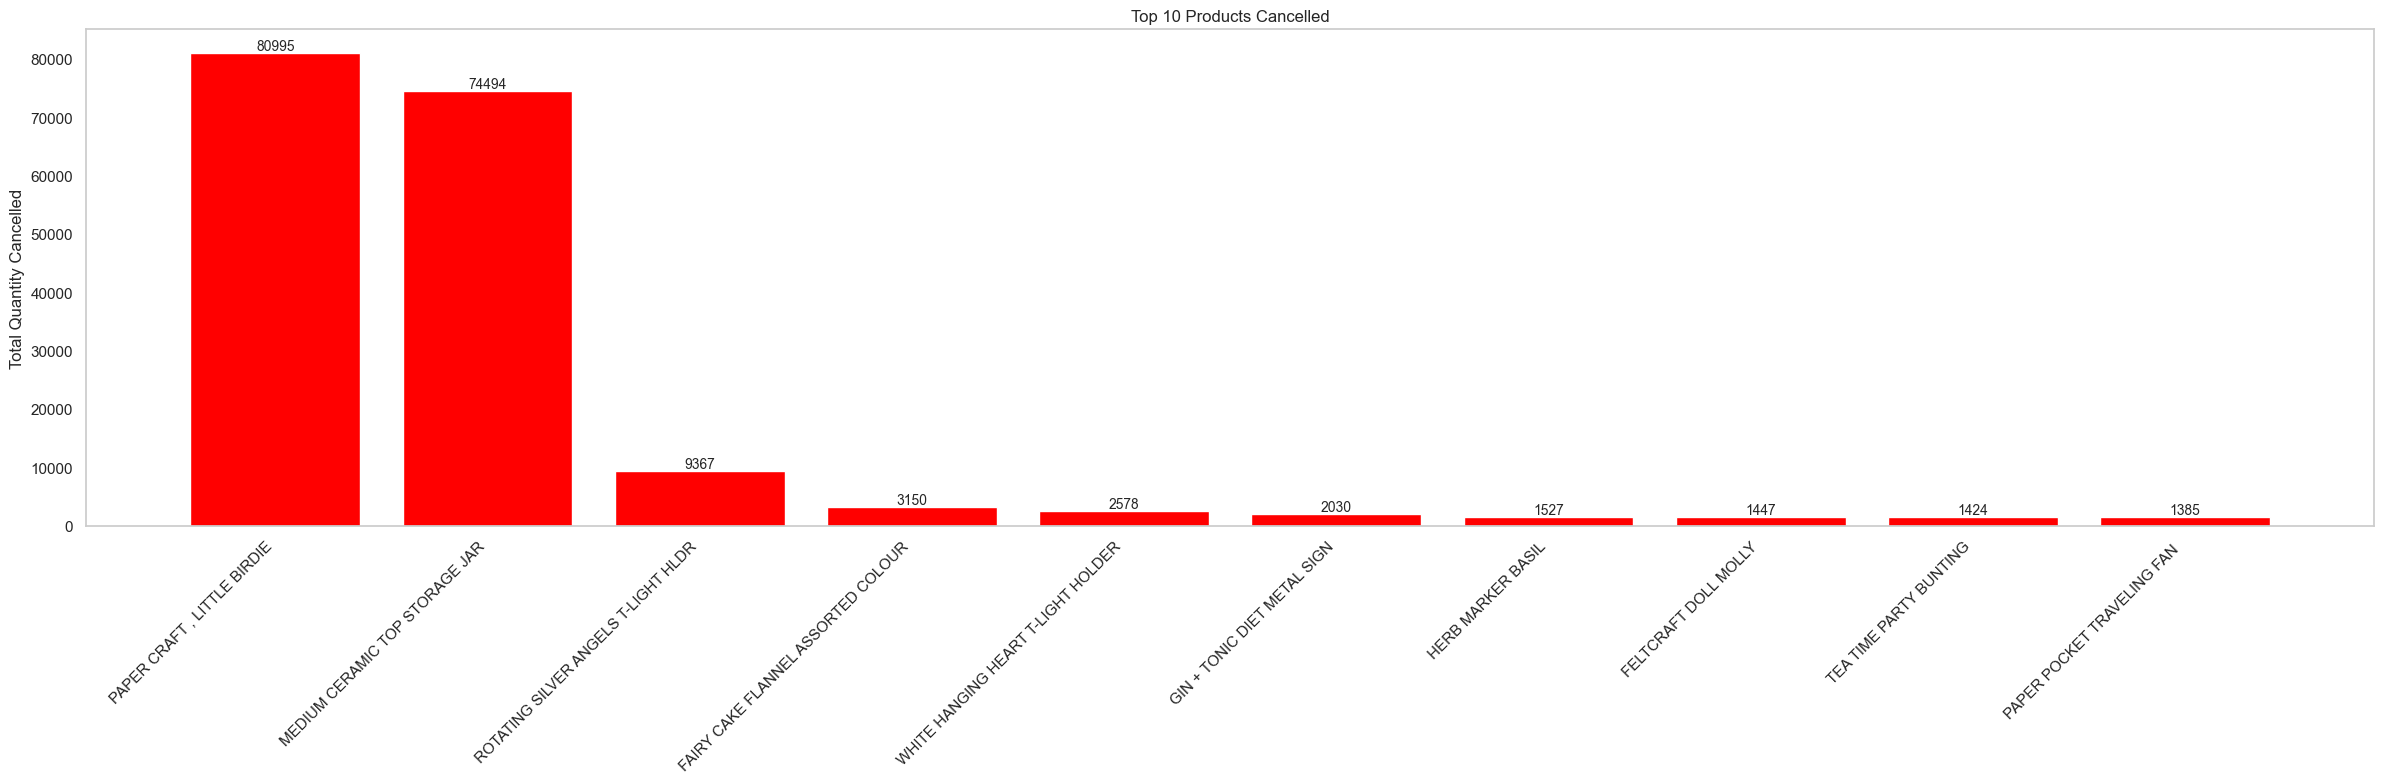

In [134]:
#Compute product-level returned items (absolute values)
top_products_returned = (
    df_cancelled.assign(ReturnedQty = df_cancelled["Quantity"].abs())
    .groupby("Description")["ReturnedQty"].sum()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(24, 8))
bars = plt.bar(top_products_returned.index, top_products_returned.values, color="red")
ax = plt.gca()  # Get current axis

plt.title("Top 10 Products Cancelled")
plt.ylabel("Total Quantity Cancelled")
plt.xticks(rotation=45, ha='right')
plt.grid(False)

# Adding labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # X position
        height + 1,                          # Y position just above the bar
        f'{int(height)}',                    # Show integer quantity
        ha="center", va="bottom", fontsize=10
    )

plt.tight_layout()
plt.show()

**<h4>3. Top 10 Products by Percentage Cancelled</h4>**

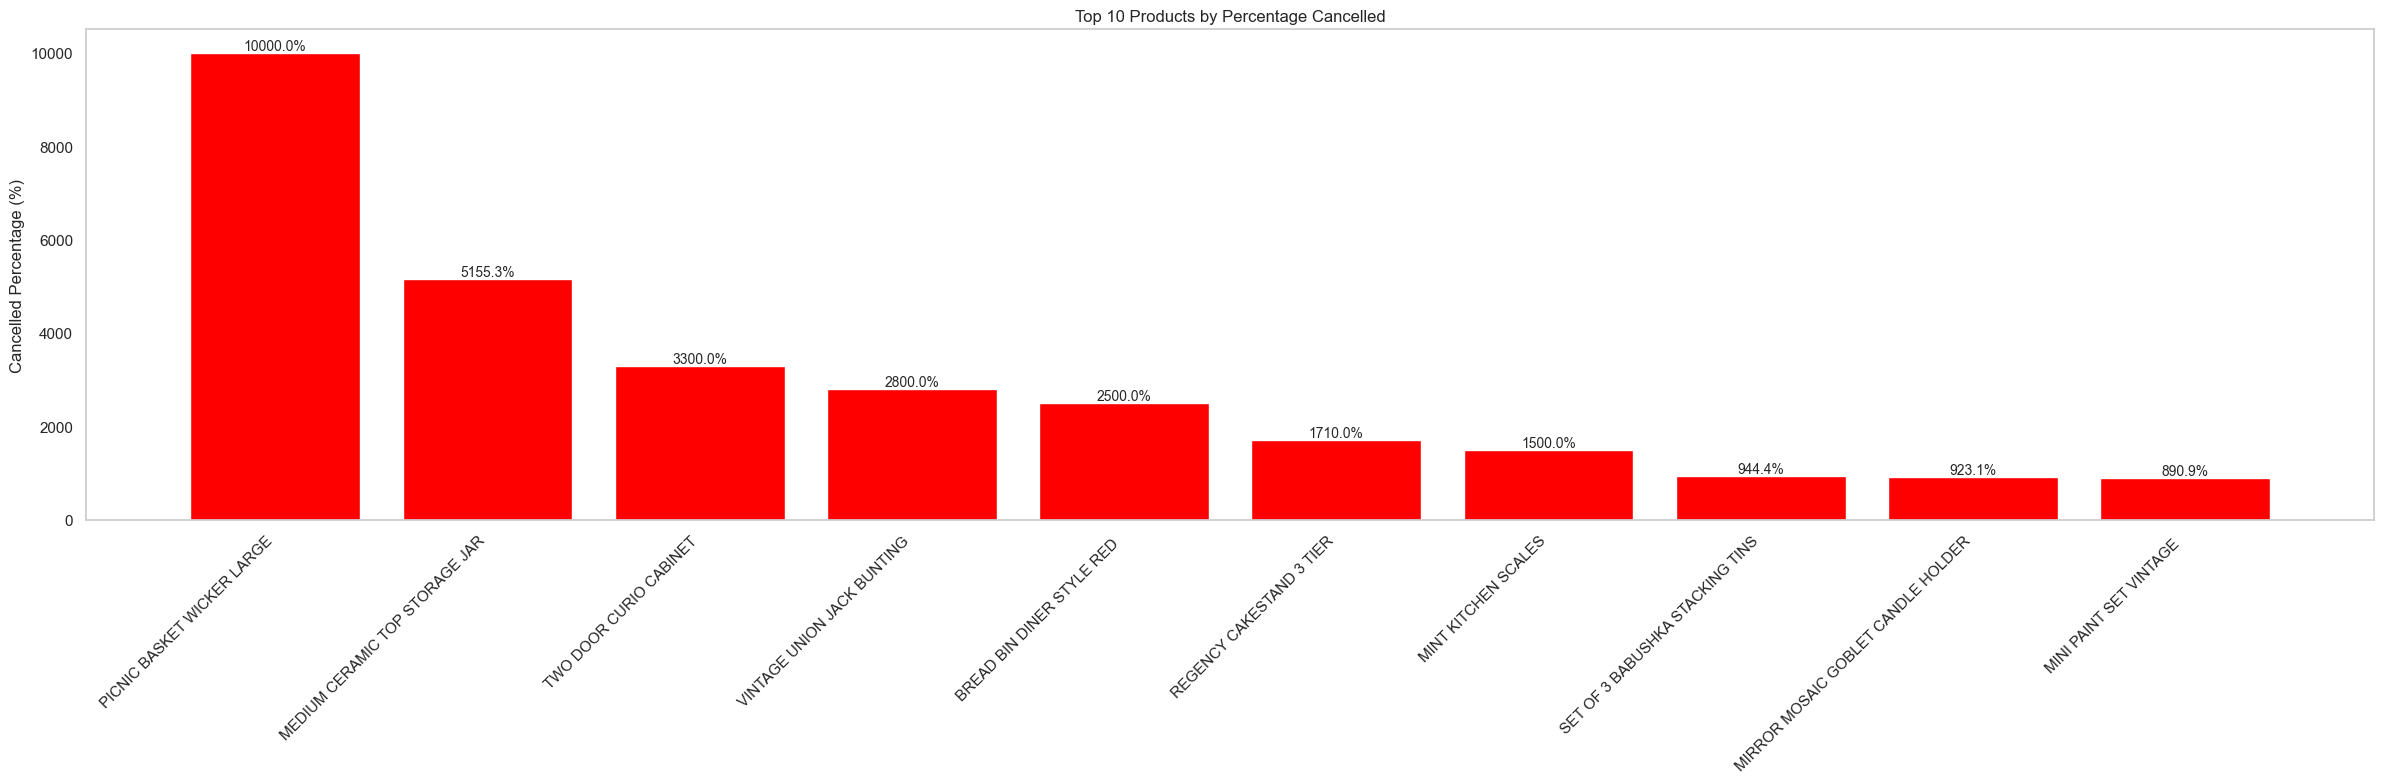

In [136]:
#First, we compute total quantity sold for each product
sold_qty = df_completed.groupby("Description")["Quantity"].sum()

#Then, we compute total returned quantity for each product
returned_qty = df_cancelled.groupby("Description")["Quantity"].sum().abs()

#Next, we combine the two quantities to get a product_stats DataFrame
product_stats = pd.DataFrame({
    "Sold": sold_qty,
    "Returned": returned_qty
}).fillna(0)

product_stats = product_stats[product_stats["Sold"] > 0]  #Eliminating records of '0' products sold to avoid ZeroDivisionError later

#Compute cancellation percentage
product_stats["Cancel_Percentage"] = (
    product_stats["Returned"]/product_stats["Sold"]
) * 100

#Get top 10
top10_cancelled_pct = product_stats.sort_values(by="Cancel_Percentage", ascending=False).head(10)

#Plotting
plt.figure(figsize=(24, 8))
bars = plt.bar(top10_cancelled_pct.index, top10_cancelled_pct["Cancel_Percentage"], color="red")
ax = plt.gca()

plt.title("Top 10 Products by Percentage Cancelled")
plt.ylabel("Cancelled Percentage (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(False)

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()

**<h4>4. Customer Frequency Distribution</h4>**

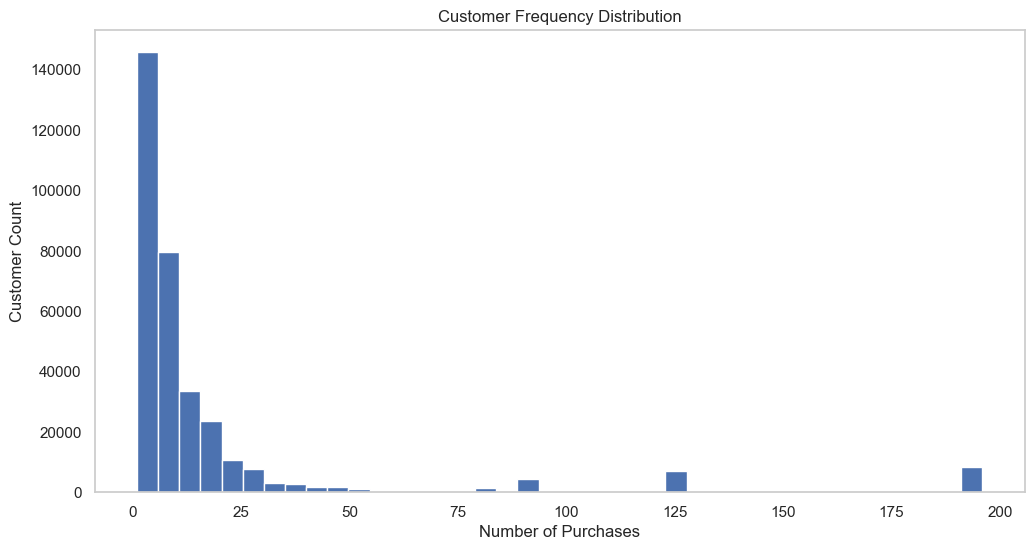

In [138]:
#This supports segmentation: Identifies heavy vs light shoppers

plt.figure(figsize=(12, 6))
plt.hist(df_completed["Frequency"], bins=40)
plt.title("Customer Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Customer Count")
plt.grid(False)
plt.show()

In [139]:
#Saving the completed and cancelled transactions to file
df_completed.to_csv("Results/completed_transactions.csv", index=False)
print("✅ Completed transactions have been successfully saved to 'Results/completed_transactions.csv' file")

df_cancelled.to_csv("Results/cancelled_transactions.csv", index=False)
print("✅ Cancelled transactions have been successfully saved to 'Results/cancelled_transactions.csv' file")

✅ Completed transactions have been successfully saved to 'Results/completed_transactions.csv' file
✅ Cancelled transactions have been successfully saved to 'Results/cancelled_transactions.csv' file


In [140]:
# -----------------------------
# DATASET READY FOR MODELLING
# -----------------------------
print("Data Preparation Complete — Clean, Enriched & Ready for Modelling!")

Data Preparation Complete — Clean, Enriched & Ready for Modelling!


**<h2>CRISP DM Phase 4: Modeling </h2>**

This phase includes the following: -
> - RFM Usage
> - K-Means Clustering
> - Segment Labeling (Champions, Loyal, At Risk, Hibernating).
> - Visualizations of Customer Segments
> - Additional Predictive Model: RFM-Based Classification using XGBoost

In [143]:
plt.style.use("default")
sns.set_palette("viridis")

In [144]:
# -----------------------------
# Select RFM Features for Modeling
# -----------------------------
# We would make use of the RFM Features we created in the Data Preparation phase
rfm = df_completed[["CustomerID", "Recency", "Frequency", "Monetary"]].copy()
rfm = rfm.drop_duplicates()

#Resetting the index for convenience
rfm.reset_index(inplace=True, drop=True)

num_unique_customers = len(rfm)

#Confirming that the number of unique customers computed is correct
assert num_unique_customers == df_completed["CustomerID"].nunique()

print(f"Number of unique customers: {num_unique_customers}\n")

#Displaying the first few rows of rfm
display(rfm.head())

Number of unique customers: 4191



CustomerID  Recency  Frequency  Monetary
0      17850      371         34   4462.16
1      13047       56          9   2641.31
2      12583        2         15   5267.89
3      14688        7         20   3705.92
4      17809       15          4    729.45

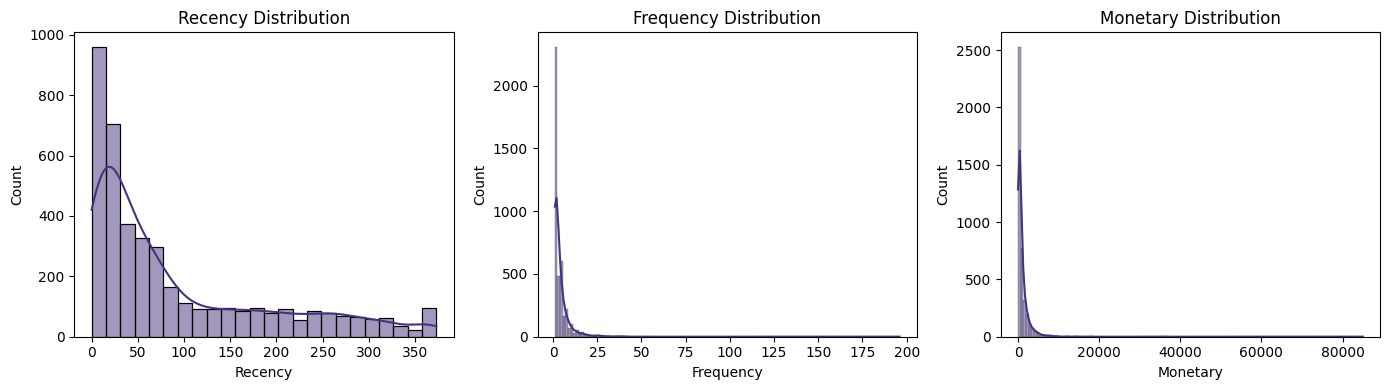

In [145]:
#Visualize Feature Distributions
# --------------------------------------------------------
# Plot histograms for the RFM features
# --------------------------------------------------------
plt.figure(figsize=(14, 4))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col], kde=True)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()


In [146]:
# -----------------------------
# Standardizing the RFM features (Log Transformation + RobustScaler)
# -----------------------------
# Step 1: Log Transformation of the RFM features
rfm['Recency_log']    = np.log1p(rfm['Recency'])
rfm['Frequency_log']  = np.log1p(rfm['Frequency'])
rfm['Monetary_log']   = np.log1p(rfm['Monetary'])

# Step 2: Scaling the log Transformed Features using RobustScaler
scaler = RobustScaler()
log_features = ['Recency_log', 'Frequency_log', 'Monetary_log']
rfm_scaled = scaler.fit_transform(rfm[log_features])

#Creating an RFM scaled DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=log_features)
rfm_scaled_df.head()

Recency_log  Frequency_log  Monetary_log
0         0.96           2.68          1.33
1         0.05           1.31          1.02
2        -1.36           1.83          1.43
3        -0.89           2.12          1.22
4        -0.56           0.56          0.26

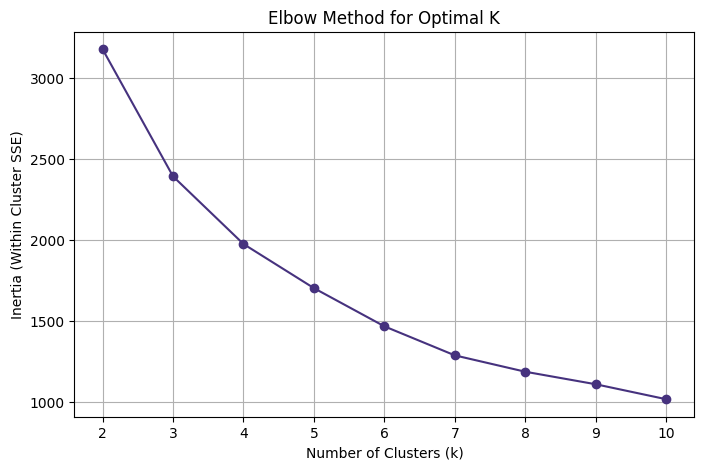

In [147]:
# -----------------------------
# Model 1 - KMeans Clustering
# -----------------------------
#Objective: To find natural customer segments using RFM features

#First, we would determine the optimal number of clusters using the ELbow Method
inertia_values = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within Cluster SSE)")
plt.grid(True)
plt.show()

## 📌 Optimal Number of Clusters (Elbow Method Summary)

Based on the shape of the Elbow Plot, the **optimal value of K is 4**, with **K = 5** being a reasonable secondary option.

---

### 🔍 Reasoning

In the elbow method, we look for the point where adding more clusters no longer yields large reductions in **inertia (SSE)**. The pattern observed:

- **k = 2 → 3:** Large drop  
- **k = 3 → 4:** Noticeable and meaningful drop  
- **k = 4 → 5:** Smaller but still relevant improvement  
- **k = 5 → 6 → 10:** The curve begins to flatten (diminishing returns)

---

### 🦾 Key Elbow Points

1. **First Elbow - k = 3**  
   A strong bend, but **3 clusters are often too broad** for customer segmentation.

2. **Second (Stronger) Elbow - k = 4**  
   Best structural change: good reduction in SSE, and the curve smooths significantly afterward.

3. **k = 5 (Acceptable but weaker)**  
   Some improvement remains, but the drop from 4 → 5 is noticeably smaller.

---

## ✅ Recommended Value: **K = 4**

**Why K = 4 is optimal:**
- Excellent balance between **granularity** and **interpretability**  
- Well-aligned with **RFM-based customer segmentation practices**  
- Produces business-ready clusters  
- Fits common segment groupings (e.g., Champions, Loyal, At-Risk, Hibernating), with the ability to merge if needed

---

**Conclusion:** We chose **4 clusters** for the most stable and interpretable customer segmentation.

In [149]:
# -----------------------------
# K-MEANS (K=4)
# -----------------------------
K = 4 # creating the clusters using the best_k number of clusters
kmeans = KMeans(n_clusters=K, random_state=42)
labels = kmeans.fit_predict(rfm_scaled_df)

# Attach cluster labels to rfm
rfm['Cluster'] = labels

# Attaching cluster label to df_completed for downstream analysis
# (we merge on CustomerID; preserve existing df_completed)
df_completed = df_completed.merge(rfm[['CustomerID','Cluster']], on='CustomerID', how='left')

# Visualize first few rows
display(rfm.head())

CustomerID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
0      17850      371         34   4462.16         5.92           3.56   
1      13047       56          9   2641.31         4.04           2.30   
2      12583        2         15   5267.89         1.10           2.77   
3      14688        7         20   3705.92         2.08           3.04   
4      17809       15          4    729.45         2.77           1.61   

   Monetary_log  Cluster  
0          8.40        0  
1          7.88        3  
2          8.57        0  
3          8.22        0  
4          6.59        3

In [150]:
# -----------------------------
# Cluster Profiling (Descriptive Analytics)
# -----------------------------

cluster_profile = rfm.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "NumCustomers"})

cluster_profile


Recency  Frequency  Monetary  NumCustomers
Cluster                                            
0          10.64      12.65   3466.37           675
1          22.13       1.82    326.27           822
2         190.47       1.29    226.08          1466
3          64.35       3.98   1107.00          1228

**<h4>Visualizing Cluster Profiles</h4>**

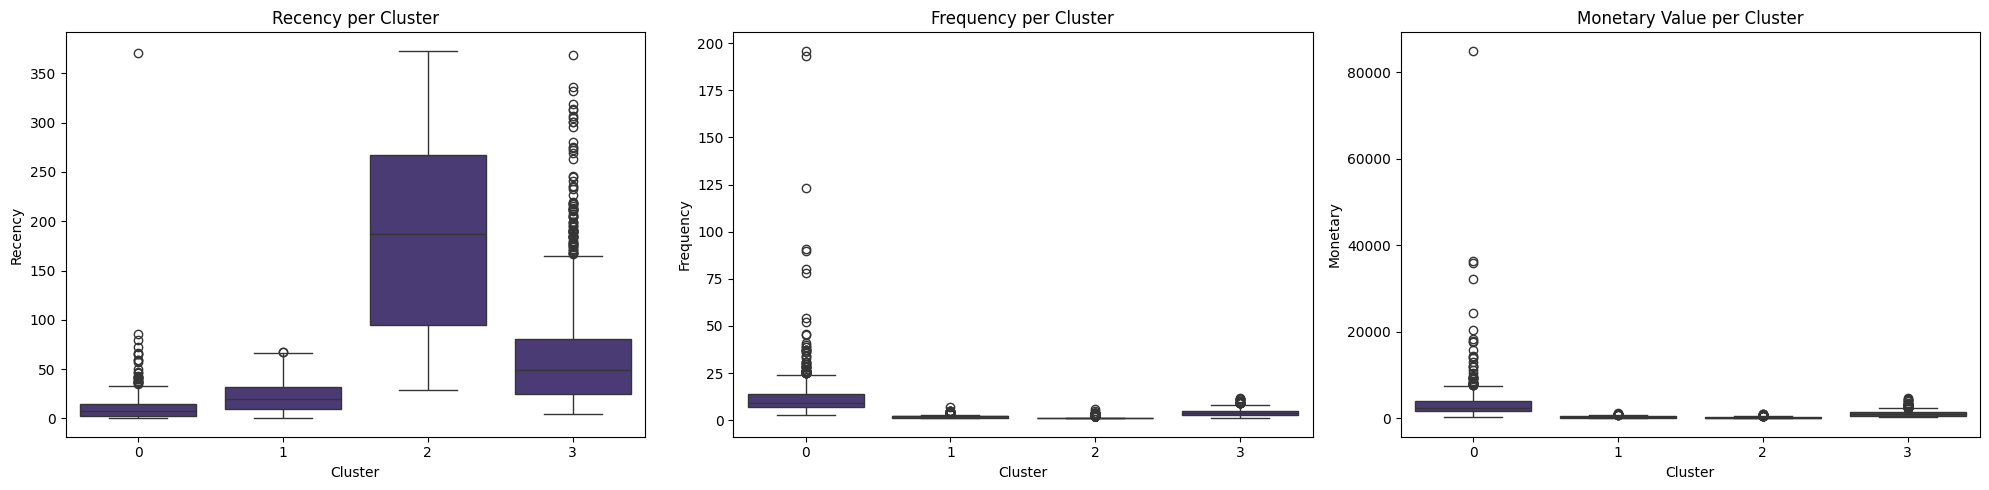

In [152]:
# -----------------------------
# RFM Distribution per Cluster
# -----------------------------

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(data=rfm, x='Cluster', y='Recency', ax=ax[0])
ax[0].set_title("Recency per Cluster")

sns.boxplot(data=rfm, x='Cluster', y='Frequency', ax=ax[1])
ax[1].set_title("Frequency per Cluster")

sns.boxplot(data=rfm, x='Cluster', y='Monetary', ax=ax[2])
ax[2].set_title("Monetary Value per Cluster")

plt.tight_layout()
plt.show()


## 🏷️ Customer Segments (Business Mapping)

Cluster labels are assigned using a **robust multi-metric RFM ranking approach**, ensuring each group is mapped objectively based on combined Recency, Frequency, and Monetary patterns.

### 📊 Segment Definitions

| Segment Name      | RFM Characteristics | Description |
|-------------------|---------------------|-------------|
| **Champions**     | Low Recency, High Frequency, High Monetary | Most valuable and engaged customers; buy often and spend the most |
| **Loyal Customers** | High Frequency (excluding Champions), stable Monetary | Regular, dependable buyers who contribute steady revenue |
| **At Risk**       | High Recency, declining Frequency & Monetary | Customers whose activity has dropped and may be slipping away |
| **Hibernating**   | Very High Recency, Low Frequency, Low Monetary | Inactive customers with minimal purchases and long dormancy |

---

### 🔄 Mapping Approach

Clusters are assigned to segments using a **rank-based scoring system**:

- **Champions** are identified as the cluster with  
  high Monetary **+** high Frequency **+** low Recency  
  (best overall RFM profile).

- **Hibernating** customers are detected as the cluster with  
  low Monetary **+** low Frequency **+** high Recency  
  (weakest RFM profile).

- **Loyal Customers** are the highest-frequency group *excluding Champions*.

- **At Risk** is assigned to the remaining cluster, representing customers with weakening RFM signals.

This method ensures **stable, consistent, and business-meaningful cluster labeling** that reflects true customer behavior rather than relying on any single metric.


In [154]:
#Compute ranking logic
cluster_stats = rfm.groupby("Cluster")[['Recency','Frequency','Monetary']].mean()
cluster_stats.index = cluster_stats.index.astype(int)

segment_map = {}

# 1. Champions → high Monetary, high Frequency, low Recency
champions = (
    cluster_stats['Monetary'].rank(ascending=False) +
    cluster_stats['Frequency'].rank(ascending=False) +
    cluster_stats['Recency'].rank(ascending=True)
).idxmin()
segment_map[int(champions)] = "Champions"

# 2. Hibernating → low Monetary, low Frequency, high Recency
hibernating = (
    cluster_stats['Monetary'].rank(ascending=True) +
    cluster_stats['Frequency'].rank(ascending=True) +
    cluster_stats['Recency'].rank(ascending=False)
).idxmin()
segment_map[int(hibernating)] = "Hibernating"

# 3. Loyal Customers → high Frequency (excluding Champions)
freq_sorted = cluster_stats['Frequency'].sort_values(ascending=False)
for c in freq_sorted.index:
    if c not in segment_map:
        segment_map[int(c)] = "Loyal Customers"
        break

# 4. Remaining cluster → At Risk
remaining = [c for c in cluster_stats.index if c not in segment_map]
segment_map[int(remaining[0])] = "At Risk"

segment_map

{0: 'Champions', 2: 'Hibernating', 3: 'Loyal Customers', 1: 'At Risk'}

In [155]:
#Attaching Segment names
rfm['Segment'] = rfm['Cluster'].map(segment_map)
df_completed['Segment'] = df_completed['Cluster'].map(segment_map)

rfm[['CustomerID', 'Cluster', 'Segment']].head()

CustomerID  Cluster          Segment
0      17850        0        Champions
1      13047        3  Loyal Customers
2      12583        0        Champions
3      14688        0        Champions
4      17809        3  Loyal Customers

**<h4>Visualizations of the Customer Segments</h4>**

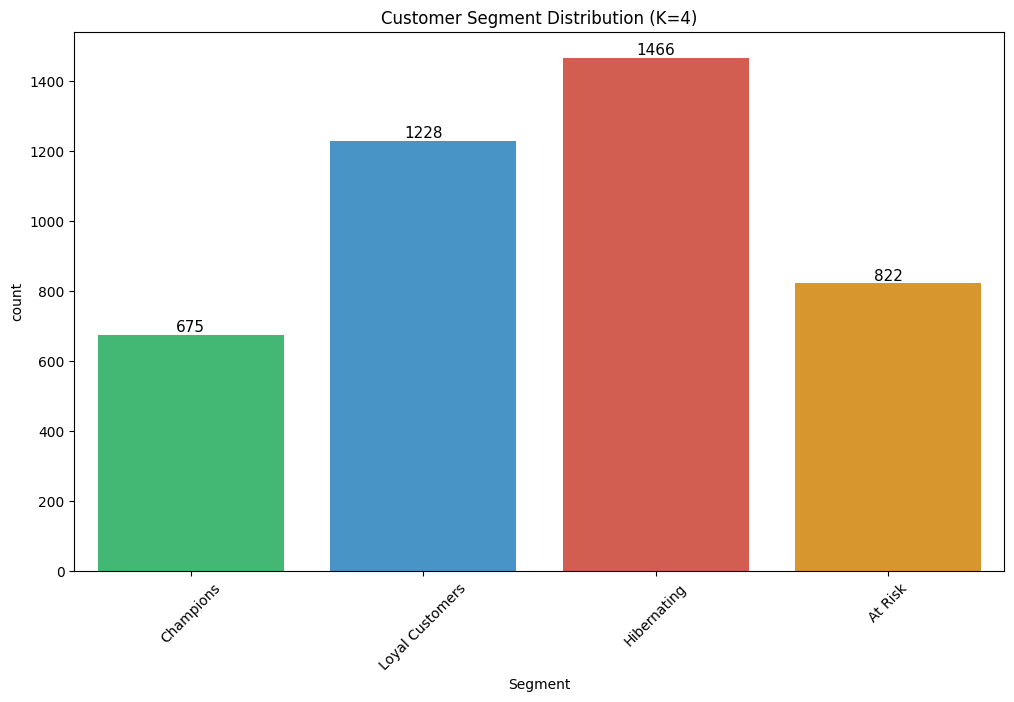

In [157]:
# -----------------------------
# 1. Visualize Segment Distribution
# -----------------------------

custom_colors = [
    "#2ecc71",    # green  (Champions)
    "#3498db",   # blue   (Loyal Customers)
    "#e74c3c",    # red    (Hibernating)
    "#f39c12"    # amber  (At Risk)   
]

plt.figure(figsize=(12,7))
ax = sns.countplot(
    data=rfm, 
    x='Segment', 
    palette=custom_colors,  
    hue='Segment', 
    legend=False
)

plt.title(f"Customer Segment Distribution (K={K})")
plt.xticks(rotation=45)

# Add labels
for p in ax.patches:
    height = round(p.get_height())
    ax.annotate(
        f"{height}", 
        (p.get_x() + p.get_width() / 2, height),
        ha="center", va="bottom", fontsize=11
    )

plt.show()

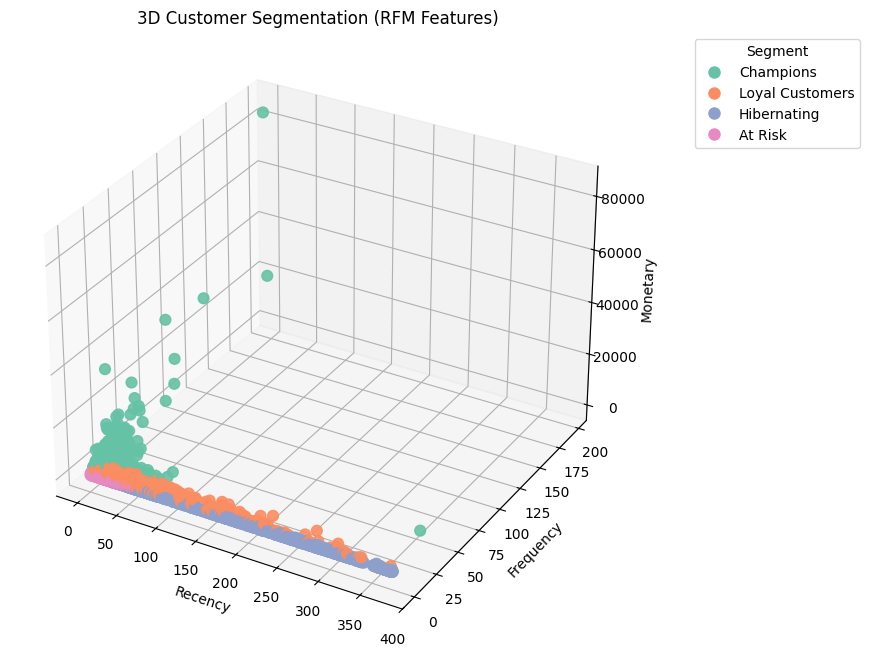

In [158]:
# -----------------------------
# 2. Visualize 3D Customer Segmentation
# -----------------------------

# Prepare colors for segments
unique_segments = rfm['Segment'].unique()
palette = sns.color_palette("Set2", len(unique_segments))
color_map = dict(zip(unique_segments, palette))

# Map segment names to colors
colors = rfm['Segment'].map(color_map)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=colors,
    s=60,
    alpha=0.9
)

ax.set_title("3D Customer Segmentation (RFM Features)")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

# ➤ Creating custom legend using segment names
legend_elements = [
    plt.Line2D(
        [0], [0],
        marker='o',
        color='w',
        label=seg,
        markerfacecolor=color_map[seg],
        markersize=10
    )
    for seg in unique_segments
]

ax.legend(
    handles=legend_elements,
    title="Segment",
    bbox_to_anchor=(1.1, 1),
    loc='upper left'
)

plt.show()


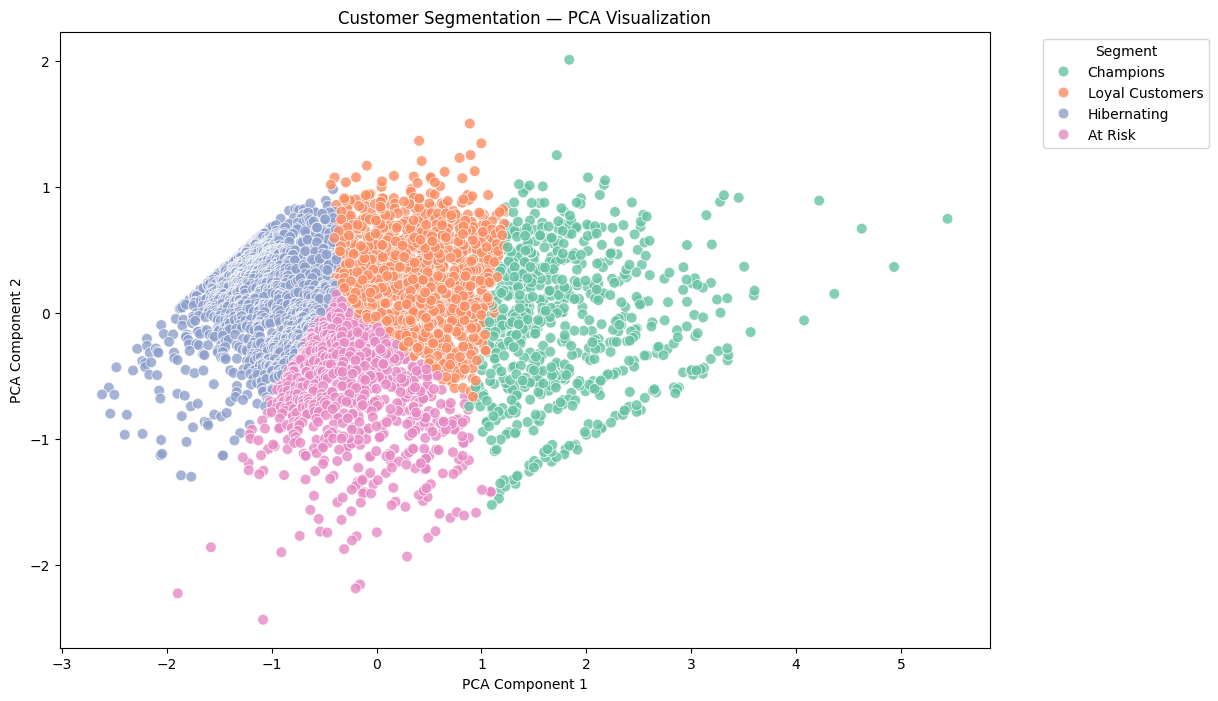

In [159]:
# -----------------------------
# 3. Visualizing the Customer Segments using PCA + Scatter Plot
# -----------------------------

# Reduce scaled RFM to 2 dimensions for visualization
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled_df)

# Add PCA dimensions back into RFM
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=rfm,
    x='PCA1', y='PCA2',
    hue='Segment',          # or 'Cluster'
    palette='Set2',
    s=60,
    alpha=0.8
)

plt.title("Customer Segmentation — PCA Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()


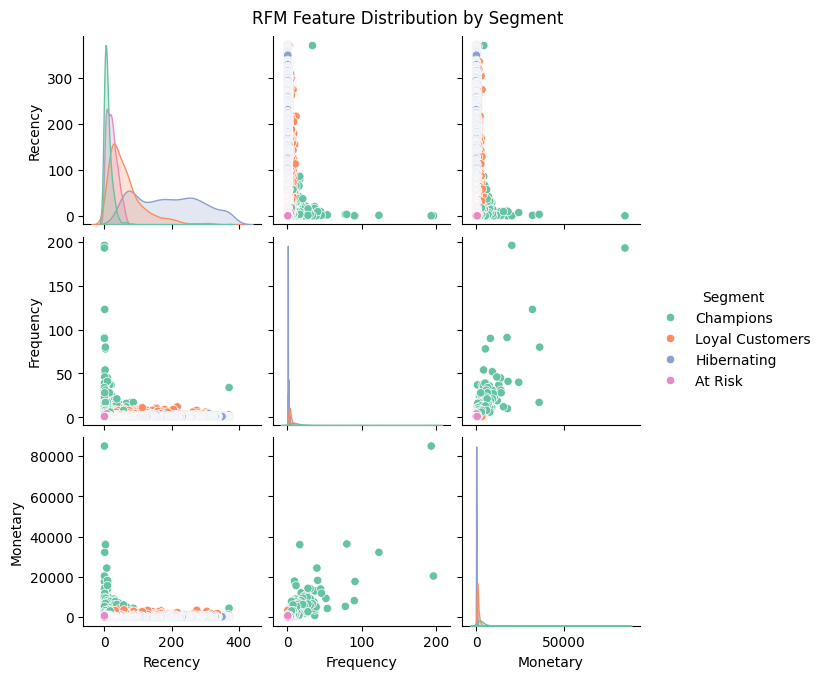

In [160]:
# -----------------------------
# 4. Visualizing the RFM Feature Distribution by Segment
# -----------------------------

sns.pairplot(
    rfm,
    vars=['Recency','Frequency','Monetary'],
    hue='Segment',
    palette='Set2',
    diag_kind='kde',
    height=2.2
)
plt.suptitle("RFM Feature Distribution by Segment", y=1.02)
plt.show()

In [161]:
#Saving the rfm file 
rfm.to_csv("Results/Objective_1/rfm.csv", index=False)
print("✅ RFM features have been successfully saved to 'Results/Objective_1/rfm.csv' file")

✅ RFM features have been successfully saved to 'Results/Objective_1/rfm.csv' file


**<h4>First Predictive Model (XGBoost)</h4>**

**Goal:** To train a classifier that predicts a customer's segment based on their RFM scores

In [163]:
X = rfm[['Recency','Frequency','Monetary']]
y = rfm['Cluster']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Oversample only training data
    sm = SMOTE(random_state=42, k_neighbors=1)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    # Train model
    xgb = XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softmax",
        num_class=4,
        eval_metric="mlogloss",
        random_state=42
    )
    
    xgb.fit(X_train_res, y_train_res)
    
    # Predict on test fold
    y_pred = xgb.predict(X_test)
    
    # Store for global evaluation
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)


**<h4>Second Predictive Model (RandomForest)</h4>**

**Goal:** To train a classifier that predicts a customer's segment based on their RFM scores

In [165]:
X = rfm[['Recency','Frequency','Monetary']]
y = rfm['Cluster']


# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Oversample minority class
sm = SMOTE(random_state=42, k_neighbors=1)  # use k=1 because cluster 2 has only 4 samples
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train model
rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

**<h2>CRISP DM Phase 5: Evaluation </h2>**

**Objectives:**<br>
> - Evaluate Clusters Quality
> - Evaluate Model Quality
> - Segment Profiling (Customer-Level)
> - Segment KPIs (Transactional View)
> - Business Alignment: Map Segments --> Objectivves & KPIs
> - Validate Phase 1 SMART Objectives & Success Criteria (Business, Data Mining, Technical)

**<h4>Evaluating Clusters Quality</h4>**

In [169]:
# ------------------------------------------------
# Evaluating Cluster Quality
# ------------------------------------------------
# Cluster sizes: helpful to identify micro-clusters/outliers
cluster_counts = rfm['Cluster'].value_counts().sort_index()
segment_counts = rfm['Segment'].value_counts()
print("\nCluster counts (by cluster id):\n", cluster_counts)
print("\nSegment counts (by business label):\n", segment_counts)



Cluster counts (by cluster id):
 Cluster
0     675
1     822
2    1466
3    1228
Name: count, dtype: int64

Segment counts (by business label):
 Segment
Hibernating        1466
Loyal Customers    1228
At Risk             822
Champions           675
Name: count, dtype: int64


In [170]:
# ------------------------------------------------
# Silhouette score
# ------------------------------------------------
silhouette_notes = {}
X_log = rfm[['Recency_log','Frequency_log','Monetary_log']].values
sil_log = silhouette_score(X_log, rfm['Cluster'])
silhouette_notes['LogRFM'] = round(sil_log, 4)
print("Silhouette score (Log-RFM):", silhouette_notes['LogRFM'])

Silhouette score (Log-RFM): 0.3185


#### Silhouette Score Summary (Log-RFM Clustering)

##### **Silhouette Score:** **0.3185**

##### **Interpretation**
- A silhouette score of **0.3185** indicates **moderate cluster separation**.
- The clusters are **somewhat cohesive and somewhat distinct**, meaning the data shows **real but not strong** structure.
- It is common to have some overlap between clusters in RFM-based customer data.
- Overall, the score suggests that the Log-RFM clustering produces **meaningful but moderately defined** customer groups which is acceptable in our case.


**<h4>Evaluating Model Quality</h4>**

Classification Report (5-Fold Cross-Validated) - XGBoost Model:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       675
           1       0.96      0.95      0.96       822
           2       0.98      0.98      0.98      1466
           3       0.96      0.97      0.96      1228

    accuracy                           0.97      4191
   macro avg       0.97      0.97      0.97      4191
weighted avg       0.97      0.97      0.97      4191




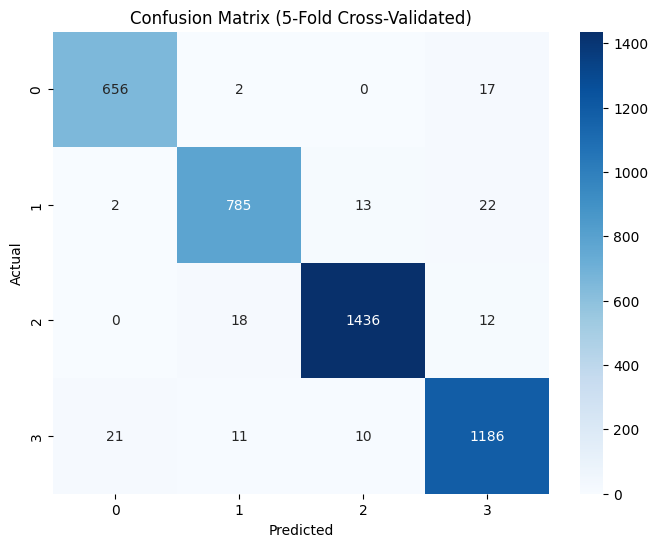

In [173]:
# Evaluating XGBoost Model
# ------------------------------------------------
# 1. Classification Report (Aggregated)
# ------------------------------------------------
print("Classification Report (5-Fold Cross-Validated) - XGBoost Model:")
print(classification_report(all_y_true, all_y_pred))
print()

# ------------------------------------------------
# 2. Confusion Matrix (Aggregated)
# ------------------------------------------------
cm = confusion_matrix(all_y_true, all_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (5-Fold Cross-Validated)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       170
           1       0.97      0.97      0.97       215
           2       0.99      0.99      0.99       343
           3       0.97      0.98      0.97       320

    accuracy                           0.98      1048
   macro avg       0.98      0.98      0.98      1048
weighted avg       0.98      0.98      0.98      1048




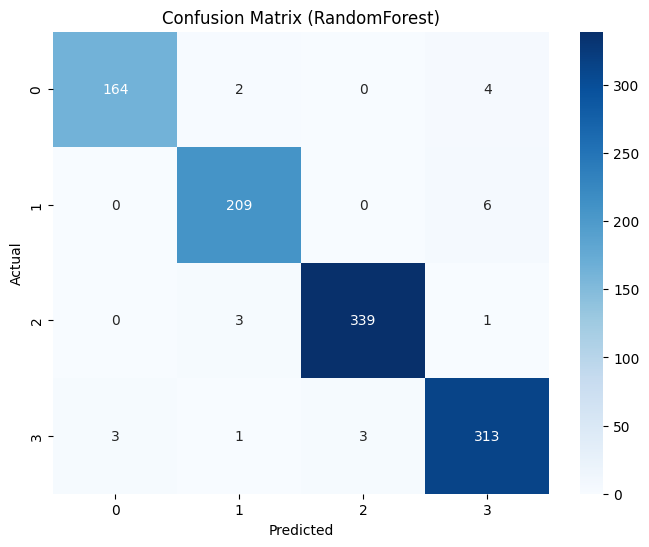

In [174]:
# Evaluating RandomForest Model
# ----------------------------- 
# Evaluation Metrics 
# ----------------------------- 
#First, we use the trained rf_model to predict the test samples 
y_pred = rf_model.predict(X_test) 

#1. Classification Report 
print("Classification Report (Random Forest):") 
print(classification_report(y_test, y_pred)) 
print() 

#2. Confusion Matrix 
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(8,6)) 
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g') 
plt.title("Confusion Matrix (RandomForest)") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

ROC-AUC (Macro): 0.9992916763156243
ROC-AUC (Micro): 0.9993054442728666


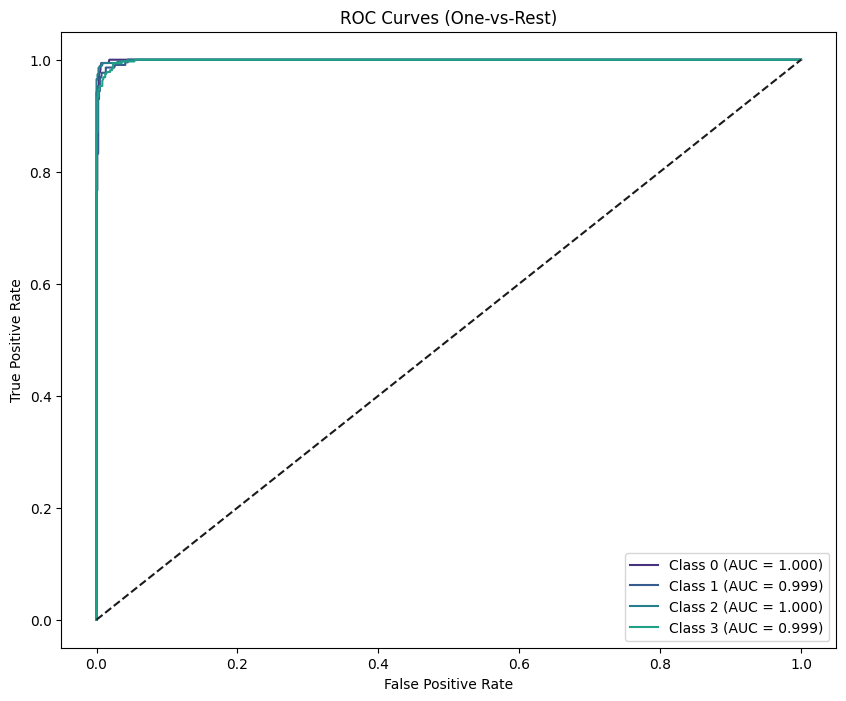

In [175]:
# ----------------------------- 
# Other Evaluation Metrics - ROC & AUC for Multiclass Random Forest
# ----------------------------- 

# 1. Get predicted probabilities
y_proba = rf_model.predict_proba(X_test)

# 2. Binarize true labels (One-vs-Rest)
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# 3. Compute ROC-AUC score (macro, micro)
macro_auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
micro_auc = roc_auc_score(y_test_bin, y_proba, average="micro", multi_class="ovr")

print("ROC-AUC (Macro):", macro_auc)
print("ROC-AUC (Micro):", micro_auc)

# 4. Plot ROC curve per class
plt.figure(figsize=(10, 8))

for i, c in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {c} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.show()

##### 📈 ROC–AUC Evaluation Summary

Our Random Forest classifier delivers **exceptional multi-class performance**, with ROC–AUC scores indicating near-perfect differentiation between customer segments.

---

###### 🔍 Overall Performance

- **Macro ROC–AUC:** **0.9993**  
  Treats all classes equally; reflects *near-perfect* separability.

- **Micro ROC–AUC:** **0.9993**  
  Aggregates all predictions; confirms consistent, high-quality performance across the dataset.

---

###### 📊 Per-Class AUC Scores

| Class | AUC Score |
|-------|-----------|
| **0** | **1.000** |
| **1** | **0.999** |
| **2** | **1.000** |
| **3** | **0.999** |

---

###### 🧠 Interpretation

- All classes achieve **AUC values close to 1.0**, indicating excellent discrimination capability.  
- The model can **accurately distinguish** each customer segment with minimal overlap.  
- RFM features (Recency, Frequency, Monetary) provide **strong predictive separation** between clusters.  
- Overall, the classifier demonstrates **near-perfect ROC–AUC performance**, showing a highly stable and reliable model.

---


**<h4>Segment Profiling (Customer-Level)</h4>**

In [178]:
#First, we conduct a sanity check on the features we need
# -----------------------------
# 1. Sanity checks
# -----------------------------
required_rfm = {'CustomerID','Recency','Frequency','Monetary','Cluster','Segment','PCA1','PCA2'}
required_df = {'InvoiceNo','CustomerID','InvoiceDate','OrderValue','StockCode','Description','Quantity','Cluster','Segment','Region'}

missing_rfm = required_rfm - set(rfm.columns)
missing_df = required_df - set(df_completed.columns)

if missing_rfm:
    raise KeyError(f"rfm is missing required columns: {missing_rfm}")
if missing_df:
    raise KeyError(f"df_completed is missing required columns: {missing_df}")

print("Sanity checks passed.")
print("Number of customers (rfm):", rfm.shape[0])
print("Number of transactions (df_completed):", df_completed.shape[0])

Sanity checks passed.
Number of customers (rfm): 4191
Number of transactions (df_completed): 333048


In [179]:
# -----------------------------
# 2. Cluster / Segment profiling
# -----------------------------
# 2.1 RFM medians & means per segment (robust)
profile_median = rfm.groupby('Segment')[['Recency','Frequency','Monetary']].median().round(2)
profile_mean   = rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean().round(2)

print("\n--- Median RFM per Segment ---\n")
display(profile_median)
print("\n--- Mean RFM per Segment ---\n")
display(profile_mean)

# 2.2 Customers Count per segment
cust_counts = rfm['Segment'].value_counts().rename_axis('Segment').reset_index(name='NumCustomers')
print("\nCustomer counts per segment:\n")
display(cust_counts)

# 2.3 Customers Ratio per segment
cust_ratio = rfm['Segment'].value_counts(normalize=True).rename_axis('Segment').reset_index(name='NumCustomers')
print("\nCustomer Ratio per segment:\n")
display(cust_ratio)


--- Median RFM per Segment ---



Recency  Frequency  Monetary
Segment                                      
At Risk            20.00       2.00    290.52
Champions           7.00       9.00   2451.61
Hibernating       187.00       1.00    192.09
Loyal Customers    49.00       4.00    931.94


--- Mean RFM per Segment ---



Recency  Frequency  Monetary
Segment                                      
At Risk            22.13       1.82    326.27
Champions          10.64      12.65   3466.37
Hibernating       190.47       1.29    226.08
Loyal Customers    64.35       3.98   1107.00


Customer counts per segment:



Segment  NumCustomers
0      Hibernating          1466
1  Loyal Customers          1228
2          At Risk           822
3        Champions           675


Customer Ratio per segment:



Segment  NumCustomers
0      Hibernating          0.35
1  Loyal Customers          0.29
2          At Risk          0.20
3        Champions          0.16

In [180]:
#Additional Customer-Level Metrics (Customer Lifetime Value --> CLV)
clv_by_customer = df_completed.groupby("CustomerID")["CLV"].first()   #CLV is consistent per customer

#Merge clv_by_customer to rfm
rfm = rfm.merge(
    clv_by_customer.rename("CLV"), 
    left_on="CustomerID",
    right_index=True,       #CustomerID is the index of clv_by_customer
    how="left"
)

#Confirming the operation
assert "CLV" in rfm.columns

rfm["CLV"] = rfm["CLV"].fillna(0)
clv_profile = rfm.groupby('Segment')['CLV'].agg(['mean','median','sum','count']).rename(columns={'count':'NumCustomers'})
clv_profile = clv_profile.round(2)
print("\nCLV summary per segment:")
display(clv_profile)



CLV summary per segment:


mean  median        sum  NumCustomers
Segment                                                 
At Risk          604.70  395.09  497059.97           822
Champions       7340.56 3534.69 4954880.74           675
Hibernating      610.99  300.47  895708.98          1466
Loyal Customers 1674.09 1267.14 2055782.90          1228

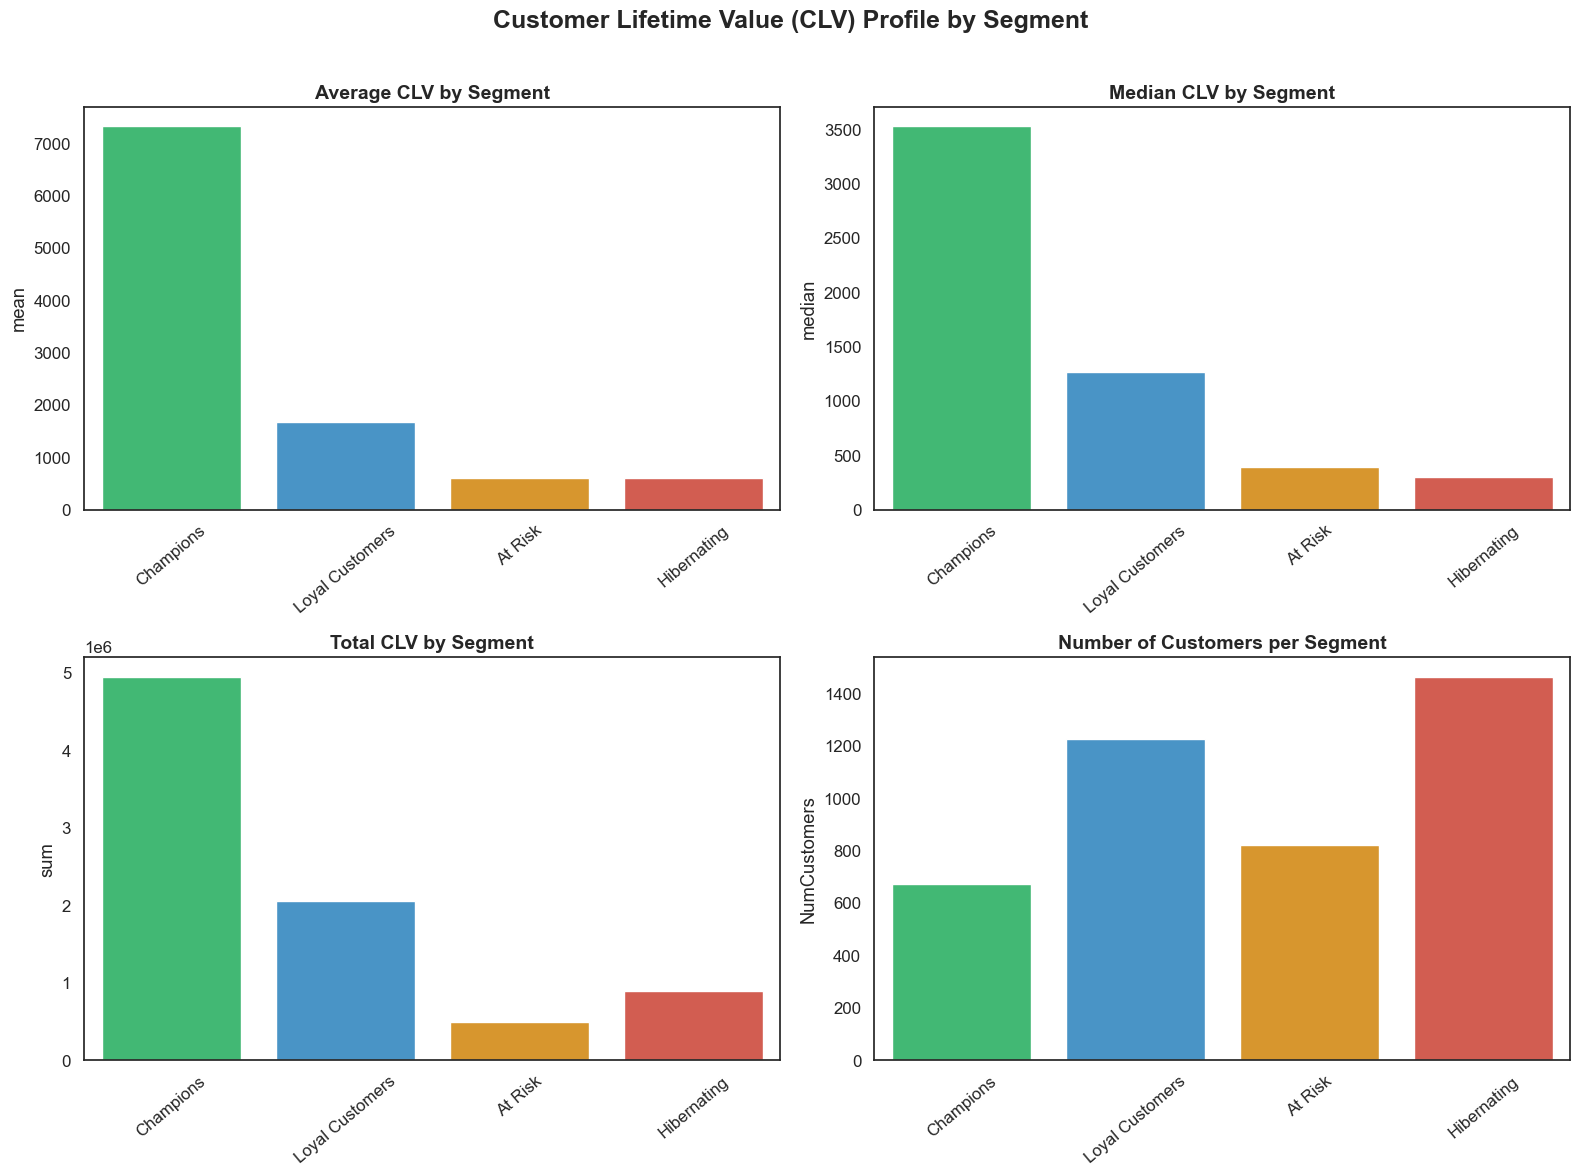

In [181]:
#Visualizing the Customer Lifetime Value Metrics
custom_colors = [
    "#2ecc71",    # green  (Champions)
    "#3498db",   # blue   (Loyal Customers)
    "#f39c12",    # amber  (At Risk) 
    "#e74c3c"    # red    (Hibernating)
      
]

sns.set(style="white", palette=custom_colors, font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

metrics = ["mean", "median", "sum", "NumCustomers"]
titles = [
    "Average CLV by Segment",
    "Median CLV by Segment",
    "Total CLV by Segment",
    "Number of Customers per Segment"
]

for ax, metric, title in zip(axes, metrics, titles):
    sns.barplot(
        data=clv_profile.sort_values(by="median", ascending=False).reset_index(),
        x="Segment",
        y=metric,
        ax=ax,
        hue="Segment",
        legend=False
    )
    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("")
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=40)

plt.suptitle("Customer Lifetime Value (CLV) Profile by Segment", fontsize=18, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**<h4>Segment KPIs (Transactional View)</h4>**

In [183]:
# -----------------------------
# Segment KPIs from transactions
# -----------------------------
segment_kpis = df_completed.groupby('Segment').agg(
    NumCustomers=('CustomerID','nunique'),
    TotalRevenue=('OrderValue','sum'),
    NumTransactions=('InvoiceNo','nunique'),
    AvgOrderValue=('OrderValue','mean')
).round(2)


segment_kpis['RevenuePerCustomer'] = (segment_kpis['TotalRevenue'] / segment_kpis['NumCustomers']).round(2)
segment_kpis['TransactionsPerCustomer'] = (segment_kpis['NumTransactions'] / segment_kpis['NumCustomers']).round(2)

# Sorting segments by RevenuePerCustomer descending for readability
segment_kpis = segment_kpis.sort_values('RevenuePerCustomer', ascending=False)

print("\n--- Segment KPIs ---\n")
display(segment_kpis)


--- Segment KPIs ---



NumCustomers  TotalRevenue  NumTransactions  AvgOrderValue  \
Segment                                                                       
Champions                 675    2339796.78             8541          13.35   
Loyal Customers          1228    1359390.57             4890          13.28   
At Risk                   822     268193.25             1497           9.81   
Hibernating              1466     331437.58             1887          11.84   

                 RevenuePerCustomer  TransactionsPerCustomer  
Segment                                                       
Champions                   3466.37                    12.65  
Loyal Customers             1107.00                     3.98  
At Risk                      326.27                     1.82  
Hibernating                  226.08                     1.29

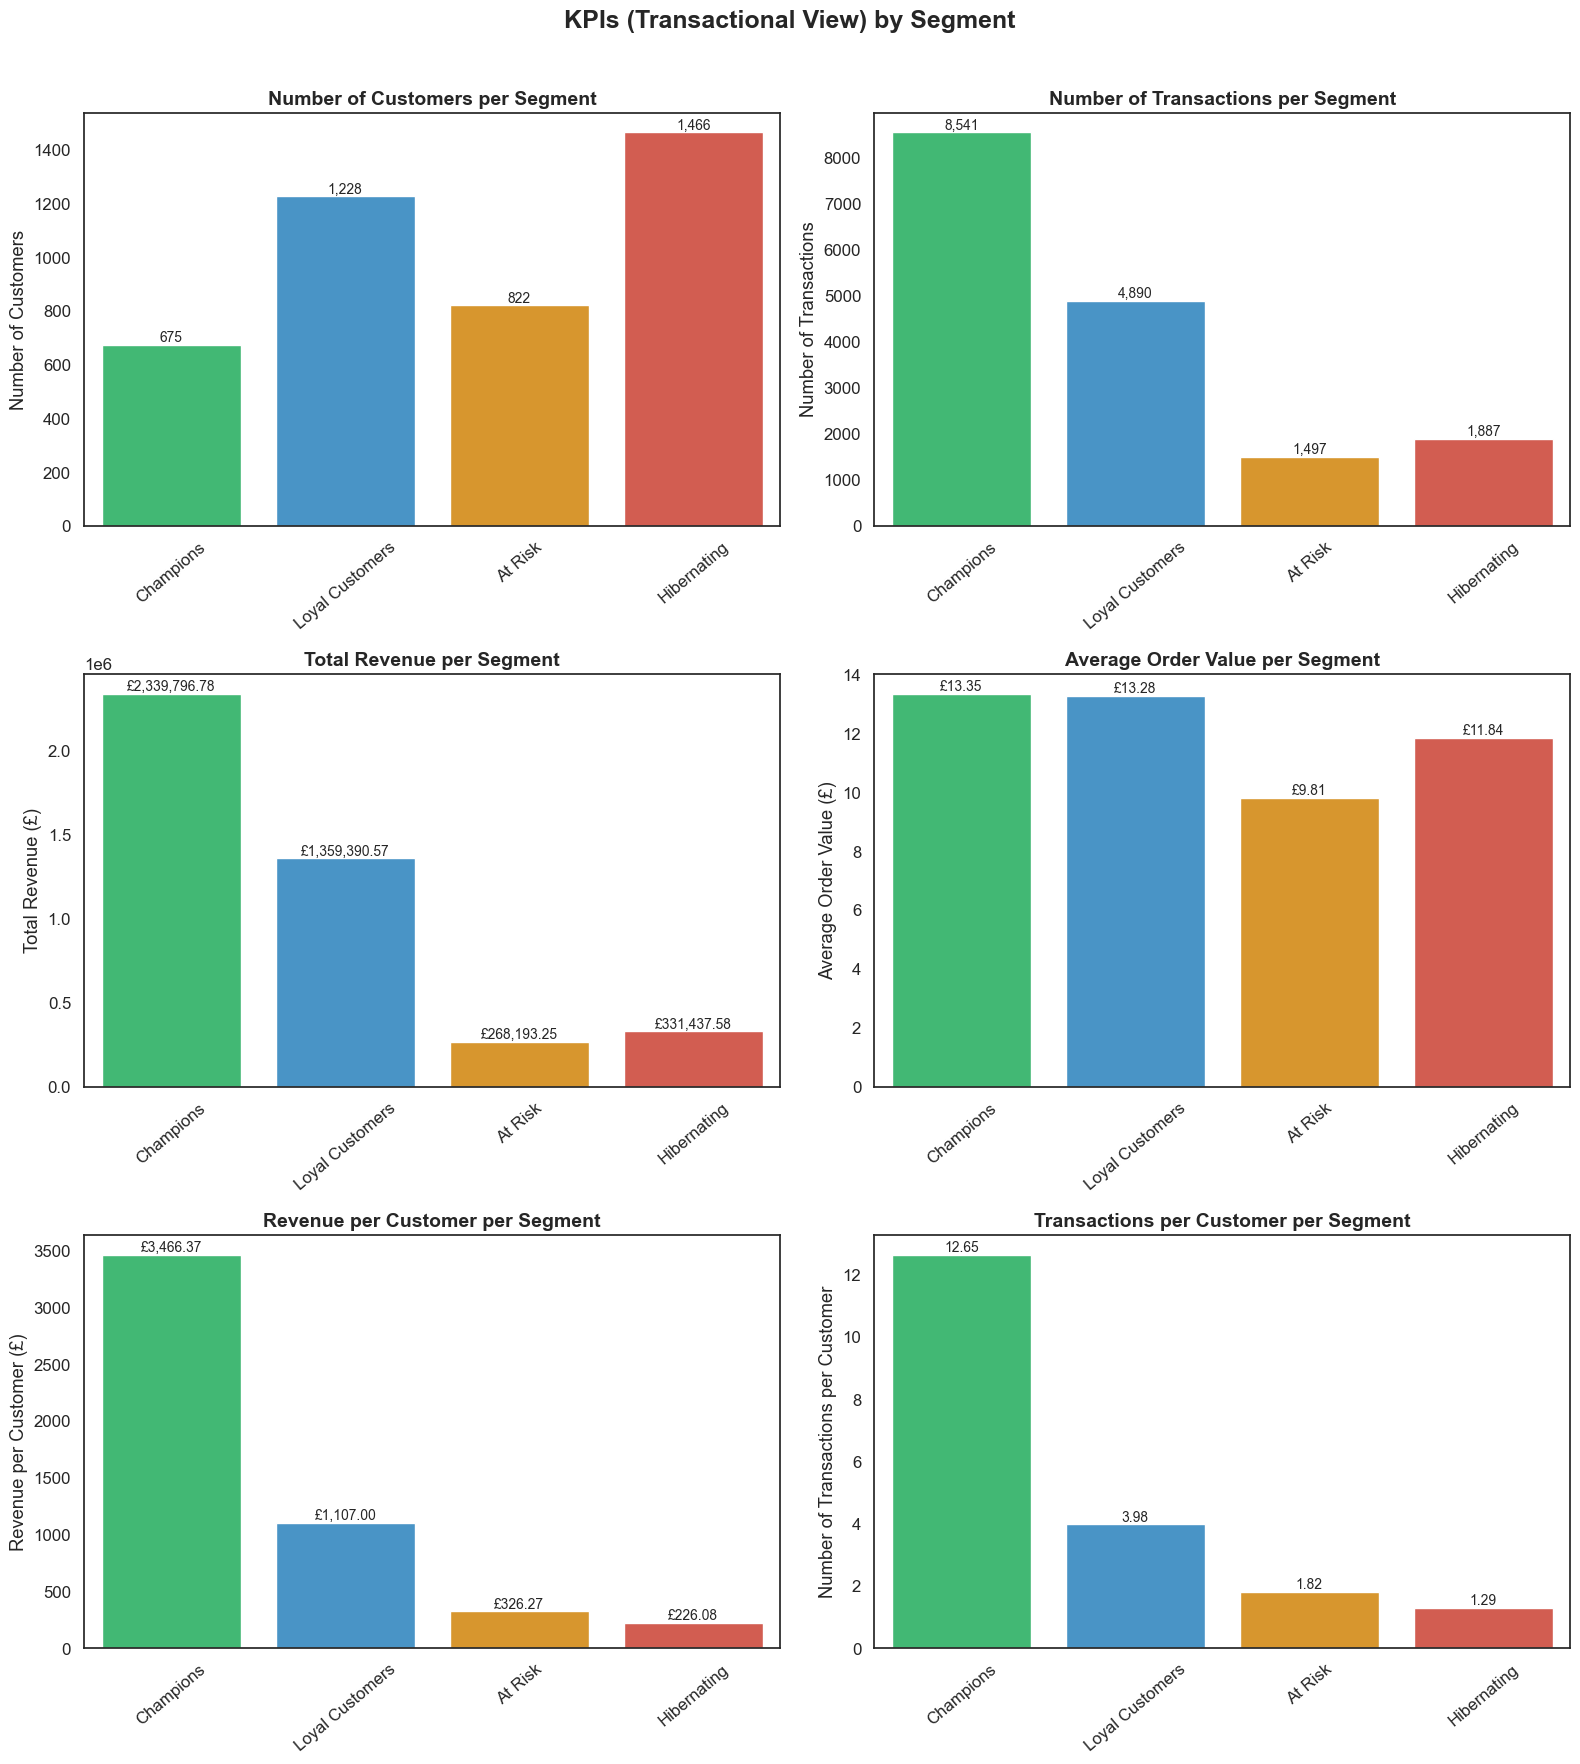

In [184]:
# Visualizing the Segment KPIs (Transactional View)

sns.set(style="white", palette=custom_colors, font_scale=1.1)

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

metrics = [
    "NumCustomers", "NumTransactions", "TotalRevenue",
    "AvgOrderValue", "RevenuePerCustomer", "TransactionsPerCustomer"
]

titles = [
    "Number of Customers per Segment",
    "Number of Transactions per Segment",
    "Total Revenue per Segment",
    "Average Order Value per Segment",
    "Revenue per Customer per Segment",
    "Transactions per Customer per Segment"
]

# Defining how each metric should be formatted
format_styles = {
    "NumCustomers": "int",
    "NumTransactions": "int",
    "TotalRevenue": "currency",
    "AvgOrderValue": "currency",
    "RevenuePerCustomer": "currency",
    "TransactionsPerCustomer": "float2"
}

def format_value(val, style):
    """Smart formatting based on metric type."""
    if style == "int":
        return f"{val:,.0f}"
    elif style == "currency":
        return f"£{val:,.2f}"
    elif style == "float2":
        return f"{val:,.2f}"
    else:
        return str(val)

# -----------------------------
# Plot each KPI with labels
# -----------------------------
label_names = [
    "Number of Customers",
    "Number of Transactions",
    "Total Revenue (£)",
    "Average Order Value (£)",
    "Revenue per Customer (£)",
    "Number of Transactions per Customer"
]
i = 0 #This will be used to loop through the label_names
for ax, metric, title in zip(axes, metrics, titles):
    style = format_styles[metric]
    data = segment_kpis.reset_index()

    sns.barplot(
        data=data,
        x="Segment",
        y=metric,
        ax=ax,
        hue="Segment",
        legend=False
    )

    # ---- Adding smart-formatted labels ----
    for p in ax.patches:
        val = p.get_height()
        label = format_value(val, style)

        ax.annotate(
            label,
            (p.get_x() + p.get_width() / 2, val),
            ha="center", va="bottom",
            fontsize=10
        )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("")
    ax.set_ylabel(label_names[i])
    #Increment i to get the next label name
    i+=1
    ax.tick_params(axis='x', rotation=40)

plt.suptitle("KPIs (Transactional View) by Segment", fontsize=18, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [185]:
sns.set(style="white")
plt.rcParams["figure.figsize"] = (12, 6)
pd.set_option("display.max_columns", None)

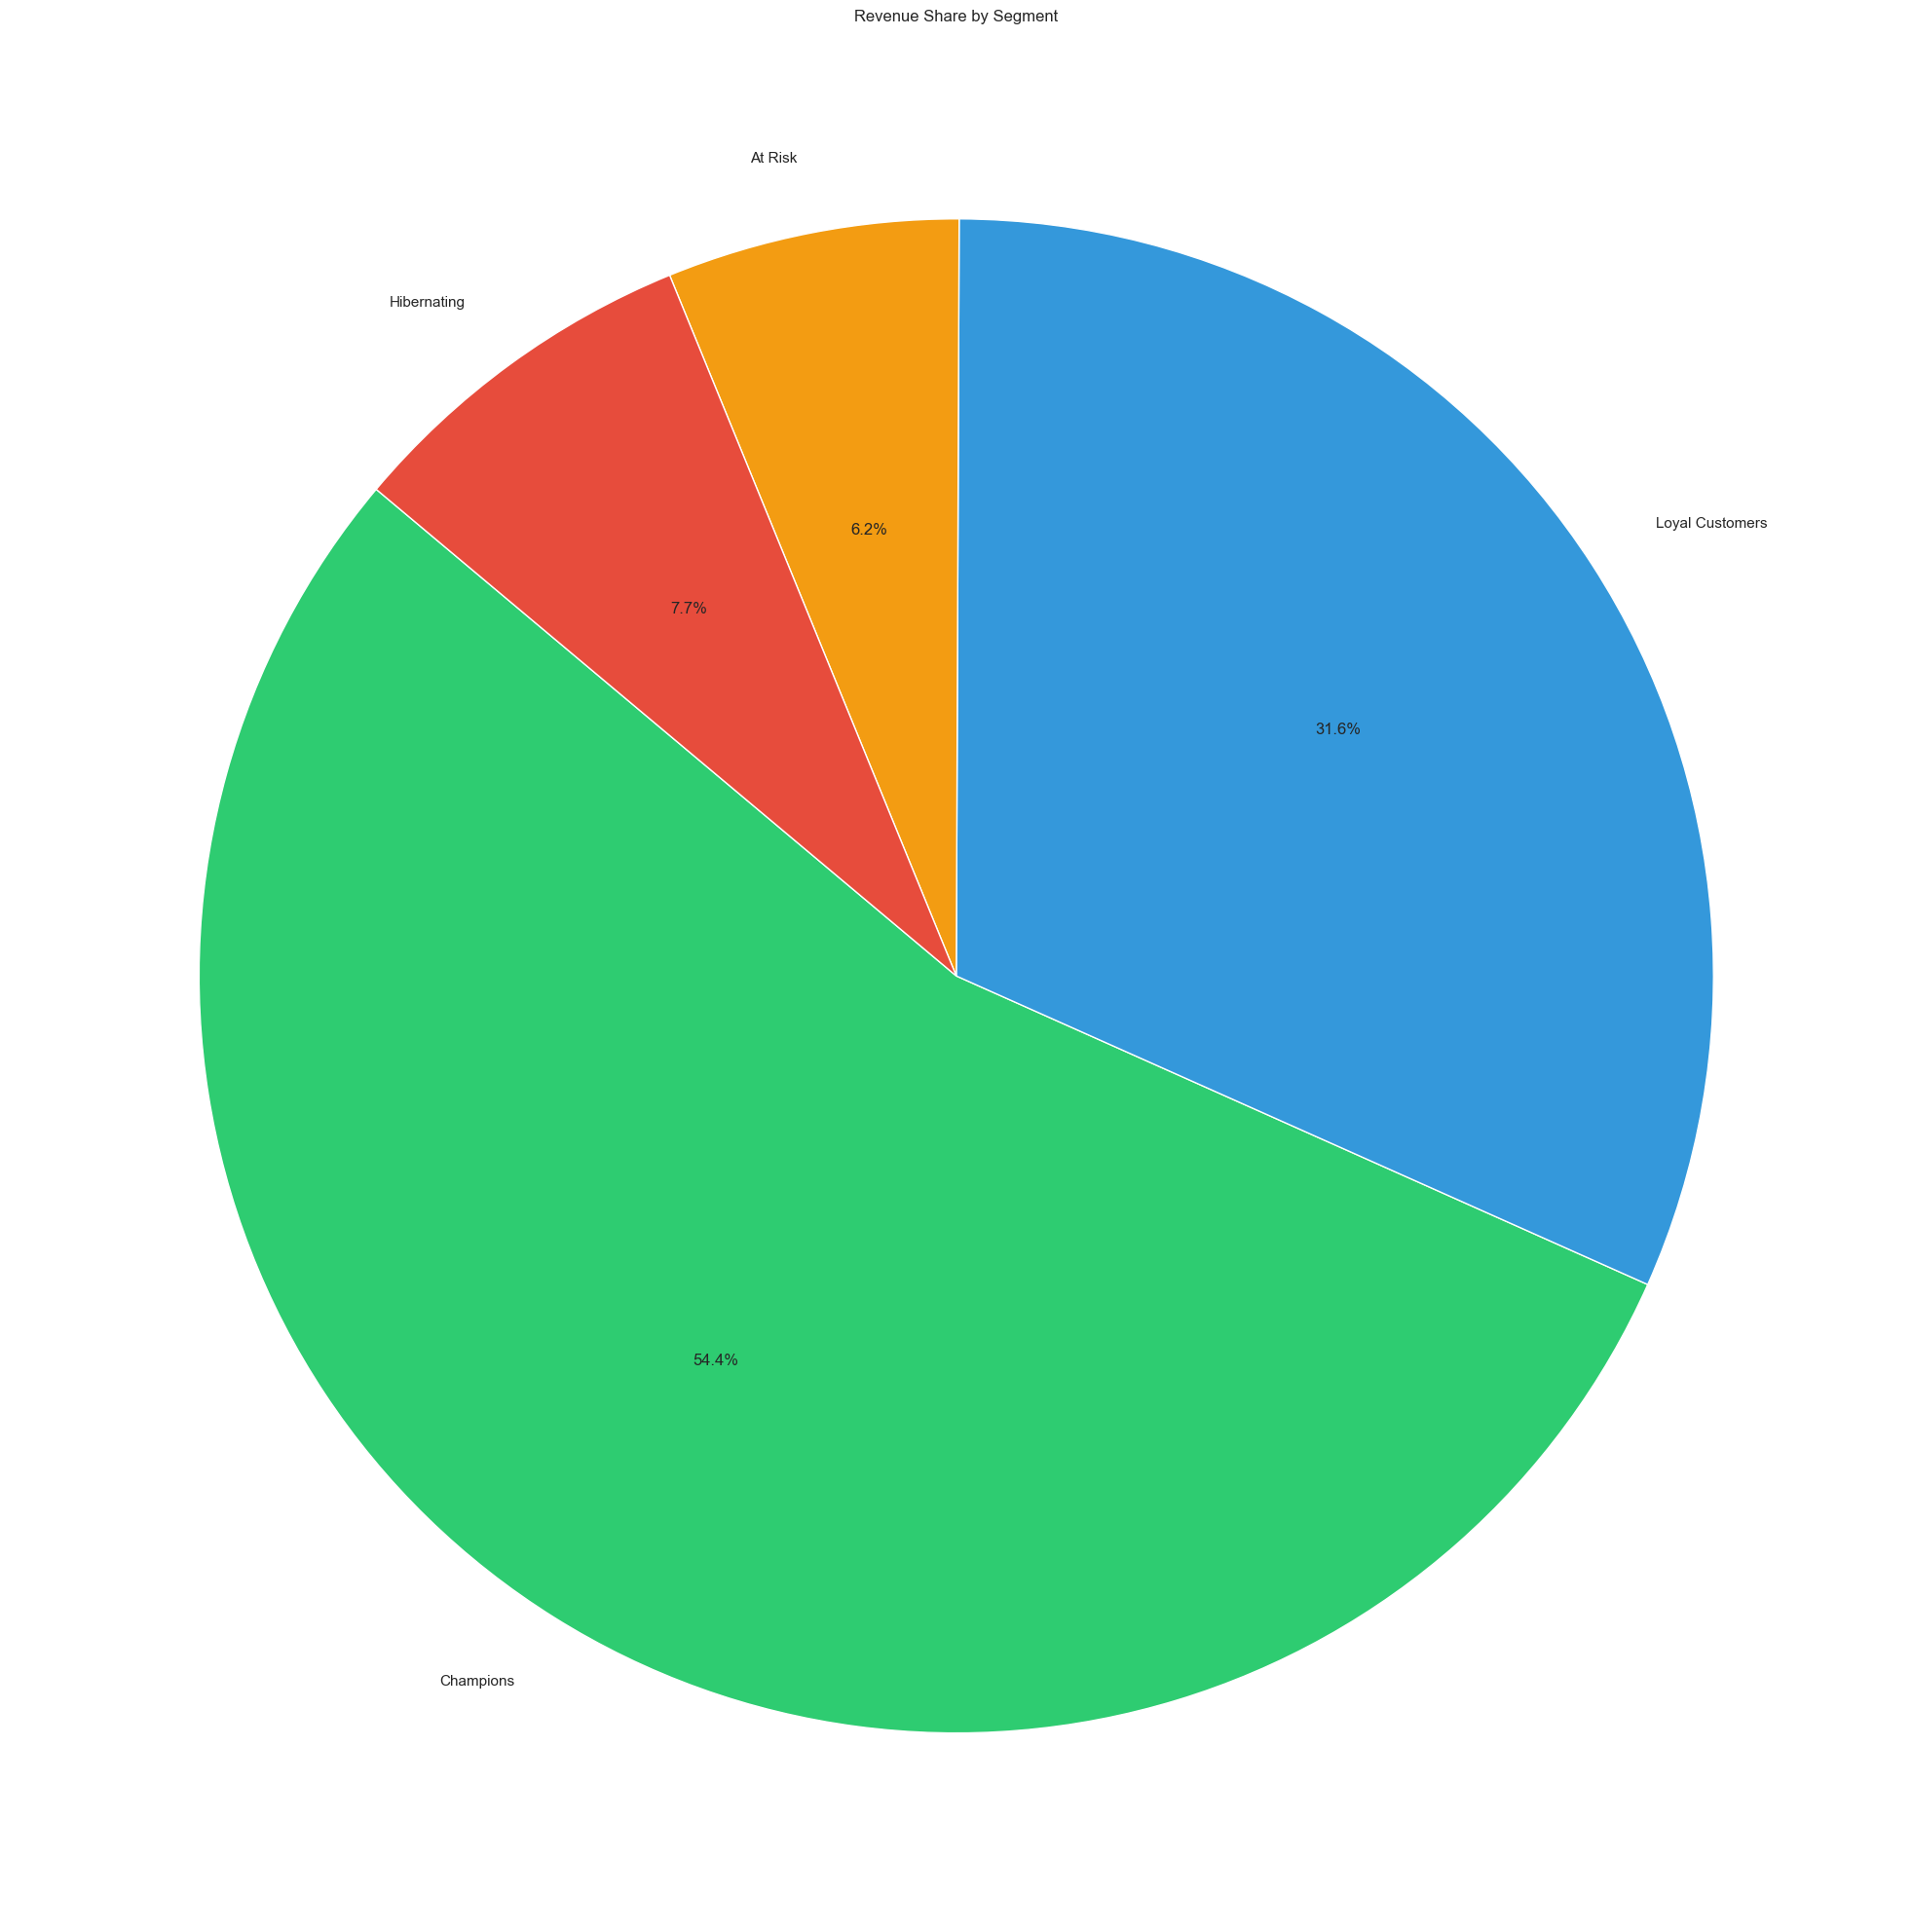

In [186]:
# Revenue share pie chart
plt.figure(figsize=(20,20))
plt.pie(
    segment_kpis['TotalRevenue'],
    labels=segment_kpis.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors
)
plt.title('Revenue Share by Segment')
plt.ylabel('')
plt.tight_layout()
plt.show()

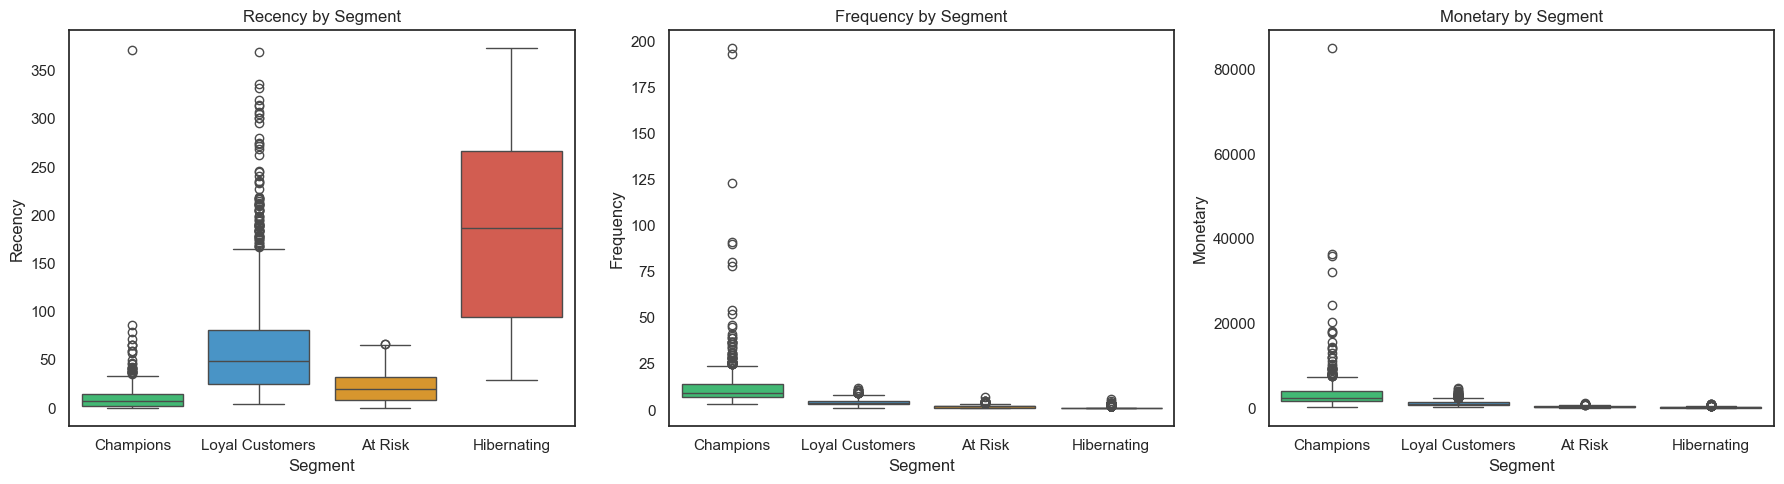

In [187]:
# 4.4 RFM boxplots by segment (visual distribution)

# Map segment names to colors explicitly
segment_colors = {
    "Champions": custom_colors[0],
    "Loyal Customers": custom_colors[1],
    "At Risk": custom_colors[2],
    "Hibernating": custom_colors[3]
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

order = segment_kpis.index.tolist()

# Recency
sns.boxplot(
    x='Segment', y='Recency',
    data=rfm,
    order=order,
    hue='Segment',             # required in Seaborn 0.14+
    palette=segment_colors,    # dict ensures exact color mapping
    dodge=False,               # prevents boxes from splitting
    legend=False,              # no extra legend
    ax=axes[0]
)
axes[0].set_title('Recency by Segment')

# Frequency
sns.boxplot(
    x='Segment', y='Frequency',
    data=rfm,
    order=order,
    hue='Segment',
    palette=segment_colors,
    dodge=False,
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Frequency by Segment')

# Monetary
sns.boxplot(
    x='Segment', y='Monetary',
    data=rfm,
    order=order,
    hue='Segment',
    palette=segment_colors,
    dodge=False,
    legend=False,
    ax=axes[2]
)
axes[2].set_title('Monetary by Segment')

plt.tight_layout()
plt.show()


**<h4>Visualizations (Time-series / Seasonal Analysis) - Objective 3</h4>**

In [189]:
# Monthly revenue overall and per segment (using InvoiceDate -> YearMonth)

monthly_total = df_completed.groupby('YearMonth')['OrderValue'].sum()
monthly_by_segment = df_completed.groupby(['YearMonth','Segment'])['OrderValue'].sum().unstack(fill_value=0)

display(monthly_by_segment.head())

Segment    At Risk  Champions  Hibernating  Loyal Customers
YearMonth                                                  
2010-12    9133.78  171974.28     32077.01         70843.82
2011-01    2526.28  129730.61     23794.42         76678.97
2011-02    4357.63  112948.95     28395.58         73431.08
2011-03    5471.09  143588.28     38546.96         97781.92
2011-04    4080.11  123855.61     31319.60         83130.20

In [190]:
#Defining visually appealing colors to be used subsequently
custom_colors = [
    "#f39c12",   # amber  (At Risk)
    "#2ecc71",   # green  (Champions)
    "#e74c3c",    # red    (Hibernating)
    "#3498db"   # blue   (Loyal Customers)    
]

<Figure size 1400x600 with 0 Axes>

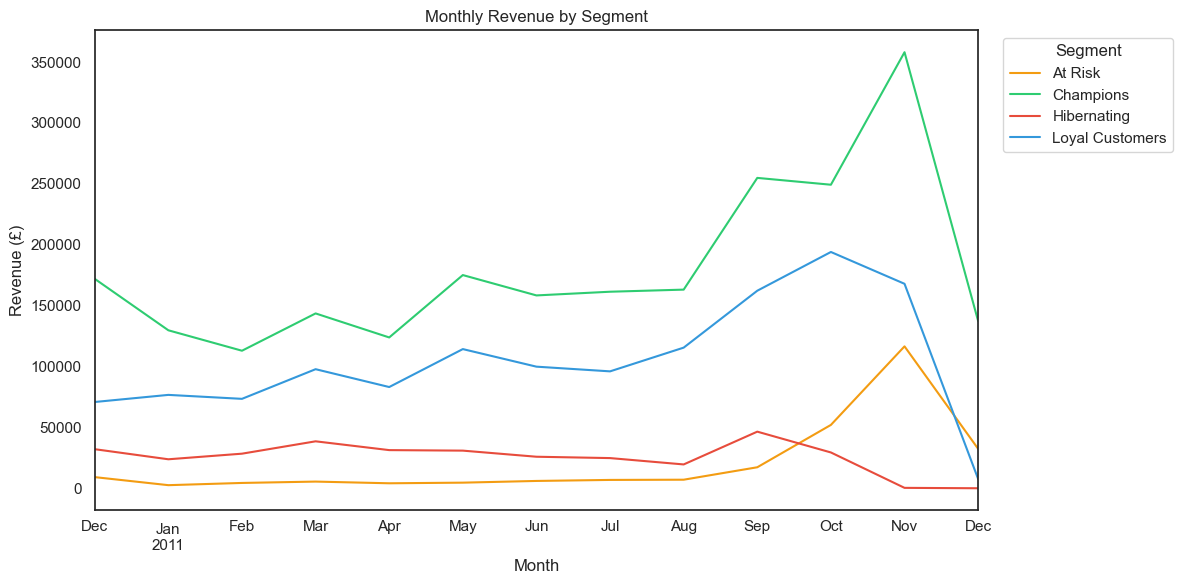

In [191]:
# Plotting monthly revenue by segment (multi-line)
plt.figure(figsize=(14,6))
monthly_by_segment.plot(color=custom_colors)
plt.title('Monthly Revenue by Segment')
plt.xlabel('Month')
plt.ylabel('Revenue (£)')
plt.legend(title='Segment', bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()

**<h4>Business Alignment: Map Segments --> Objectives & KPIs</h4>**

In [193]:
# For each segment, we provide: short description (RFM Medians & NumCustomers), business priority, KPIs to track, recommended offers

# Mapping of segments to priorities
priority_mapping = {
    'Champions': 'Very High',
    'Loyal': 'High',
    'At Risk': 'Medium',
    'Hibernating': 'Low'
}

# Create a function to map each segment to its priority
def get_priority(segment):
    if 'Champions' in segment:
        return priority_mapping['Champions']
    elif 'Loyal' in segment:
        return priority_mapping['Loyal']
    elif 'At Risk' in segment:
        return priority_mapping['At Risk']
    elif 'Hibernating' in segment:
        return priority_mapping['Hibernating']
    else:
        return 'Medium'  # Default priority if not in the above categories

# Now we will combine all the necessary information into a new DataFrame
# Create the segment_actions dictionary (with business actions)
segment_actions = {}

# Build descriptions from RFM & KPIs (automated summary)
for seg in segment_kpis.index:
    # recommended actions (prioritized)
    if 'Champions' in seg:
        action = ("Treat as VIP. Actions: exclusive offers, early access, loyalty tiers, "
                  "personalized care, referral programs. KPI focus: retention rate, share-of-wallet.")
    elif 'Loyal' in seg:
        action = ("Upsell and cross-sell. Actions: bundles, loyalty points, "
                  "targeted recommendations. KPI focus: frequency, AOV growth.")
    elif 'At Risk' in seg:
        action = ("Re-engage with targeted promos and surveys. "
                  "Actions: win-back emails, limited-time discounts. KPI focus: reactivation rate.")
    elif 'Hibernating' in seg:
        action = ("Cost-effectiveness check before investing. "
                  "Actions: low-cost win-back, surveys; consider removing from active campaigns if ROI low. "
                  "KPI focus: cost-to-reactivate vs lifetime value.")
    else:
        action = ("Priority: MEDIUM. Investigate further and create tailored campaigns.")
    segment_actions[seg] = action

# Converting the segment_actions dictionary to a DataFrame
segment_actions_df = pd.DataFrame.from_dict(
    segment_actions, 
    orient="index", 
    columns=["Recommended Actions"]
)

# Merging profile_median and segment_actions_df on "Segment"
df_completed_output = profile_median.merge(segment_actions_df, 
                                           left_index=True, 
                                           right_index=True)

# Adding the Number of Customers per segment to the DataFrame
num_cust = segment_kpis["NumCustomers"]
df_completed_output.insert(
    loc=0,                            # position (0 = first column)
    column="Num of Customers",        # new column name
    value=num_cust                    # values aligned by index
)

# Renaming relevant columns for clarity
df_completed_output = df_completed_output.rename(columns={
    "Recency": "MedianRecency",
    "Frequency": "MedianFrequency",
    "Monetary": "MedianMonetary"
})

# ------------------------------------------
# Add Priority Column
# ------------------------------------------

# Apply the function to create the 'Priority' column
df_completed_output['Priority'] = df_completed_output.index.to_series().apply(get_priority)

# Reordering the columns to place 'Priority' just before 'Recommended Actions'
cols = df_completed_output.columns.tolist()

# Find the index of the "Recommended Actions" column
recommended_actions_index = cols.index("Recommended Actions")

# Insert 'Priority' just before "Recommended Actions"
cols.insert(recommended_actions_index, cols.pop(cols.index('Priority')))

# Reorder the DataFrame columns according to the updated list
df_completed_output = df_completed_output[cols]


# Visualizing the final DataFrame (Optional for styling)
df_completed_output.style.set_properties(**{
    'white-space': 'pre-wrap',
    'word-wrap': 'break-word'
})\
    .format({
        "MedianRecency": "{:.2f}",
        "MedianFrequency": "{:.2f}",
        "MedianMonetary": "{:.2f}"
    })

# Now df_completed_output should have the Priority column correctly added based on the segment


**<h4>Ranked List of Top Revenue Drivers (Objective 4)</h4>**

In [195]:
# Produce ranked list of top revenue drivers
# Rank products by revenue, pick top N; rank countries by revenue; rank segments by RevenuePerCustomer


top_products = product_revenue.head(50)
top_countries = country_revenue.reset_index().rename(columns={'OrderValue':'TotalRevenue'})
segment_rank = segment_kpis.sort_values('RevenuePerCustomer', ascending=False).reset_index()

# Create final driver scoreboard
driver_score = {
    'top_products': top_products,
    'top_countries': top_countries.head(20),
    'top_customers': customer_revenue.head(50),
    'segment_rank': segment_rank
}

In [196]:
# Export scoreboard to CSV/Excel for stakeholders
# For one-file summary:
with pd.ExcelWriter('Results/Objective_4/revenue_drivers_dashboard.xlsx') as writer:
    top_products.to_excel(writer, sheet_name='TopProducts', index=False)
    top_countries.to_excel(writer, sheet_name='TopCountries', index=False)
    customer_revenue.head(100).to_excel(writer, sheet_name='TopCustomers', index=False)
    segment_kpis.to_excel(writer, sheet_name='SegmentKPIs')

print("Revenue drivers saved to 'Results/Objective_4/revenue_drivers_dashboard.xlsx' file")

Revenue drivers saved to 'Results/Objective_4/revenue_drivers_dashboard.xlsx' file


**<h4>Validate Phase 1 SMART Objectives & Success Criteria</h4>**

In [198]:
print("\n--- PHASE 1 OBJECTIVE VALIDATION ---\n")

# --------------------------------------------------------
# Objective 1: Customer segmentation -> identify top 3 customer segments & recommendations
# --------------------------------------------------------
# We check we have >=3 meaningful segments & we produced recommendations
num_meaningful_segments = rfm['Segment'].nunique()
obj1_status = (num_meaningful_segments >= 3) and (len(segment_actions) >= num_meaningful_segments)
print("Objective 1 — Customer Segmentation:")
print(f" - Number of segments: {num_meaningful_segments} (target >= 3) -> {'PASS' if num_meaningful_segments>=3 else 'FAIL'}")
print(f" - Recommendations produced for each segment -> {'PASS' if obj1_status else 'PARTIAL'}")


--- PHASE 1 OBJECTIVE VALIDATION ---

Objective 1 — Customer Segmentation:
 - Number of segments: 4 (target >= 3) -> PASS
 - Recommendations produced for each segment -> PASS


In [199]:
# --------------------------------------------------------
# Objective 2: Product Bundling Insights
# --------------------------------------------------------
# Checking if 'top10_pairs_df' exists
try:
    # Try to access top10_pairs_df
    top10_pairs_df
    obj2_status = "PASS"  # If DataFrame exists, set status to PASS
except NameError:
    # If NameError is raised, it means the DataFrame does not exist
    obj2_status = "FAIL"  # If DataFrame doesn't exist, set status to FAIL

print("\nObjective 2 — Product Bundling Insights:")
print(" - This evaluation references product-bundling outputs produced earlier.")
print(f" - Evaluation status: {obj2_status}")


Objective 2 — Product Bundling Insights:
 - This evaluation references product-bundling outputs produced earlier.
 - Evaluation status: PASS


In [200]:
# --------------------------------------------------------
# Objective 3: Sales Trend Analysis
# --------------------------------------------------------
print("\nObjective 3 — Sales Trend Analysis:")
print(" - Seasonal analysis and dashboards should have been prepared in Phase 3.")

# List of DataFrames to check for existence
dataframes_to_check = ['daily_sales', 'monthly_revenue', 'cat_month', 'pivot', 'prod_stats']

# Function to check if DataFrame exists
def check_all_dataframes_exist(dataframe_list):
    for df_name in dataframe_list:
        try:
            # Check if the DataFrame exists
            globals()[df_name]
        except NameError:
            # If any DataFrame doesn't exist, return False
            print(f" - {df_name}: FAIL")
            return False
    return True  # All DataFrames exist


# Validate if all DataFrames exist
if check_all_dataframes_exist(dataframes_to_check):
    print(" - Evaluation status: PASS")
else:
    print(" - Evaluation status: FAIL")


Objective 3 — Sales Trend Analysis:
 - Seasonal analysis and dashboards should have been prepared in Phase 3.
 - Evaluation status: PASS


In [201]:
# --------------------------------------------------------
# Objective 4: Revenue Optimization Insights
# --------------------------------------------------------
print("\nObjective 4 — Revenue Optimization Insights:")
print(" - Segment KPIs and CLV analysis computed above can be used to prioritize markets/products. See segment_kpis and CLV tables.")

# Define the Excel file path and required sheet names
excel_file_path = 'Results/Objective_4/revenue_drivers_dashboard.xlsx'
required_sheets = ['SegmentKPIs', 'TopProducts', 'TopCountries', 'TopCustomers']

# Function to check if the Excel file exists and contains the required sheets
def check_excel_sheets(file_path, required_sheets):
    if not os.path.exists(file_path):
        print(f" - File {file_path} does not exist.")
        return False
    
    # Load the Excel file and check sheet names
    try:
        excel_file = pd.ExcelFile(file_path)
        sheet_names = excel_file.sheet_names
        for sheet in required_sheets:
            if sheet not in sheet_names:
                print(f" - Missing sheet: {sheet}")
                return False
        return True
    except Exception as e:
        print(f" - Error reading the Excel file: {e}")
        return False

# Check if the Excel file exists and contains the required sheets
if check_excel_sheets(excel_file_path, required_sheets):
    print(" - Evaluation status: PASS")
else:
    print(" - Evaluation status: FAIL")


Objective 4 — Revenue Optimization Insights:
 - Segment KPIs and CLV analysis computed above can be used to prioritize markets/products. See segment_kpis and CLV tables.
 - Evaluation status: PASS


In [202]:
# --------------------------------------------------------
# Objective 5: Data Quality Improvement
# --------------------------------------------------------
print("\nObjective 5 — Data Quality Improvement:")
# Basic data quality checks:
dq_missing = df_completed.isnull().sum().sort_values(ascending=False).head(10)
dq_dups = df_completed.duplicated().sum()
dq_neg_qty = (df_completed['Quantity'] < 0).sum()
dq_zero_price = (df_completed['UnitPrice'] <= 0).sum()
print(f" - Missing values (top cols):\n{dq_missing}")
print(f" - Duplicate rows: {dq_dups}")
print(f" - Negative quantity rows: {dq_neg_qty}")
print(f" - Zero/negative prices: {dq_zero_price}")
print("-----------------------------------")

# Check if all cases pass for the objective to be validated
if dq_missing.sum() == 0 and dq_dups == 0 and dq_neg_qty == 0 and dq_zero_price == 0:
    print(" - Data Quality Improvement: PASS")
else:
    print(" - Data Quality Improvement: FAIL")


Objective 5 — Data Quality Improvement:
 - Missing values (top cols):
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Year           0
dtype: int64
 - Duplicate rows: 0
 - Negative quantity rows: 0
 - Zero/negative prices: 0
-----------------------------------
 - Data Quality Improvement: PASS


In [203]:
# --------------------
# Executive Summary of Prioritized Recommendations per Customer Segment
# --------------------
print("\n--- EXECUTIVE RECOMMENDATIONS (PRIORITISED) ---\n")
display(df_completed_output[["Num of Customers", "Priority", "Recommended Actions"]])


--- EXECUTIVE RECOMMENDATIONS (PRIORITISED) ---



Num of Customers   Priority  \
At Risk                       822     Medium   
Champions                     675  Very High   
Hibernating                  1466        Low   
Loyal Customers              1228       High   

                                               Recommended Actions  
At Risk          Re-engage with targeted promos and surveys. Ac...  
Champions        Treat as VIP. Actions: exclusive offers, early...  
Hibernating      Cost-effectiveness check before investing. Act...  
Loyal Customers  Upsell and cross-sell. Actions: bundles, loyal...

In [204]:
print("Phase 5 evaluation finished. Please review outputs and recommendations.")

Phase 5 evaluation finished. Please review outputs and recommendations.
